<a href="https://colab.research.google.com/github/makaylalerner/socialclimatechange/blob/main/INSC_486_Final_Project_Draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis of the Social Impact of Climate Change

## 1. Overview and Motivation

A few sentences that describe the problem your analysis will tackle, the background of the problem, and your motivation.

This project will analyze various datasets to measure the impact of climate change across different populations. This study seeks to identify socioeconomic factors, such as race, income, etc., which contribute to the varying degrees of climate change consequences across communities. The aforementioned "consequences of climate change" include changes in health, labor, and property. Finally, this project will use machine learning to predict futher consequences of climate change inaction. 

## 2. Related Work

A few datasets will needed to gather the whole picture: 


*   EPA. 2021. Climate Change and Social Vulnerability in the United States: A Focus on Six Impacts. U.S. Environmental Protection Agency. (2021, September). Retrieved October 31, 2022 from https://www.epa.gov/cira/social-vulnerability-report 


*   NCEI.Monitoring.Info@noaa.gov. (n.d.). National Time Series: Climate at a glance. National Time Series | Climate at a Glance | National Centers for Environmental Information (NCEI). Retrieved November 27, 2022, from https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/national/time-series/110/tavg/all/1/1895-2022?base_prd=true&amp;begbaseyear=1901&amp;endbaseyear=2000 




## 3. Initial questions





*   Is there a correlation between the race of a population and the impact of rising temperatures on health? 
*   Is there a correlation between the race of a population and the impact of natural disasters on health?
*   Is there a correlation between the average income of a population and the impact of rising temperatures on health?
*   Is there a correlation between the average income of a population and the impact of natural diasters on health?
*   Are some populations more vulnerable to climate catastrophes than others?
*   How does the forecasted impact of climate change look across different populations? Are there trends related to socioeconomic factors? 







## 4. Data




All datasets were adapted from curated Excel workbooks provided by the EPA. Excel Worksheets were stripped of formatting and saved as individual CSVs. Those CSVs were then uploaded to GitHub to be loaded in by link. After loading, each dataset was cleaned as needed, such as dropping and replacing NaN values. Not all data imported was used in the analysis. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math

### 4.1: Health Datasets




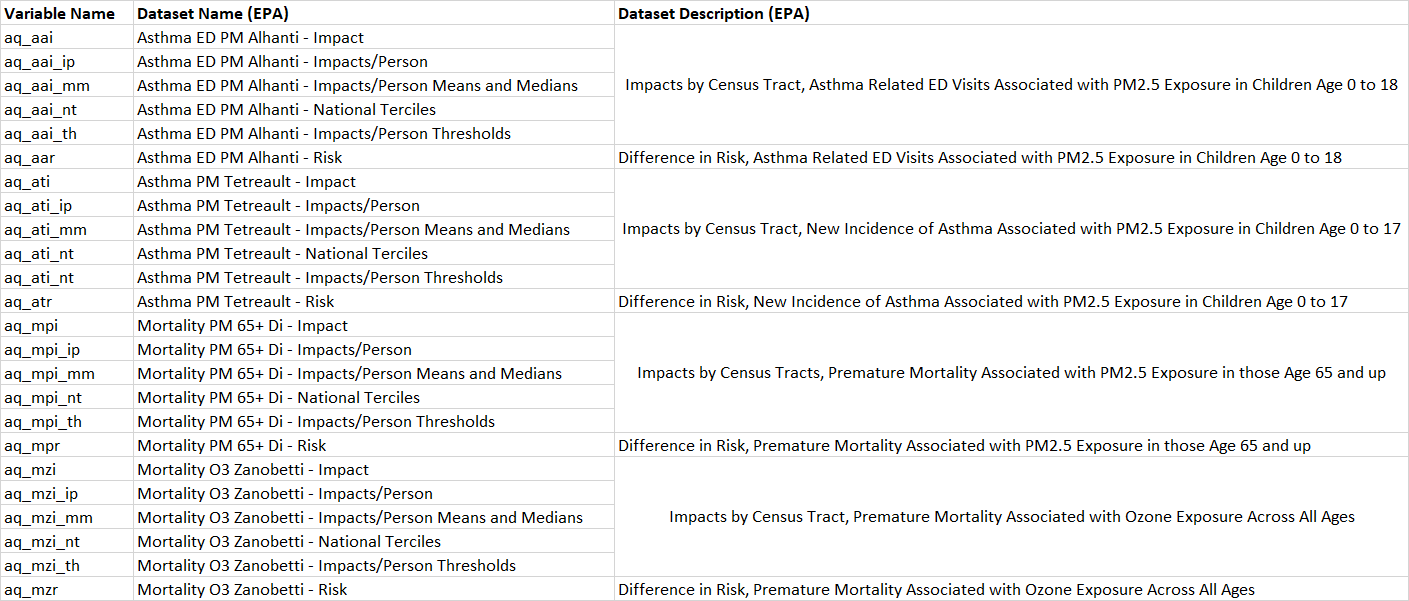

#### 4.1.1 Asthma ED PM Alhanti

In [ ]:
aq_aai_ip = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/aq_aai_ip.csv")
aq_aai_ip

,Tract ID,1 deg,2 deg,3 deg,4 deg,5 deg
0,1001020100,0.0,0.0,0.0,0.0000,0.0001
1,1001020200,0.0,0.0,0.0,0.0001,0.0001
2,1001020300,0.0,0.0,0.0,0.0000,0.0001
3,1001020400,0.0,0.0,0.0,0.0000,0.0001
4,1001020500,0.0,0.0,0.0,0.0001,0.0001
...,...,...,...,...,...,...
73996,72153750501,0.0,0.0,0.0,0.0000,0.0000
73997,72153750502,0.0,0.0,0.0,0.0000,0.0000
73998,72153750503,0.0,0.0,0.0,0.0000,0.0000
73999,72153750601,0.0,0.0,0.0,0.0000,0.0000


In [ ]:
aq_aai_mm = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/aq_aai_mm.csv")
aq_aai_mm['Means and Medians'][1:8] = 'Mean - Lowest Tercile'
aq_aai_mm['Means and Medians'][9:16] = 'Mean - Medium Tercile'
aq_aai_mm['Means and Medians'][17:24] = 'Mean - Highest Tercile'
aq_aai_mm['Means and Medians'][24:32] = 'Median - Lowest Tercile'
aq_aai_mm['Means and Medians'][33:40] = 'Median - Medium Tercile'	
aq_aai_mm['Means and Medians'][40:48] = 'Median - Highest Tercile'
aq_aai_mm.columns = ['Means and Medians', 'Region', '1 deg', '2 deg', '3 deg', '4 deg', '5 deg']
aq_aai_mm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

,Means and Medians,Region,1 deg,2 deg,3 deg,4 deg,5 deg
0,Mean - Lowest Tercile,Northwest,0.00000,0.00000,0.00000,0.00000,0.00001
1,Mean - Lowest Tercile,Southwest,0.00000,0.00000,0.00000,0.00001,0.00001
2,Mean - Lowest Tercile,Southern Plains,0.00000,0.00000,0.00000,0.00000,0.00001
3,Mean - Lowest Tercile,Northern Plains,-0.00001,-0.00001,-0.00001,-0.00001,-0.00001
4,Mean - Lowest Tercile,Midwest,-0.00001,-0.00001,-0.00002,-0.00002,-0.00002
5,Mean - Lowest Tercile,Southeast,0.00000,0.00001,0.00001,0.00001,0.00002
6,Mean - Lowest Tercile,Northeast,0.00000,0.00000,0.00000,0.00000,0.00001
7,Mean - Lowest Tercile,NATIONAL,0.00000,-0.00001,-0.00001,-0.00001,0.00000
8,Mean - Medium Tercile,Northwest,0.00000,0.00000,0.00001,0.00001,0.00001
9,Mean - Medium Tercile,Southwest,0.00000,0.00001,0.00001,0.00002,0.00002


In [ ]:
aq_aai_nt = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/aq_aai_nt.csv")
aq_aai_nt

,1 deg,2 deg,3 deg,4 deg,5 deg
0,3,3,3,3,3
1,3,3,3,3,3
2,3,3,3,3,3
3,3,3,3,3,3
4,3,3,3,3,3
...,...,...,...,...,...
73996,1,1,1,1,1
73997,1,1,1,1,1
73998,1,1,1,1,1
73999,1,1,1,1,1


In [ ]:
aq_aai_th = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/aq_aai_th.csv")
aq_aai_th['Thresholds'][1:8] = 'minimum'
aq_aai_th['Thresholds'][24:32] = 'maximum'
aq_aai_th['Thresholds'][8:16] = 'max - lowest tercile; min - medium tercile'
aq_aai_th['Thresholds'][16:24] = 'max - medium tercile; min - highest tercile'
aq_aai_th.columns = ['Thresholds', 'Region', '1 deg', '2 deg', '3 deg', '4 deg', '5 deg']
aq_aai_th

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

,Thresholds,Region,1 deg,2 deg,3 deg,4 deg,5 deg
0,minimum,Northwest,0.0,0.0000,0.0000,0.0000,0.0000
1,minimum,Southwest,0.0,0.0000,0.0000,0.0000,0.0000
2,minimum,Southern Plains,0.0,0.0000,0.0000,0.0000,0.0000
3,minimum,Northern Plains,0.0,0.0000,0.0000,0.0000,0.0000
4,minimum,Midwest,0.0,0.0000,0.0000,0.0000,0.0000
5,minimum,Southeast,0.0,0.0000,0.0000,0.0000,0.0000
6,minimum,Northeast,0.0,0.0000,0.0000,0.0000,0.0000
7,minimum,NATIONAL,0.0,0.0000,0.0000,0.0000,0.0000
8,max - lowest tercile; min - medium tercile,Northwest,0.0,0.0000,0.0000,0.0000,0.0000
9,max - lowest tercile; min - medium tercile,Southwest,0.0,0.0000,0.0000,0.0000,0.0000


In [ ]:
aq_aar = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/Asthma%20ED%20PM%20Alhanti%20-%20Risk.csv")
aq_aar['Social Vulnerability'][1:8] = 'No High School Diploma'
aq_aar['Social Vulnerability'][8:16] = 'Minority'
aq_aar['Social Vulnerability'][16:24] = 'Lower income'
aq_aar

,Region,Social Vulnerability,1 deg,2 deg,3 deg,4 deg,5 deg
0,Northwest,No High School Diploma,1%,-18%,-17%,-18%,-20%
1,Southwest,No High School Diploma,47%,57%,68%,55%,61%
2,Southern Plains,No High School Diploma,38%,36%,38%,26%,34%
3,Northern Plains,No High School Diploma,-16%,-14%,-16%,-16%,-15%
4,Midwest,No High School Diploma,1%,-1%,2%,1%,4%
5,Southeast,No High School Diploma,10%,7%,6%,6%,13%
6,Northeast,No High School Diploma,53%,47%,53%,54%,48%
7,NATIONAL,No High School Diploma,23%,26%,25%,24%,30%
8,Northwest,Minority,26%,28%,36%,31%,38%
9,Southwest,Minority,82%,87%,112%,83%,89%


#### 4.1.2 Asthma PM Tetreault

In [ ]:
aq_ati_ip = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/aq_ati_ip.csv")
aq_ati_ip = aq_ati_ip.replace(0, np.nan)
aq_ati_ip = aq_ati_ip.dropna(how='any', axis=0)
aq_ati_ip

,Tract ID,1 deg,2 deg,3 deg,4 deg,5 deg
0,1001020100,0.000093,0.000158,0.000234,0.000333,0.000534
1,1001020200,0.000103,0.000175,0.000259,0.000369,0.000592
2,1001020300,0.000058,0.000099,0.000147,0.000209,0.000335
3,1001020400,0.000182,0.000309,0.000457,0.000650,0.001040
4,1001020500,0.000120,0.000203,0.000301,0.000428,0.000687
...,...,...,...,...,...,...
73051,56043000200,0.000013,0.000009,0.000016,0.000028,0.000056
73052,56043000301,0.000023,0.000015,0.000029,0.000051,0.000101
73053,56043000302,0.000012,0.000008,0.000015,0.000026,0.000052
73054,56045951100,0.000003,-0.000023,-0.000021,-0.000012,0.000023


In [ ]:
aq_ati_mm = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/aq_ati_mm.csv")
aq_ati_mm['Means and Medians'][1:8] = 'Mean - Lowest Tercile'
aq_ati_mm['Means and Medians'][8:16] = 'Mean - Medium Tercile'
aq_ati_mm['Means and Medians'][16:24] = 'Mean - Highest Tercile'
aq_ati_mm['Means and Medians'][24:32] = 'Median - Lowest Tercile'
aq_ati_mm['Means and Medians'][32:40] = 'Median - Medium Tercile'
aq_ati_mm['Means and Medians'][40:48] = 'Median - Highest Tercile'
aq_ati_mm.columns = ['Means and Medians', 'Region', '1 deg', '2 deg', '3 deg', '4 deg', '5 deg']
aq_ati_mm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

,Means and Medians,Region,1 deg,2 deg,3 deg,4 deg,5 deg
0,Mean - Lowest Tercile,Northwest,-3.640000e-07,0.000010,0.000026,0.000032,0.000086
1,Mean - Lowest Tercile,Southwest,1.010000e-05,0.000022,0.000038,0.000049,0.000112
2,Mean - Lowest Tercile,Southern Plains,-3.760000e-05,-0.000043,-0.000020,0.000002,0.000043
3,Mean - Lowest Tercile,Northern Plains,-7.530000e-05,-0.000123,-0.000120,-0.000098,-0.000193
4,Mean - Lowest Tercile,Midwest,-9.300000e-05,-0.000131,-0.000151,-0.000160,-0.000170
5,Mean - Lowest Tercile,Southeast,3.480000e-05,0.000037,0.000044,0.000070,0.000114
6,Mean - Lowest Tercile,Northeast,8.180000e-06,-0.000010,0.000015,0.000020,0.000068
7,Mean - Lowest Tercile,NATIONAL,-3.880000e-05,-0.000061,-0.000061,-0.000058,-0.000036
8,Mean - Medium Tercile,Northwest,7.640000e-06,0.000034,0.000063,0.000079,0.000169
9,Mean - Medium Tercile,Southwest,3.620000e-05,0.000072,0.000111,0.000133,0.000223


In [ ]:
aq_ati_nt = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/aq_ati_nt.csv")
aq_ati_nt

,1 deg,2 deg,3 deg,4 deg,5 deg
0,3,3,3,3,3
1,3,3,3,3,3
2,3,3,3,3,3
3,3,3,3,3,3
4,3,3,3,3,3
...,...,...,...,...,...
73996,1,1,1,1,1
73997,1,1,1,1,1
73998,1,1,1,1,1
73999,1,1,1,1,1


In [ ]:
aq_ati_th = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/aq_mpi_th.csv")
aq_ati_th['Thresholds'][1:8] = 'minimum'
aq_ati_th['Thresholds'][9:16] = 'max - lowest tercile; min - medium tercile'
aq_ati_th['Thresholds'][17:24] = 'max - medium tercile; min - highest tercile'
aq_ati_th['Thresholds'][25:32] = 'maximum'
aq_ati_th.columns = ['Thresholds', 'Region', '1 deg', '2 deg', '3 deg', '4 deg', '5 deg']
aq_ati_th

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

,Thresholds,Region,1 deg,2 deg,3 deg,4 deg,5 deg
0,minimum,Northwest,0.0000,-0.0001,-0.0001,0.0000,0.0000
1,minimum,Southwest,0.0000,-0.0001,-0.0001,-0.0001,0.0000
2,minimum,Southern Plains,-0.0002,-0.0003,-0.0002,-0.0001,-0.0002
3,minimum,Northern Plains,-0.0002,-0.0004,-0.0003,-0.0002,-0.0005
4,minimum,Midwest,-0.0003,-0.0005,-0.0006,-0.0007,-0.0007
5,minimum,Southeast,0.0000,0.0000,-0.0001,-0.0001,0.0000
6,minimum,Northeast,-0.0001,-0.0003,-0.0003,-0.0003,-0.0004
7,minimum,NATIONAL,-0.0003,-0.0005,-0.0006,-0.0007,-0.0007
8,max - lowest tercile; min - medium tercile,Northwest,0.0000,0.0000,0.0000,0.0001,0.0001
9,max - lowest tercile; min - medium tercile,Southwest,0.0000,0.0001,0.0001,0.0001,0.0002


In [ ]:
aq_atr = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/Asthma%20PM%20Tetreault%20-%20Risk.csv")
aq_atr['Social Vulnerability'][1:8] = 'No High School Diploma'
aq_atr['Social Vulnerability'][8:16] = 'Minority'
aq_atr['Social Vulnerability'][16:24] = 'Lower income'
aq_atr

,Region,Social Vulnerability,1 deg,2 deg,3 deg,4 deg,5 deg
0,Northwest,No High School Diploma,-11%,-23%,-23%,-23%,-24%
1,Southwest,No High School Diploma,9%,8%,7%,4%,6%
2,Southern Plains,No High School Diploma,31%,32%,30%,12%,12%
3,Northern Plains,No High School Diploma,-16%,-16%,-16%,-16%,-16%
4,Midwest,No High School Diploma,0%,-2%,-2%,-2%,1%
5,Southeast,No High School Diploma,5%,5%,4%,4%,8%
6,Northeast,No High School Diploma,28%,1%,15%,18%,18%
7,NATIONAL,No High School Diploma,16%,16%,15%,13%,15%
8,Northwest,Minority,14%,22%,29%,25%,30%
9,Southwest,Minority,22%,14%,16%,10%,12%


#### 4.1.3 Mortality PM 65+ Di

In [ ]:
#aq_mpi tables 
aq_mpi_ip = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/aq_mpi_ip.csv")
aq_mpi_ip

,Tract ID,1 deg,2 deg,3 deg,4 deg,5 deg
0,1001020100,0.00020,0.00034,0.00050,0.00070,0.00111
1,1001020200,0.00033,0.00055,0.00081,0.00115,0.00183
2,1001020300,0.00024,0.00041,0.00060,0.00085,0.00134
3,1001020400,0.00016,0.00026,0.00039,0.00054,0.00086
4,1001020500,0.00017,0.00029,0.00042,0.00059,0.00093
...,...,...,...,...,...,...
73996,72153750501,0.00000,0.00000,0.00000,0.00000,0.00000
73997,72153750502,0.00000,0.00000,0.00000,0.00000,0.00000
73998,72153750503,0.00000,0.00000,0.00000,0.00000,0.00000
73999,72153750601,0.00000,0.00000,0.00000,0.00000,0.00000


In [ ]:
aq_mpi_mm = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/aq_mpi_mm.csv")
aq_mpi_mm['Means and Medians'][1:8] = 'Mean - Lowest Tercile'
aq_mpi_mm['Means and Medians'][8:16] = 'Mean - Medium Tercile'
aq_mpi_mm['Means and Medians'][16:24] = 'Mean - Highest Tercile'
aq_mpi_mm['Means and Medians'][24:32] = 'Median - Lowest Tercile'
aq_mpi_mm['Means and Medians'][32:40] = 'Median - Medium Tercile'
aq_mpi_mm['Means and Medians'][40:48] = 'Median - Highest Tercile'
aq_mpi_mm.columns = ['Means and Medians', 'Region', '1 deg', '2 deg', '3 deg', '4 deg', '5 deg']
aq_mpi_mm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

,Means and Medians,Region,1 deg,2 deg,3 deg,4 deg,5 deg
0,Mean - Lowest Tercile,Northwest,0.00000,0.00001,0.00003,0.00003,0.00008
1,Mean - Lowest Tercile,Southwest,0.00001,0.00003,0.00004,0.00005,0.00012
2,Mean - Lowest Tercile,Southern Plains,-0.00005,-0.00006,-0.00003,0.00000,0.00005
3,Mean - Lowest Tercile,Northern Plains,-0.00008,-0.00012,-0.00012,-0.00010,-0.00019
4,Mean - Lowest Tercile,Midwest,-0.00011,-0.00017,-0.00019,-0.00021,-0.00018
5,Mean - Lowest Tercile,Southeast,0.00005,0.00005,0.00006,0.00009,0.00014
6,Mean - Lowest Tercile,Northeast,0.00001,-0.00001,0.00002,0.00003,0.00009
7,Mean - Lowest Tercile,NATIONAL,-0.00005,-0.00008,-0.00008,-0.00007,-0.00004
8,Mean - Medium Tercile,Northwest,0.00001,0.00003,0.00006,0.00007,0.00015
9,Mean - Medium Tercile,Southwest,0.00004,0.00008,0.00012,0.00014,0.00023


In [ ]:
aq_mpi_nt = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/aq_mpi_nt.csv")
aq_mpi_nt

,1 deg,2 deg,3 deg,4 deg,5 deg
0,3,3,3,3,3
1,3,3,3,3,3
2,3,3,3,3,3
3,3,3,3,3,3
4,3,3,3,3,3
...,...,...,...,...,...
73996,1,1,1,1,1
73997,1,1,1,1,1
73998,1,1,1,1,1
73999,1,1,1,1,1


In [ ]:
aq_mpi_th = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/aq_mpi_th.csv")
aq_mpi_th['Thresholds'][1:8] = 'minimum'
aq_mpi_th['Thresholds'][9:16] = 'max - lowest tercile; min - medium tercile'
aq_mpi_th['Thresholds'][17:24] = 'max - medium tercile; min - highest tercile'
aq_mpi_th['Thresholds'][25:32] = 'maximum'
aq_mpi_th.columns = ['Thresholds', 'Region', '1 deg', '2 deg', '3 deg', '4 deg', '5 deg']
aq_mpi_th

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

,Thresholds,Region,1 deg,2 deg,3 deg,4 deg,5 deg
0,minimum,Northwest,0.0000,-0.0001,-0.0001,0.0000,0.0000
1,minimum,Southwest,0.0000,-0.0001,-0.0001,-0.0001,0.0000
2,minimum,Southern Plains,-0.0002,-0.0003,-0.0002,-0.0001,-0.0002
3,minimum,Northern Plains,-0.0002,-0.0004,-0.0003,-0.0002,-0.0005
4,minimum,Midwest,-0.0003,-0.0005,-0.0006,-0.0007,-0.0007
5,minimum,Southeast,0.0000,0.0000,-0.0001,-0.0001,0.0000
6,minimum,Northeast,-0.0001,-0.0003,-0.0003,-0.0003,-0.0004
7,minimum,NATIONAL,-0.0003,-0.0005,-0.0006,-0.0007,-0.0007
8,max - lowest tercile; min - medium tercile,Northwest,0.0000,0.0000,0.0000,0.0001,0.0001
9,max - lowest tercile; min - medium tercile,Southwest,0.0000,0.0001,0.0001,0.0001,0.0002


In [ ]:
aq_mpr = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/Mortality%20O3%20Zanobetti%20-%20Risk%20.csv")
aq_mpr['Social Vulnerability'][1:8] = 'No High School Diploma'
aq_mpr['Social Vulnerability'][8:16] = 'Minority'
aq_mpr['Social Vulnerability'][16:24] = 'Lower income'
aq_mpr

,Region,Social Vulnerability,1 deg,2 deg,3 deg,4 deg,5 deg
0,Northwest,No High School Diploma,-8%,-26%,-27%,-27%,-27%
1,Southwest,No High School Diploma,-14%,-13%,-6%,-17%,-13%
2,Southern Plains,No High School Diploma,-32%,-36%,-33%,-36%,-35%
3,Northern Plains,No High School Diploma,18%,20%,18%,7%,8%
4,Midwest,No High School Diploma,13%,13%,20%,16%,13%
5,Southeast,No High School Diploma,1%,-5%,-6%,-5%,-6%
6,Northeast,No High School Diploma,-9%,-11%,-10%,-11%,-13%
7,NATIONAL,No High School Diploma,-21%,-18%,-17%,-18%,-17%
8,Northwest,Minority,41%,43%,43%,43%,43%
9,Southwest,Minority,-24%,-24%,-13%,-28%,-23%


#### 4.1.4 Mortality O3 Zanobetti

In [ ]:
#aq_mzi tables 
aq_mzi_ip = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/aq_mzi_ip.csv")
aq_mzi_ip

,Tract ID,1 deg,2 deg,3 deg,4 deg,5 deg
0,1001020100,0.000001,0.000001,0.000002,0.000003,0.000005
1,1001020200,0.000001,0.000001,0.000002,0.000003,0.000005
2,1001020300,0.000001,0.000001,0.000002,0.000003,0.000005
3,1001020400,0.000001,0.000001,0.000002,0.000003,0.000005
4,1001020500,0.000001,0.000001,0.000002,0.000003,0.000005
...,...,...,...,...,...,...
73996,72153750501,0.000000,0.000000,0.000000,0.000000,0.000000
73997,72153750502,0.000000,0.000000,0.000000,0.000000,0.000000
73998,72153750503,0.000000,0.000000,0.000000,0.000000,0.000000
73999,72153750601,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
aq_mzi_mm = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/aq_mzi_mm.csv")
aq_mzi_mm['Means and Medians'][1:8] = 'Mean - Lowest Tercile'
aq_mzi_mm['Means and Medians'][8:16] = 'Mean - Medium Tercile'
aq_mzi_mm['Means and Medians'][16:24] = 'Mean - Highest Tercile'
aq_mzi_mm['Means and Medians'][24:32] = 'Median - Lowest Tercile'
aq_mzi_mm['Means and Medians'][32:40] = 'Median - Medium Tercile'
aq_mzi_mm['Means and Medians'][40:48] = 'Median - Highest Tercile'
aq_mzi_mm.columns = ['Means and Medians', 'Region', '1 deg', '2 deg', '3 deg', '4 deg', '5 deg']
aq_mzi_mm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

,Means and Medians,Region,1 deg,2 deg,3 deg,4 deg,5 deg
0,Mean - Lowest Tercile,Northwest,0.00000,0.00000,0.00000,0.00000,0.00000
1,Mean - Lowest Tercile,Southwest,0.00000,0.00000,0.00000,0.00000,0.00000
2,Mean - Lowest Tercile,Southern Plains,0.00000,0.00000,0.00000,0.00000,0.00000
3,Mean - Lowest Tercile,Northern Plains,0.00000,0.00000,0.00000,0.00000,0.00000
4,Mean - Lowest Tercile,Midwest,0.00000,0.00000,0.00000,0.00001,0.00001
5,Mean - Lowest Tercile,Southeast,0.00000,0.00000,0.00000,0.00000,0.00000
6,Mean - Lowest Tercile,Northeast,0.00000,0.00000,0.00000,0.00000,0.00000
7,Mean - Lowest Tercile,NATIONAL,0.00000,0.00000,0.00000,0.00000,0.00000
8,Mean - Medium Tercile,Northwest,0.00000,0.00000,0.00000,0.00000,0.00000
9,Mean - Medium Tercile,Southwest,0.00000,0.00000,0.00000,0.00000,0.00000


In [ ]:
aq_mzi_nt = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/aq_mzi_nt.csv")
aq_mzi_nt

,1 deg,2 deg,3 deg,4 deg,5 deg
0,2,2,2,2,2
1,2,2,2,2,2
2,2,2,2,2,2
3,2,2,2,2,2
4,2,2,2,2,2
...,...,...,...,...,...
73996,1,1,1,1,1
73997,1,1,1,1,1
73998,1,1,1,1,1
73999,1,1,1,1,1


In [ ]:
aq_mzi_th = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/aq_mzi_th.csv")
aq_mzi_th['Thresholds'][1:8] = 'minimum'
aq_mzi_th['Thresholds'][9:16] = 'max - lowest tercile; min - medium tercile'
aq_mzi_th['Thresholds'][17:24] = 'max - medium tercile; min - highest tercile'
aq_mzi_th['Thresholds'][25:32] = 'maximum'
aq_mzi_th.columns = ['Thresholds', 'Region', '1 deg', '2 deg', '3 deg', '4 deg', '5 deg']
aq_mzi_th

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

,Thresholds,Region,1 deg,2 deg,3 deg,4 deg,5 deg
0,minimum,Northwest,0.0,0.0,0.0,0.0,0.0000
1,minimum,Southwest,0.0,0.0,0.0,0.0,0.0000
2,minimum,Southern Plains,0.0,0.0,0.0,0.0,0.0000
3,minimum,Northern Plains,0.0,0.0,0.0,0.0,0.0000
4,minimum,Midwest,0.0,0.0,0.0,0.0,0.0000
5,minimum,Southeast,0.0,0.0,0.0,0.0,0.0000
6,minimum,Northeast,0.0,0.0,0.0,0.0,0.0000
7,minimum,NATIONAL,0.0,0.0,0.0,0.0,0.0000
8,max - lowest tercile; min - medium tercile,Northwest,0.0,0.0,0.0,0.0,0.0000
9,max - lowest tercile; min - medium tercile,Southwest,0.0,0.0,0.0,0.0,0.0000


In [ ]:
aq_mzr = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/Mortality%20PM%2065%2B%20Di%20-%20Risk.csv")
aq_mzr['Social Vulnerability'][1:8] = 'No High School Diploma'
aq_mzr['Social Vulnerability'][8:16] = 'Minority'
aq_mzr['Social Vulnerability'][16:24] = 'Lower income'
aq_mzr

,Region,Social Vulnerability,1 deg,2 deg,3 deg,4 deg,5 deg
0,Northwest,No High School Diploma,-14%,-24%,-24%,-25%,-25%
1,Southwest,No High School Diploma,-14%,-6%,-3%,-7%,-5%
2,Southern Plains,No High School Diploma,14%,15%,7%,1%,5%
3,Northern Plains,No High School Diploma,-17%,-16%,-17%,-16%,-17%
4,Midwest,No High School Diploma,-5%,-4%,-5%,-7%,-4%
5,Southeast,No High School Diploma,17%,11%,11%,14%,19%
6,Northeast,No High School Diploma,23%,1%,14%,18%,12%
7,NATIONAL,No High School Diploma,6%,6%,9%,8%,10%
8,Northwest,Minority,-8%,5%,13%,7%,14%
9,Southwest,Minority,-16%,-12%,-8%,-15%,-15%


### 4.2: Temperature Mortality Datasets




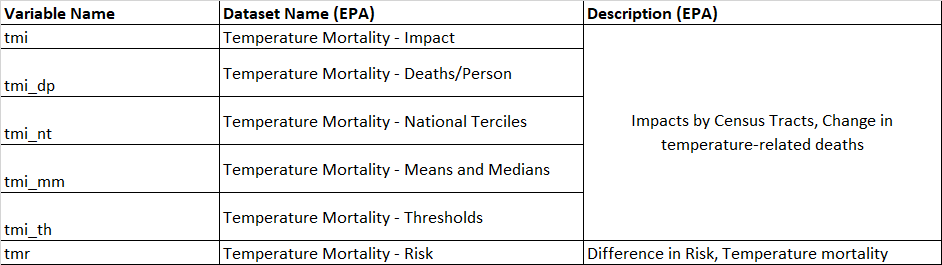

In [ ]:
tmi_dp = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/tmi_dp.csv")
tmi_dp = tmi_dp.dropna(how='all', axis = 0)
tmi_dp

,Tract ID,1 deg,2 deg,3 deg,4 deg,5 deg
0,1.009050e+09,0.000006,0.000018,0.000036,0.000054,0.000092
1,1.009050e+09,0.000006,0.000018,0.000036,0.000054,0.000092
2,1.009050e+09,0.000006,0.000018,0.000036,0.000054,0.000092
3,1.009050e+09,0.000006,0.000018,0.000036,0.000054,0.000092
4,1.009050e+09,0.000006,0.000018,0.000036,0.000054,0.000092
...,...,...,...,...,...,...
23017,5.513320e+10,0.000006,0.000017,0.000032,0.000048,0.000077
23018,5.513320e+10,0.000006,0.000017,0.000032,0.000048,0.000077
23019,5.513320e+10,0.000006,0.000017,0.000032,0.000048,0.000077
23020,5.513320e+10,0.000006,0.000017,0.000032,0.000048,0.000077


In [ ]:
tmi_nt = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/tmi_nt.csv")
tmi_nt

,1 deg,2 deg,3 deg,4 deg,5 deg
0,2,2,2,2,2
1,2,2,2,2,2
2,2,2,2,2,2
3,2,2,2,2,2
4,2,2,2,2,2
...,...,...,...,...,...
23017,1,2,2,2,2
23018,1,2,2,2,2
23019,1,2,2,2,2
23020,1,2,2,2,2


In [ ]:
tmi_mm = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/tmi_mm.csv")
tmi_mm.columns = ['Means and Medians', 'Region', '1 deg', '2 deg', '3 deg', '4 deg', '5 deg']
tmi_mm

,Means and Medians,Region,1 deg,2 deg,3 deg,4 deg,5 deg
0,Mean - Lowest Tercile,NATIONAL,0.000003,0.000009,0.000017,0.000024,0.000044
1,Mean - Medium Tercile,NATIONAL,0.000008,0.000022,0.000042,0.000060,0.000093
2,Mean - Highest Tercile,NATIONAL,0.000015,0.000038,0.000064,0.000088,0.000132
3,Median - Loest Tercile,NATIONAL,0.000003,0.000011,0.000023,0.000034,0.000060
4,Median - Medium Tercile,NATIONAL,0.000007,0.000022,0.000043,0.000061,0.000093
5,Median - Highest Tercile,NATIONAL,0.000015,0.000037,0.000061,0.000085,0.000135


In [ ]:
tmi_th = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/tmi_th.csv")
tmi_th.columns = ['Thresholds', 'Region', '1 deg', '2 deg', '3 deg', '4 deg', '5 deg']
tmi_th

,Thresholds,Region,1 deg,2 deg,3 deg,4 deg,5 deg
0,minimum,NATIONAL,0.000000,0.000000,-0.000001,-0.000001,-0.000001
1,max - lowest tercile; min - medium tercile,NATIONAL,0.000006,0.000016,0.000032,0.000045,0.000071
2,max - medium tercile; min - highest tercile,NATIONAL,0.000010,0.000027,0.000049,0.000072,0.000109
3,maximum,NATIONAL,0.000023,0.000058,0.000092,0.000121,0.000177


In [ ]:
tmr = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/tmr.csv")
tmr

,Region,Social Vulnerability,1 deg,2 deg,3 deg,4 deg,5 deg
0,NATIONAL,65 and Older,-1%,1%,1%,1%,11%
1,NATIONAL,No High School Diploma,-11%,-3%,0%,0%,-8%
2,NATIONAL,Minority,-12%,8%,14%,14%,-5%
3,NATIONAL,Low Income,5%,11%,16%,16%,15%


### 4.3: Weather and National Diasters Datasets




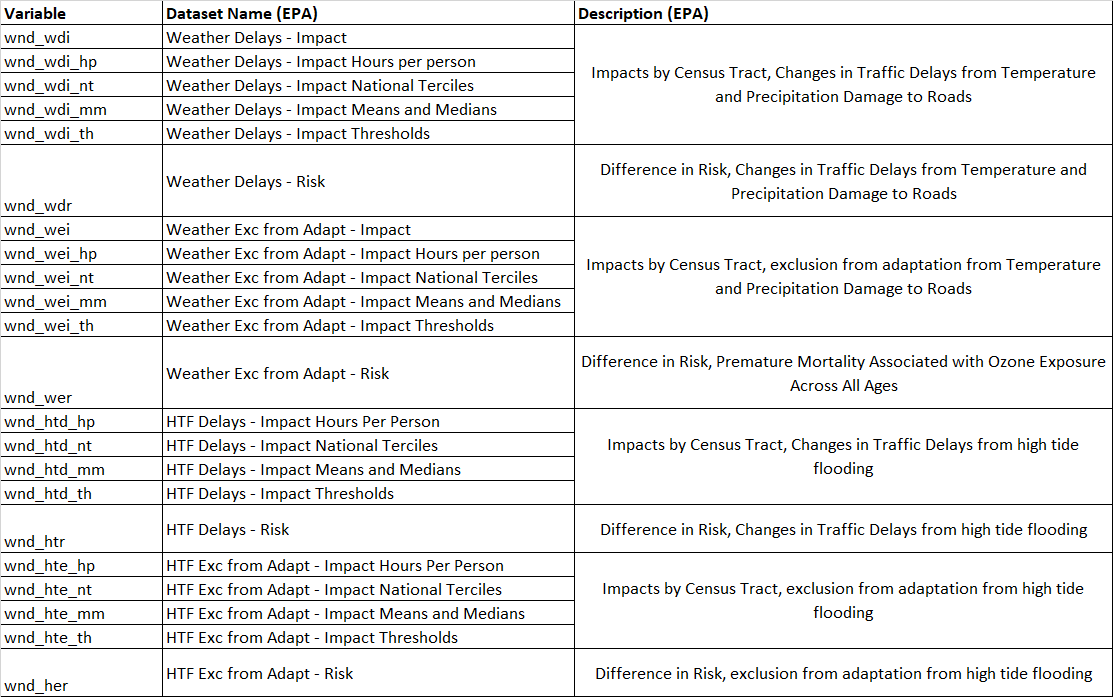

#### 4.3.1 Weather Delays

In [ ]:
wnd_wdi_hp = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/wnd_wdi_hp.csv")
wnd_wdi_hp = wnd_wdi_hp.dropna(how='all', axis = 0)
wnd_wdi_hp

,Tract ID,1 deg,2 deg,3 deg,4 deg,5 deg
0,1.001020e+09,2.70,14.57,19.77,38.77,68.21
1,1.001020e+09,0.96,5.21,7.06,13.92,24.39
2,1.001020e+09,0.90,4.89,6.63,13.06,22.89
3,1.001020e+09,0.98,5.29,7.17,14.14,24.78
4,1.001020e+09,0.68,3.67,4.98,9.82,17.21
...,...,...,...,...,...,...
71873,5.604300e+10,0.00,12.00,31.00,39.00,50.00
71874,5.604300e+10,0.00,0.00,0.00,0.00,0.00
71875,5.604300e+10,0.00,0.00,0.00,1.00,1.00
71876,5.604595e+10,13.00,57.00,123.00,129.00,144.00


In [ ]:
wnd_wdi_nt = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/wnd_wdi_nt.csv")
wnd_wdi_nt 

,1 deg,2 deg,3 deg,4 deg,5 deg
0,3,3,3,3,3
1,3,3,3,3,3
2,3,3,3,3,3
3,3,3,3,3,3
4,3,3,3,3,3
...,...,...,...,...,...
71873,2,3,3,3,3
71874,2,2,1,1,1
71875,1,2,2,2,2
71876,3,3,3,3,3


In [ ]:
wnd_wdi_mm = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/wnd_wdi_mm.csv")
wnd_wdi_mm['Means and Medians'][1:8] = 'Mean - Lowest Tercile'
wnd_wdi_mm['Means and Medians'][8:16] = 'Mean - Medium Tercile'
wnd_wdi_mm['Means and Medians'][16:24] = 'Mean - Highest Tercile'
wnd_wdi_mm['Means and Medians'][24:32] = 'Median - Lowest Tercile'
wnd_wdi_mm['Means and Medians'][32:40] = 'Median - Medium Tercile'
wnd_wdi_mm['Means and Medians'][40:48] = 'Median - Highest Tercile'
wnd_wdi_mm.columns = ['Means and Medians', 'Region', '1 deg', '2 deg', '3 deg', '4 deg', '5 deg']

wnd_wdi_mm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

,Means and Medians,Region,1 deg,2 deg,3 deg,4 deg,5 deg
0,Mean - Lowest Tercile,Northwest,-0.4,-0.1,0.0,0.0,0.0
1,Mean - Lowest Tercile,Southwest,-5.1,-2.1,-0.1,0.0,0.1
2,Mean - Lowest Tercile,Southern Plains,-0.9,-0.5,-0.1,0.0,0.0
3,Mean - Lowest Tercile,Northern Plains,-5.4,-3.7,-0.2,0.0,0.0
4,Mean - Lowest Tercile,Midwest,-0.9,-0.1,0.3,0.4,0.6
5,Mean - Lowest Tercile,Southeast,-0.6,-0.4,-0.3,-0.1,0.0
6,Mean - Lowest Tercile,Northeast,-0.1,-0.1,0.0,0.1,0.2
7,Mean - Lowest Tercile,NATIONAL,-1.5,-0.7,-0.2,0.0,0.1
8,Mean - Medium Tercile,Northwest,0.0,0.1,0.3,0.4,0.5
9,Mean - Medium Tercile,Southwest,-0.1,0.0,0.8,1.2,2.4


In [ ]:
wnd_wdi_th = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/wnd_wdi_th.csv")
wnd_wdi_th['Thresholds'][1:8] = 'minimum'
wnd_wdi_th['Thresholds'][9:16] = 'max - lowest tercile; min - medium tercile'
wnd_wdi_th['Thresholds'][17:24] = 'max - medium tercile; min - highest tercile'
wnd_wdi_th['Thresholds'][25:32] = 'maximum'
wnd_wdi_th.columns = ['Thresholds', 'Region', '1 deg', '2 deg', '3 deg', '4 deg', '5 deg']
wnd_wdi_th

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

,Thresholds,Region,1 deg,2 deg,3 deg,4 deg,5 deg
0,minimum,Northwest,-47.3,-43.8,-0.2,-0.6,-0.4
1,minimum,Southwest,-9435.5,-4991.5,-1467.1,-2180.7,-49.5
2,minimum,Southern Plains,-368.7,-128.9,-64.5,-30.4,-20.2
3,minimum,Northern Plains,-132.3,-117.5,-44.1,-10.8,-6.4
4,minimum,Midwest,-104.1,-46.3,-21.5,-0.8,-0.4
5,minimum,Southeast,-296.5,-224.8,-1782.7,-1036.5,-221.1
6,minimum,Northeast,-51.5,-52.2,-34.7,-0.6,-0.1
7,minimum,NATIONAL,-9435.5,-4991.5,-1782.7,-2180.7,-221.1
8,max - lowest tercile; min - medium tercile,Northwest,0.0,0.0,0.0,0.0,0.0
9,max - lowest tercile; min - medium tercile,Southwest,-0.3,-0.1,0.1,0.3,0.7


In [ ]:
wnd_wdr = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/wnd_wdr.csv")
wnd_wdr['Social Vulnerability'][1:8] = '65 and Older'
wnd_wdr['Social Vulnerability'][8:16] = 'No High School Diploma'
wnd_wdr['Social Vulnerability'][16:24] = 'Minority'
wnd_wdr['Social Vulnerability'][24:32] = 'Low Income'
wnd_wdr 

,Region,Social Vulnerability,1 deg,2 deg,3 deg,4 deg,5 deg
0,Northwest,65 and Older,13%,20%,22%,23%,24%
1,Southwest,65 and Older,2%,10%,15%,16%,17%
2,Southern Plains,65 and Older,21%,24%,25%,27%,27%
3,Northern Plains,65 and Older,13%,20%,31%,32%,32%
4,Midwest,65 and Older,12%,15%,15%,14%,14%
5,Southeast,65 and Older,4%,5%,6%,6%,7%
6,Northeast,65 and Older,14%,16%,16%,16%,16%
7,NATIONAL,65 and Older,11%,15%,14%,16%,16%
8,Northwest,No High School Diploma,13%,13%,11%,12%,13%
9,Southwest,No High School Diploma,-17%,-11%,-11%,-17%,-20%


#### 4.3.2 Weather Exc from Adapt

In [ ]:
#Ratio of delays with adaptation over delays without adaptation
wnd_wei_hp = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/wnd_wei_hp.csv", header = 1)
wnd_wei_hp

,Tract ID,1 deg,2 deg,3 deg,4 deg,5 deg
0,1001020100,0.0,0.0219,0.0188,0.0166,0.0040
1,1001020200,0.0,0.0191,0.0178,0.0160,0.0037
2,1001020300,0.0,0.0191,0.0178,0.0160,0.0037
3,1001020400,0.0,0.0191,0.0178,0.0160,0.0037
4,1001020500,0.0,0.0191,0.0178,0.0160,0.0037
...,...,...,...,...,...,...
71873,56043000200,0.0,0.3516,0.1345,0.1624,0.1100
71874,56043000301,0.0,0.2796,0.1097,0.1254,0.1058
71875,56043000302,0.0,0.2818,0.1108,0.1270,0.1067
71876,56045951100,0.0,0.1995,0.0850,0.1171,0.0849


In [ ]:
wnd_wei_nt = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/wnd_wei_nt.csv", header = 1)
wnd_wei_nt 

,1 deg,2 deg,3 deg,4 deg,5 deg
0,1,2,2,2,1
1,1,2,1,2,1
2,1,2,1,2,1
3,1,2,1,2,1
4,1,2,1,2,1
...,...,...,...,...,...
71873,1,3,3,3,3
71874,1,3,3,3,3
71875,1,3,3,3,3
71876,1,3,3,3,3


In [ ]:
wnd_wei_mm = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/wnd_wei_mm.csv", header = 1)
wnd_wei_mm['Means and Medians'][1:8] = 'Mean - Lowest Tercile'
wnd_wei_mm['Means and Medians'][8:16] = 'Mean - Medium Tercile'
wnd_wei_mm['Means and Medians'][16:24] = 'Mean - Highest Tercile'
wnd_wei_mm['Means and Medians'][24:32] = 'Median - Lowest Tercile'
wnd_wei_mm['Means and Medians'][32:40] = 'Median - Medium Tercile'
wnd_wei_mm['Means and Medians'][40:48] = 'Median - Highest Tercile'
wnd_wei_mm.columns = ['Means and Medians', 'Region', '1 deg', '2 deg', '3 deg', '4 deg', '5 deg']
wnd_wei_mm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

,Means and Medians,Region,1 deg,2 deg,3 deg,4 deg,5 deg
0,Mean - Lowest Tercile,Northwest,NaN,NaN,0.0291,0.0218,0.0047
1,Mean - Lowest Tercile,Southwest,NaN,NaN,0.0174,0.0082,0.0042
2,Mean - Lowest Tercile,Southern Plains,NaN,0.0404,0.0263,0.0241,0.0151
3,Mean - Lowest Tercile,Northern Plains,NaN,NaN,0.0463,0.0431,0.0293
4,Mean - Lowest Tercile,Midwest,NaN,0.0133,0.0124,0.0116,0.0041
5,Mean - Lowest Tercile,Southeast,NaN,NaN,NaN,NaN,NaN
6,Mean - Lowest Tercile,Northeast,NaN,NaN,0.0118,0.0070,0.0051
7,Mean - Lowest Tercile,NATIONAL,NaN,NaN,0.0103,0.0081,0.0041
8,Mean - Medium Tercile,Northwest,NaN,0.0118,0.0847,0.0517,0.0293
9,Mean - Medium Tercile,Southwest,NaN,0.0209,0.0579,0.0417,0.0203


In [ ]:
#Ratio of delays with adaptation over delays without adaptation 
wnd_wei_th = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/wnd_wei_th.csv", header = 1)
wnd_wei_th['Thresholds'][1:8] = 'minimum'
wnd_wei_th['Thresholds'][9:16] = 'max - lowest tercile; min - medium tercile'
wnd_wei_th['Thresholds'][17:24] = 'max - medium tercile; min - highest tercile'
wnd_wei_th['Thresholds'][25:32] = 'maximum'
wnd_wei_th.columns = ['Thresholds', 'Region', '1 deg', '2 deg', '3 deg', '4 deg', '5 deg']
wnd_wei_th

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

,Thresholds,Region,1 deg,2 deg,3 deg,4 deg,5 deg
0,minimum,Northwest,0.0000,0.0000,0.0000,0.0000,0.0000
1,minimum,Southwest,0.0000,0.0000,0.0000,0.0000,0.0000
2,minimum,Southern Plains,0.0000,0.0000,0.0000,0.0000,0.0000
3,minimum,Northern Plains,0.0000,0.0000,0.0000,0.0000,0.0000
4,minimum,Midwest,0.0000,0.0000,0.0000,0.0000,0.0000
5,minimum,Southeast,0.0000,0.0000,0.0000,0.0000,0.0000
6,minimum,Northeast,0.0000,0.0000,0.0000,0.0000,0.0000
7,minimum,NATIONAL,0.0000,0.0000,0.0000,0.0000,0.0000
8,max - lowest tercile; min - medium tercile,Northwest,0.0000,0.0000,0.0438,0.0313,0.0074
9,max - lowest tercile; min - medium tercile,Southwest,0.0000,0.0000,0.0250,0.0154,0.0067


In [ ]:
wnd_wer = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/wnd_wer.csv")
wnd_wer['Social Vulnerability'][1:8] = '65 and Older'
wnd_wer['Social Vulnerability'][8:16] = 'No High School Diploma'
wnd_wer['Social Vulnerability'][16:24] = 'Minority'
wnd_wer['Social Vulnerability'][24:32] = 'Low Income'
wnd_wer

,Region,Social Vulnerability,1 deg,2 deg,3 deg,4 deg,5 deg
0,Northwest,65 and Older,4%,13%,2%,3%,5%
1,Southwest,65 and Older,11%,2%,-3%,-4%,-6%
2,Southern Plains,65 and Older,2%,-8%,-3%,-3%,-2%
3,Northern Plains,65 and Older,11%,2%,10%,6%,4%
4,Midwest,65 and Older,2%,2%,0%,3%,2%
5,Southeast,65 and Older,-2%,-5%,-5%,1%,-2%
6,Northeast,65 and Older,2%,3%,1%,3%,2%
7,NATIONAL,65 and Older,3%,-2%,-4%,-3%,-4%
8,Northwest,No High School Diploma,17%,14%,4%,8%,6%
9,Southwest,No High School Diploma,-21%,-13%,6%,6%,6%


#### 4.3.3 HTF Delays

In [ ]:
wnd_htd_hp = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/wnd_htd_hp.csv", header = 1)
wnd_htd_hp = wnd_htd_hp.dropna(how='all', axis = 0)
wnd_htd_hp

,Tract ID,25 cm,50 cm,75 cm,100 cm,125 cm,150 cm
0,1.003010e+09,1.0,5.0,12.0,14.0,14.0,14.0
1,1.003010e+09,1.0,11.0,27.0,31.0,31.0,31.0
2,1.003011e+09,1.0,11.0,27.0,32.0,32.0,32.0
3,1.003011e+09,1.0,5.0,11.0,13.0,13.0,13.0
4,1.003011e+09,2.0,14.0,34.0,40.0,40.0,40.0
...,...,...,...,...,...,...,...
7416,5.307301e+10,0.0,2.0,8.0,18.0,33.0,41.0
7417,5.307301e+10,0.0,2.0,7.0,15.0,27.0,35.0
7418,5.307301e+10,2.0,13.0,46.0,97.0,179.0,227.0
7419,5.307301e+10,1.0,6.0,21.0,44.0,83.0,105.0


In [ ]:
wnd_htd_nt = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/wnd_htd_nt.csv", header = 1)
wnd_htd_nt 

,25 cm,50 cm,75 cm,100 cm,125 cm,150 cm
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,1,1,1,1,1,1
3,1,1,1,1,1,1
4,1,1,1,1,1,1
...,...,...,...,...,...,...
7416,1,1,1,1,1,1
7417,1,1,1,1,1,1
7418,1,1,2,2,2,2
7419,1,1,1,1,2,2


In [ ]:
wnd_htd_mm = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/wnd_htd_mm.csv", header = 1)
wnd_htd_mm['Means and Medians'][1:7] = 'Mean - Lowest Tercile'
wnd_htd_mm['Means and Medians'][8:14] = 'Mean - Medium Tercile'
wnd_htd_mm['Means and Medians'][15:21] = 'Mean - Highest Tercile'
wnd_htd_mm['Means and Medians'][22:28] = 'Median - Lowest Tercile'
wnd_htd_mm['Means and Medians'][29:35] = 'Median - Medium Tercile'
wnd_htd_mm['Means and Medians'][36:41] = 'Median - Highest Tercile'
wnd_htd_mm.columns = ['Means and Medians', 'Region', '25 cm', '50 cm', '75 cm', '100 cm', '125 cm', '150 cm']
wnd_htd_mm

,Means and Medians,Region,25 cm,50 cm,75 cm,100 cm,125 cm,150 cm
0,Mean - Lowest Tercile,Southwest,1,5,17,33,57,69
1,Mean - Lowest Tercile,Northwest,0,1,2,4,7,9
2,Mean - Lowest Tercile,Southern Great Plains,17,71,90,92,92,93
3,Mean - Lowest Tercile,Southeast - Gulf,1,5,7,7,6,6
4,Mean - Lowest Tercile,Southeast - Atlantic,1,9,22,33,41,44
5,Mean - Lowest Tercile,Northeast,2,9,19,25,29,30
6,Mean - Lowest Tercile,NATIONAL,1,6,14,19,24,26
7,Mean - Medium Tercile,Southwest,9,72,247,494,843,"1,037"
8,Mean - Medium Tercile,Northwest,0,2,7,14,25,31
9,Mean - Medium Tercile,Southern Great Plains,73,251,315,325,326,326


In [ ]:
wnd_htd_th = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/wnd_htd_th.csv", header = 1)
wnd_htd_th['Thresholds'][1:7] = 'minimum'
wnd_htd_th['Thresholds'][7:14] = 'max - lowest tercile; min - medium tercile'
wnd_htd_th['Thresholds'][14:21] = 'max - medium tercile; min - highest tercile'
wnd_htd_th['Thresholds'][21:28] = 'maximum'
wnd_htd_th.columns = ['Thresholds', 'Region', '25 cm', '50 cm', '75 cm', '100 cm', '125 cm', '150 cm']

wnd_htd_th

,Thresholds,Region,25 cm,50 cm,75 cm,100 cm,125 cm,150 cm
0,minimum,Southwest,-,-,-,-,-,-
1,minimum,Northwest,-,-,-,-,-,-
2,minimum,Southern Great Plains,-,-,-,-,-,-
3,minimum,Southeast - Gulf,-,-,-,-,-,-
4,minimum,Southeast - Atlantic,-,-,-,-,-,-
5,minimum,Northeast,-,-,-,-,-,-
6,minimum,NATIONAL,-,-,-,-,-,-
7,max - lowest tercile; min - medium tercile,Southwest,2,17,60,118,203,250
8,max - lowest tercile; min - medium tercile,Northwest,0,1,3,7,12,15
9,max - lowest tercile; min - medium tercile,Southern Great Plains,36,147,185,188,188,188


In [ ]:
wnd_htr = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/wnd_htr.csv")
wnd_htr['Social Vulnerability'][1:7] = 'Low Income'
wnd_htr['Social Vulnerability'][7:14] = 'Minority'
wnd_htr['Social Vulnerability'][14:21] = 'No High School Diploma'
wnd_htr['Social Vulnerability'][21:28] = '65 and Older'
wnd_htr 

,Region,Social Vulnerability,25 cm,50 cm,75 cm,100 cm,125 cm,150 cm
0,Southwest,Low Income,-20%,-24%,-24%,-23%,-23%,-24%
1,Northwest,Low Income,27%,24%,21%,20%,20%,21%
2,Southern Plains,Low Income,11%,13%,13%,13%,13%,13%
3,Southeast - Gulf,Low Income,2%,5%,0%,-2%,-3%,-3%
4,Southeast - Atlantic,Low Income,6%,9%,10%,9%,10%,10%
5,Northeast,Low Income,33%,35%,36%,36%,32%,32%
6,NATIONAL,Low Income,10%,14%,12%,11%,9%,9%
7,Southwest,Minority,-28%,-23%,-20%,-18%,-18%,-17%
8,Northwest,Minority,13%,17%,22%,21%,21%,22%
9,Southern Plains,Minority,3%,2%,4%,4%,4%,4%


#### 4.3.4 HTF Exc from Adapt

In [ ]:
#Ratio of delays with adaptation over delays without adaptation
wnd_hte_hp = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/wnd_hte_hp.csv", header = 1)
wnd_hte_hp = wnd_hte_hp.dropna(how='all', axis = 0)
wnd_hte_hp

,Tract ID,25 cm,50 cm,75 cm,100 cm,125 cm,150 cm
0,1.003010e+09,1.0,1.000,0.865,0.598,0.590,0.590
1,1.003010e+09,1.0,0.952,0.198,0.123,0.122,0.121
2,1.003011e+09,1.0,0.947,0.140,0.116,0.117,0.116
3,1.003011e+09,1.0,0.946,0.096,0.008,0.003,0.002
4,1.003011e+09,1.0,0.940,0.029,0.002,0.003,0.001
...,...,...,...,...,...,...,...
7416,5.307301e+10,1.0,1.000,1.000,1.000,0.992,0.923
7417,5.307301e+10,1.0,1.000,1.000,1.000,0.992,0.923
7418,5.307301e+10,1.0,1.000,1.000,1.000,1.000,1.000
7419,5.307301e+10,1.0,1.000,1.000,1.000,0.982,0.831


In [ ]:
wnd_hte_nt = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/wnd_hte_nt.csv", header = 1)
wnd_hte_nt

,25 cm,50 cm,75 cm,100 cm,125 cm,150 cm
0,3,3,2,2,3,3
1,3,2,2,2,2,2
2,3,2,2,2,2,2
3,3,2,2,2,2,1
4,3,2,2,1,2,1
...,...,...,...,...,...,...
7416,3,3,3,3,3,3
7417,3,3,3,3,3,3
7418,3,3,3,3,3,3
7419,3,3,3,3,3,3


In [ ]:
wnd_hte_mm = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/wnd_hte_mm.csv", header = 1)
wnd_hte_mm['Means and Medians'][1:7] = 'Mean - Lowest Tercile'
wnd_hte_mm['Means and Medians'][8:14] = 'Mean - Medium Tercile'
wnd_hte_mm['Means and Medians'][15:21] = 'Mean - Highest Tercile'
wnd_hte_mm['Means and Medians'][22:28] = 'Median - Lowest Tercile'
wnd_hte_mm['Means and Medians'][29:35] = 'Median - Medium Tercile'
wnd_hte_mm['Means and Medians'][36:41] = 'Median - Highest Tercile'
wnd_hte_mm.columns = ['Means and Medians', 'Region', '25 cm', '50 cm', '75 cm', '100 cm', '125 cm', '150 cm']

wnd_hte_mm

,Means and Medians,Region,25 cm,50 cm,75 cm,100 cm,125 cm,150 cm
0,Mean - Lowest Tercile,Southwest,NaN,79%,84%,74%,17%,1%
1,Mean - Lowest Tercile,Northwest,83%,NaN,75%,33%,56%,50%
2,Mean - Lowest Tercile,Southern Great Plains,66%,1%,0%,0%,0%,0%
3,Mean - Lowest Tercile,Southeast - Gulf,31%,0%,0%,0%,0%,0%
4,Mean - Lowest Tercile,Southeast - Atlantic,95%,6%,0%,0%,0%,0%
5,Mean - Lowest Tercile,Northeast,56%,4%,1%,0%,0%,0%
6,Mean - Lowest Tercile,NATIONAL,69%,5%,0%,0%,0%,0%
7,Mean - Medium Tercile,Southwest,NaN,NaN,98%,95%,50%,8%
8,Mean - Medium Tercile,Northwest,NaN,NaN,NaN,98%,98%,99%
9,Mean - Medium Tercile,Southern Great Plains,72%,9%,0%,0%,0%,0%


In [ ]:
wnd_hte_th = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/wnd_hte_th.csv", header = 1)
wnd_hte_th['Thresholds'][1:7] = 'minimum'
wnd_hte_th['Thresholds'][7:14] = 'max - lowest tercile; min - medium tercile'
wnd_hte_th['Thresholds'][14:21] = 'max - medium tercile; min - highest tercile'
wnd_hte_th['Thresholds'][21:28] = 'maximum'
wnd_hte_th.columns = ['Thresholds', 'Region', '25 cm', '50 cm', '75 cm', '100 cm', '125 cm', '150 cm']
wnd_hte_th

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

,Thresholds,Region,25 cm,50 cm,75 cm,100 cm,125 cm,150 cm
0,minimum,Southwest,0.000,0.000,0.000,0.000,0.000,0.000
1,minimum,Northwest,0.000,0.000,0.000,0.000,0.000,0.000
2,minimum,Southern Great Plains,0.000,0.000,0.000,0.000,0.000,0.000
3,minimum,Southeast - Gulf,0.000,0.000,0.000,0.000,0.000,0.000
4,minimum,Southeast - Atlantic,0.000,0.000,0.000,0.000,0.000,0.000
5,minimum,Northeast,0.000,0.000,0.000,0.000,0.000,0.000
6,minimum,NATIONAL,0.000,0.000,0.000,0.000,0.000,0.000
7,max - lowest tercile; min - medium tercile,Southwest,0.980,0.980,0.980,0.868,0.334,0.024
8,max - lowest tercile; min - medium tercile,Northwest,0.980,0.980,0.980,0.980,0.980,0.980
9,max - lowest tercile; min - medium tercile,Southern Great Plains,0.698,0.036,0.003,0.002,0.003,0.004


In [ ]:
wnd_her = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/wnd_her.csv")
wnd_her['Social Vulnerability'][1:7] = 'Low Income'
wnd_her['Social Vulnerability'][7:14] = 'Minority'
wnd_her['Social Vulnerability'][14:21] = 'No High School Diploma'
wnd_her['Social Vulnerability'][21:28] = '65 and Older'
wnd_her

,Region,Social Vulnerability,25 cm,50 cm,75 cm,100 cm,125 cm,150 cm
0,Southwest,Low Income,-6%,-9%,-9%,-7%,-4%,-1%
1,Northwest,Low Income,-3%,-3%,-5%,-5%,-6%,-6%
2,Southern Plains,Low Income,14%,18%,2%,1%,4%,2%
3,Southeast - Gulf,Low Income,-12%,-8%,10%,16%,19%,22%
4,Southeast - Atlantic,Low Income,7%,4%,3%,2%,0%,0%
5,Northeast,Low Income,-9%,-2%,-8%,-9%,-9%,-9%
6,NATIONAL,Low Income,-2%,-8%,-12%,-12%,-11%,-10%
7,Southwest,Minority,-10%,-13%,-17%,-22%,-31%,-35%
8,Northwest,Minority,0%,0%,2%,2%,4%,-1%
9,Southern Plains,Minority,6%,6%,-5%,-5%,-9%,-10%


### 4.4: Labor Lost Datasets




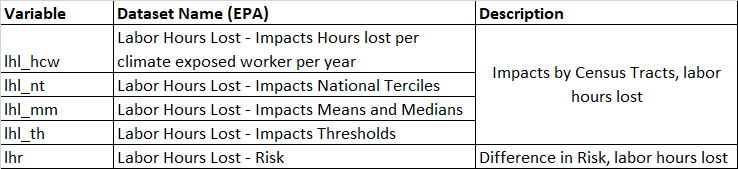

In [ ]:
lhl_hcw = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/lhl_hcw.csv")
lhl_hcw

,Tract ID,1 deg,2 deg,3 deg,4 deg,5 deg
0,1001020100,11.8,26.0,39.2,52.4,63.6
1,1001020200,11.8,26.0,39.2,52.4,63.6
2,1001020300,11.8,26.0,39.2,52.4,63.6
3,1001020400,11.8,26.0,39.2,52.4,63.6
4,1001020500,11.4,25.5,38.7,52.0,63.3
...,...,...,...,...,...,...
72756,56043000200,5.0,13.0,19.9,33.1,42.7
72757,56043000301,3.5,11.8,18.8,32.6,42.2
72758,56043000302,3.5,11.8,18.8,32.6,42.2
72759,56045951100,5.3,12.6,19.6,33.5,41.0


In [ ]:
lhl_nt = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/lhl_nt.csv")
lhl_nt

,1 deg,2 deg,3 deg,4 deg,5 deg
0,3,3,3,3,3
1,3,3,3,3,3
2,3,3,3,3,3
3,3,3,3,3,3
4,3,3,3,3,3
...,...,...,...,...,...
72756,2,2,2,2,2
72757,2,2,2,2,2
72758,2,2,2,2,2
72759,2,2,2,2,2


In [ ]:
lhl_mm = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/lhl_mm.csv")
lhl_mm['Means and Medians'][1:8] = 'Mean - Lowest Tercile'
lhl_mm['Means and Medians'][8:16] = 'Mean - Medium Tercile'
lhl_mm['Means and Medians'][16:24] = 'Mean - Highest Tercile'
lhl_mm['Means and Medians'][24:32] = 'Median - Lowest Tercile'
lhl_mm['Means and Medians'][32:40] = 'Median - Medium Tercile'
lhl_mm['Means and Medians'][40:48] = 'Median - Highest Tercile'
lhl_mm.columns = ['Means and Medians', 'Region', '1 deg', '2 deg', '3 deg', '4 deg', '5 deg']
lhl_mm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

,Means and Medians,Region,1 deg,2 deg,3 deg,4 deg,5 deg
0,Mean - Lowest Tercile,Northwest,0.2,0.9,2.1,4.5,9.6
1,Mean - Lowest Tercile,Southwest,0.9,2.8,4.7,8.2,12.8
2,Mean - Lowest Tercile,Southern Plains,9.6,20.3,30.9,41.2,50.4
3,Mean - Lowest Tercile,Northern Plains,1.7,5.4,10.5,19.5,27.3
4,Mean - Lowest Tercile,Midwest,1.8,5.8,11.4,21.4,26.9
5,Mean - Lowest Tercile,Southeast,4.9,14.3,23.4,35.3,45.3
6,Mean - Lowest Tercile,Northeast,1.0,3.5,8.2,15.0,22.1
7,Mean - Lowest Tercile,NATIONAL,1.6,4.9,9.8,17.5,23.9
8,Mean - Medium Tercile,Northwest,1.1,3.2,6.7,11.1,19.3
9,Mean - Medium Tercile,Southwest,6.6,15.9,22.5,33.9,44.6


In [ ]:
lhl_th = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/lhl_th.csv")
lhl_th['Thresholds'][1:8] = 'minimum'
lhl_th['Thresholds'][9:16] = 'max - lowest tercile; min - medium tercile'
lhl_th['Thresholds'][17:24] = 'max - medium tercile; min - highest tercile'
lhl_th['Thresholds'][25:32] = 'maximum'
lhl_th.columns = ['Thresholds', 'Region', '1 deg', '2 deg', '3 deg', '4 deg', '5 deg']
lhl_th

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

,Thresholds,Region,1 deg,2 deg,3 deg,4 deg,5 deg
0,minimum,Northwest,-0.1,-0.1,0.0,0.0,0.0
1,minimum,Southwest,-1.0,-0.8,-0.5,-0.1,0.0
2,minimum,Southern Plains,1.6,7.3,13.5,19.1,28.3
3,minimum,Northern Plains,0.0,0.0,0.0,0.3,0.9
4,minimum,Midwest,0.0,0.0,0.1,0.4,0.8
5,minimum,Southeast,0.0,0.5,1.4,4.5,6.8
6,minimum,Northeast,0.0,0.1,0.5,1.0,1.9
7,minimum,NATIONAL,-1.0,-0.8,-0.5,-0.1,0.0
8,max - lowest tercile; min - medium tercile,Northwest,0.4,1.5,3.6,7.0,13.9
9,max - lowest tercile; min - medium tercile,Southwest,3.1,8.3,12.8,20.8,29.1


In [ ]:
lhr = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/lhr.csv")
lhr.columns = ['Region', 'Social Vulnerability', '1 deg', '2 deg', '3 deg', '4 deg', '5 deg']
lhr['Social Vulnerability'][0:8] = '65 and Older'
lhr['Social Vulnerability'][8:16] = 'No High School Diploma'
lhr['Social Vulnerability'][16:24] = 'Minority'
lhr['Social Vulnerability'][24:32] = 'Low Income'
lhr['Social Vulnerability'][32:40] = 'White, non-Hispanic'
lhr['Social Vulnerability'][40:48] = 'Hispanic or Latino'
lhr['Social Vulnerability'][48:56] = 'Other Race'
lhr['Social Vulnerability'][56:64] = 'Two or More Races'
lhr['Social Vulnerability'][64:72] = 'Pacific Islander'
lhr['Social Vulnerability'][72:80] = 'Black or African American'
lhr['Social Vulnerability'][80:88] = 'Asian'
lhr['Social Vulnerability'][88:96] = 'American Indian or Alaska Native'
lhr 

,Region,Social Vulnerability,1 deg,2 deg,3 deg,4 deg,5 deg
0,Northwest,65 and Older,-2%,-1%,0%,3%,2%
1,Southwest,65 and Older,0%,1%,2%,3%,2%
2,Southern Plains,65 and Older,2%,2%,2%,3%,3%
3,Northern Plains,65 and Older,2%,-4%,-5%,-2%,-2%
4,Midwest,65 and Older,-1%,-1%,-1%,-1%,-1%
...,...,...,...,...,...,...,...
91,Northern Plains,American Indian or Alaska Native,-21%,-43%,-47%,-21%,-2%
92,Midwest,American Indian or Alaska Native,-35%,-36%,-37%,-40%,-40%
93,Southeast,American Indian or Alaska Native,-2%,-8%,-8%,-6%,-11%
94,Northeast,American Indian or Alaska Native,-26%,-34%,-34%,-37%,-32%


### 4.4: Property and Flooding Datasets




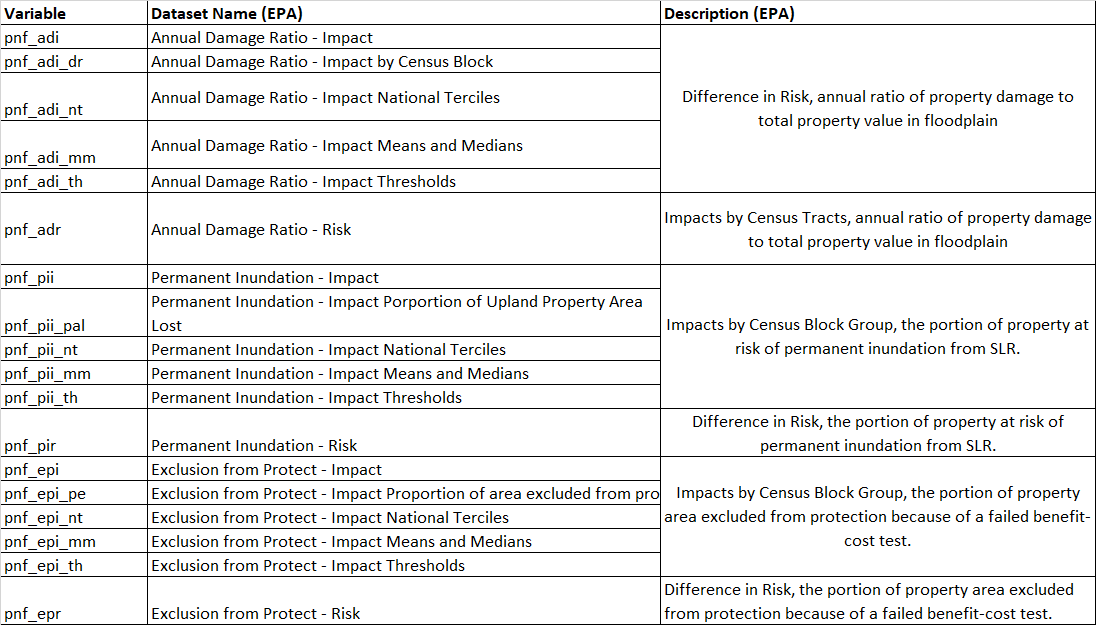

In [ ]:
pnf_adi_dr = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/pnf_adi_dr.csv")
pnf_adi_dr

,Census block group ID,1 deg,2 deg,3 deg,4 deg,5 deg
0,1.001020e+10,0.09%,0.07%,-0.15%,-0.11%,-0.08%
1,1.001020e+10,0.05%,0.04%,-0.08%,-0.07%,-0.05%
2,1.001020e+10,0.03%,0.03%,-0.05%,-0.05%,-0.04%
3,1.001021e+10,0.03%,0.06%,-0.01%,-0.01%,-0.01%
4,1.001021e+10,0.07%,0.07%,-0.07%,-0.07%,-0.07%
...,...,...,...,...,...,...
68955,5.604300e+11,0.15%,0.23%,0.28%,0.30%,0.31%
68956,5.604300e+11,0.00%,0.00%,0.00%,0.00%,0.00%
68957,5.604300e+11,0.02%,0.02%,0.02%,0.04%,0.05%
68958,5.604300e+11,0.24%,0.35%,0.42%,0.59%,0.77%


In [ ]:
pnf_adi_nt = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/pnf_adi_nt.csv")
pnf_adi_nt

,1 deg,2 deg,3 deg,4 deg,5 deg
0,3,2,1,1,1
1,3,2,1,1,1
2,2,2,1,1,1
3,2,2,1,1,1
4,3,2,1,1,1
...,...,...,...,...,...
68955,3,3,3,3,3
68956,2,1,1,1,1
68957,2,2,2,2,2
68958,3,3,3,3,3


In [ ]:
pnf_adi_mm = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/pnf_adi_mm.csv")
pnf_adi_mm['Means and Medians'][1:8] = 'Mean - Lowest Tercile'
pnf_adi_mm['Means and Medians'][8:16] = 'Mean - Medium Tercile'
pnf_adi_mm['Means and Medians'][16:24] = 'Mean - Highest Tercile'
pnf_adi_mm['Means and Medians'][24:32] = 'Median - Lowest Tercile'
pnf_adi_mm['Means and Medians'][32:40] = 'Median - Medium Tercile'
pnf_adi_mm['Means and Medians'][40:48] = 'Median - Highest Tercile'
pnf_adi_mm.columns = ['Means and Medians', 'Region', '1 deg', '2 deg', '3 deg', '4 deg', '5 deg']
pnf_adi_mm

,Means and Medians,Region,1 deg,2 deg,3 deg,4 deg,5 deg
0,Mean - Lowest Tercile,Northwest,-0.03%,-0.04%,-0.02%,-0.04%,-0.08%
1,Mean - Lowest Tercile,Southwest,-0.01%,-0.01%,-0.01%,-0.02%,-0.04%
2,Mean - Lowest Tercile,Southern Plains,-0.06%,-0.04%,-0.03%,-0.04%,-0.08%
3,Mean - Lowest Tercile,Northern Plains,-0.03%,-0.01%,0.00%,-0.07%,-0.22%
4,Mean - Lowest Tercile,Midwest,-0.27%,-0.22%,-0.16%,-0.09%,-0.10%
5,Mean - Lowest Tercile,Southeast,-0.05%,-0.04%,-0.07%,-0.02%,-0.04%
6,Mean - Lowest Tercile,Northeast,-0.14%,-0.06%,-0.04%,-0.04%,-0.10%
7,Mean - Lowest Tercile,NATIONAL,-0.13%,-0.10%,-0.08%,-0.05%,-0.08%
8,Mean - Medium Tercile,Northwest,0.10%,0.14%,0.30%,0.35%,0.39%
9,Mean - Medium Tercile,Southwest,0.00%,0.03%,0.04%,0.06%,0.08%


In [ ]:
pnf_adi_th = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/pnf_adi_th.csv")
pnf_adi_th['Thresholds'][1:8] = 'minimum'
pnf_adi_th['Thresholds'][9:16] = 'max - lowest tercile; min - medium tercile'
pnf_adi_th['Thresholds'][17:24] = 'max - medium tercile; min - highest tercile'
pnf_adi_th['Thresholds'][25:32] = 'maximum'
pnf_adi_th.columns = ['Thresholds', 'Region', '1 deg', '2 deg', '3 deg', '4 deg', '5 deg']
pnf_adi_th

,Thresholds,Region,1 deg,2 deg,3 deg,4 deg,5 deg
0,minimum,Northwest,-3.25%,-3.25%,-3.26%,-5.51%,-10.10%
1,minimum,Southwest,-1.29%,-2.14%,-2.30%,-3.25%,-4.20%
2,minimum,Southern Plains,-1.02%,-0.76%,-0.77%,-2.90%,-5.18%
3,minimum,Northern Plains,-1.72%,-2.08%,-2.08%,-3.97%,-7.28%
4,minimum,Midwest,-7.92%,-7.92%,-7.92%,-7.92%,-14.09%
5,minimum,Southeast,-2.28%,-2.20%,-2.32%,-3.38%,-6.31%
6,minimum,Northeast,-8.10%,-3.98%,-2.49%,-3.73%,-6.47%
7,minimum,NATIONAL,-8.10%,-7.92%,-7.92%,-7.92%,-14.09%
8,max - lowest tercile; min - medium tercile,Northwest,0.04%,0.05%,0.14%,0.16%,0.17%
9,max - lowest tercile; min - medium tercile,Southwest,0.00%,0.00%,0.01%,0.01%,0.01%


In [ ]:
pnf_pii_pal = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/pnf_pii_pal.csv")
pnf_pii_pal 

,Census Block,25 cm,50 cm,75 cm,100 cm,125 cm,150 cm
0,1.003010e+10,0%,4%,21%,45%,62%,70%
1,1.003010e+10,0%,34%,71%,83%,84%,87%
2,1.003010e+10,0%,1%,4%,8%,7%,11%
3,1.003010e+10,0%,26%,44%,47%,41%,48%
4,1.003011e+10,0%,0%,0%,1%,6%,7%
...,...,...,...,...,...,...,...
15931,5.307300e+11,0%,7%,22%,39%,47%,55%
15932,5.307300e+11,0%,0%,1%,7%,15%,19%
15933,5.307300e+11,0%,1%,2%,6%,22%,27%
15934,5.307390e+11,4%,9%,14%,19%,26%,29%


In [ ]:
pnf_pii_nt = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/pnf_pii_nt.csv")
pnf_pii_nt

,25 cm,50 cm,75 cm,100 cm,125 cm,150 cm
0,1,2,3,3,3,3
1,1,3,3,3,3,3
2,1,2,2,2,1,1
3,1,3,3,3,3,3
4,1,1,1,1,1,1
...,...,...,...,...,...,...
15931,2,3,3,3,3,3
15932,1,1,1,2,2,2
15933,1,1,1,2,2,2
15934,3,3,3,2,2,2


In [ ]:
pnf_pii_mm = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/pnf_pii_mm.csv")
pnf_pii_mm['Means and Medians'][1:7] = 'Mean - Lowest Tercile'
pnf_pii_mm['Means and Medians'][8:14] = 'Mean - Medium Tercile'
pnf_pii_mm['Means and Medians'][15:21] = 'Mean - Highest Tercile'
pnf_pii_mm['Means and Medians'][22:28] = 'Median - Lowest Tercile'
pnf_pii_mm['Means and Medians'][29:35] = 'Median - Medium Tercile'
pnf_pii_mm['Means and Medians'][36:41] = 'Median - Highest Tercile'
pnf_pii_mm.columns = ['Means and Medians', 'Region', '25 cm', '50 cm', '75 cm', '100 cm', '125 cm', '150 cm']
pnf_pii_mm

,Means and Medians,Region,25 cm,50 cm,75 cm,100 cm,125 cm,150 cm
0,Mean - Lowest Tercile,Southwest,0%,0%,0%,2%,3%,3%
1,Mean - Lowest Tercile,Northwest,0%,0%,1%,1%,4%,5%
2,Mean - Lowest Tercile,Southern Great Plains,0%,0%,1%,1%,2%,3%
3,Mean - Lowest Tercile,Southeast - Gulf,0%,0%,1%,1%,3%,3%
4,Mean - Lowest Tercile,Southeast - Atlantic,0%,0%,1%,3%,6%,8%
5,Mean - Lowest Tercile,Northeast,0%,0%,0%,1%,2%,2%
6,Mean - Lowest Tercile,NATIONAL,0%,0%,1%,2%,4%,5%
7,Mean - Medium Tercile,Southwest,1%,1%,3%,7%,13%,17%
8,Mean - Medium Tercile,Northwest,1%,3%,4%,7%,13%,18%
9,Mean - Medium Tercile,Southern Great Plains,0%,1%,4%,8%,9%,13%


In [ ]:
pnf_pii_th = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/pnf_pii_th.csv")
pnf_pii_th['Thresholds'][1:7] = 'minimum'
pnf_pii_th['Thresholds'][7:14] = 'max - lowest tercile; min - medium tercile'
pnf_pii_th['Thresholds'][14:21] = 'max - medium tercile; min - highest tercile'
pnf_pii_th['Thresholds'][21:28] = 'maximum'
pnf_pii_th.columns = ['Thresholds', 'Region', '25 cm', '50 cm', '75 cm', '100 cm', '125 cm', '150 cm']
pnf_pii_th

,Thresholds,Region,25 cm,50 cm,75 cm,100 cm,125 cm,150 cm
0,minimum,Southwest,0%,0%,0%,0%,0%,0%
1,minimum,Northwest,0%,0%,0%,0%,0%,0%
2,minimum,Southern Great Plains,0%,0%,0%,0%,0%,0%
3,minimum,Southeast - Gulf,0%,0%,0%,0%,0%,0%
4,minimum,Southeast - Atlantic,0%,0%,0%,0%,0%,0%
5,minimum,Northeast,0%,0%,0%,0%,0%,0%
6,minimum,NATIONAL,0%,0%,0%,0%,0%,0%
7,max - lowest tercile; min - medium tercile,Southwest,0%,0%,1%,4%,8%,9%
8,max - lowest tercile; min - medium tercile,Northwest,1%,1%,2%,4%,8%,12%
9,max - lowest tercile; min - medium tercile,Southern Great Plains,0%,0%,2%,4%,5%,7%


In [ ]:
pnf_pir = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/pnf_pir.csv")
pnf_pir.columns = ['Region', 'Social Vulnerability', '25 cm', '50 cm', '75 cm', '100 cm', '125 cm', '150 cm']
pnf_pir['Social Vulnerability'][1:7] = 'Low Income'
pnf_pir['Social Vulnerability'][7:14] = 'Minority'
pnf_pir['Social Vulnerability'][14:21] = 'No High School Diploma'
pnf_pir['Social Vulnerability'][21:28] = '65 and Older'
pnf_pir
pnf_pir

,Region,Social Vulnerability,25 cm,50 cm,75 cm,100 cm,125 cm,150 cm
0,Southwest,Low Income,-3%,2%,-1%,2%,-2%,0%
1,Northwest,Low Income,12%,6%,7%,1%,-1%,5%
2,Southern Great Plains,Low Income,12%,13%,23%,14%,21%,24%
3,Southeast - Gulf,Low Income,16%,11%,7%,2%,4%,3%
4,Southeast - Atlantic,Low Income,17%,15%,0%,8%,8%,9%
5,Northeast,Low Income,7%,8%,-1%,6%,5%,3%
6,NATIONAL,Low Income,19%,16%,10%,15%,17%,17%
7,Southwest,Minority,-28%,-11%,-12%,9%,10%,8%
8,Northwest,Minority,2%,-4%,-8%,-5%,-2%,-2%
9,Southern Great Plains,Minority,0%,5%,17%,5%,5%,11%


In [ ]:
pnf_epi_pe = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/pnf_epi_pe.csv")
pnf_epi_pe = pnf_epi_pe.dropna(how = 'all', axis = 0)
pnf_epi_pe

,Census Block,25 cm,50 cm,75 cm,100 cm,125 cm,150 cm
0,1.003010e+10,NaN,100%,100%,100%,100%,100%
1,1.003010e+10,100%,100%,100%,100%,100%,100%
2,1.003010e+10,100%,100%,100%,100%,100%,100%
3,1.003010e+10,100%,100%,100%,100%,100%,100%
4,1.003011e+10,NaN,NaN,NaN,NaN,28%,37%
...,...,...,...,...,...,...,...
15931,5.307300e+11,NaN,NaN,NaN,18%,46%,48%
15932,5.307300e+11,NaN,NaN,NaN,NaN,31%,28%
15933,5.307300e+11,NaN,NaN,NaN,NaN,36%,33%
15934,5.307390e+11,100%,100%,100%,100%,100%,100%


In [ ]:
pnf_epi_nt = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/pnf_epi_nt.csv")
pnf_epi_nt

,25 cm,50 cm,75 cm,100 cm,125 cm,150 cm
0,1,3,3,3,3,3
1,3,3,3,3,3,3
2,3,3,3,3,3,3
3,3,3,3,3,3,3
4,1,1,1,1,1,1
...,...,...,...,...,...,...
15931,1,1,1,1,1,1
15932,1,1,1,1,1,1
15933,1,1,1,1,1,1
15934,3,3,3,3,3,3


In [ ]:
pnf_epi_mm = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/pnf_epi_mm.csv")
pnf_epi_mm['Means and Medians'][1:7] = 'Mean - Lowest Tercile'
pnf_epi_mm['Means and Medians'][8:14] = 'Mean - Medium Tercile'
pnf_epi_mm['Means and Medians'][15:21] = 'Mean - Highest Tercile'
pnf_epi_mm['Means and Medians'][22:28] = 'Median - Lowest Tercile'
pnf_epi_mm['Means and Medians'][29:35] = 'Median - Medium Tercile'
pnf_epi_mm['Means and Medians'][36:42] = 'Median - Highest Tercile'
pnf_epi_mm.columns = ['Means and Medians', 'Region', '25 cm', '50 cm', '75 cm', '100 cm', '125 cm', '150 cm']
pnf_epi_mm

,Means and Medians,Region,25 cm,50 cm,75 cm,100 cm,125 cm,150 cm
0,Mean - Lowest Tercile,Southwest,94%,63%,37%,25%,37%,34%
1,Mean - Lowest Tercile,Northwest,97%,95%,91%,44%,33%,31%
2,Mean - Lowest Tercile,Southern Great Plains,48%,48%,30%,12%,15%,18%
3,Mean - Lowest Tercile,Southeast - Gulf,68%,42%,27%,16%,18%,19%
4,Mean - Lowest Tercile,Southeast - Atlantic,94%,56%,37%,26%,32%,33%
5,Mean - Lowest Tercile,Northeast,98%,93%,50%,28%,20%,19%
6,Mean - Lowest Tercile,NATIONAL,71%,65%,52%,33%,32%,32%
7,Mean - Medium Tercile,Southwest,NaN,NaN,91%,78%,86%,86%
8,Mean - Medium Tercile,Northwest,NaN,NaN,NaN,94%,84%,82%
9,Mean - Medium Tercile,Southern Great Plains,96%,93%,90%,52%,52%,56%


In [ ]:
pnf_epi_th = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/pnf_epi_th.csv")
pnf_epi_th['Thresholds'][1:7] = 'minimum'
pnf_epi_th['Thresholds'][7:14] = 'max - lowest tercile; min - medium tercile'
pnf_epi_th['Thresholds'][14:21] = 'max - medium tercile; min - highest tercile'
pnf_epi_th['Thresholds'][21:28] = 'maximum'
pnf_epi_th.columns = ['Thresholds', 'Region', '25 cm', '50 cm', '75 cm', '100 cm', '125 cm', '150 cm']
pnf_epi_th


,Thresholds,Region,25 cm,50 cm,75 cm,100 cm,125 cm,150 cm
0,minimum,Southwest,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%
1,minimum,Northwest,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%
2,minimum,Southern Great Plains,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%
3,minimum,Southeast - Gulf,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%
4,minimum,Southeast - Atlantic,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%
5,minimum,Northeast,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%
6,minimum,NATIONAL,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%
7,max - lowest tercile; min - medium tercile,Southwest,100.0%,99.9%,81.2%,54.0%,73.8%,71.2%
8,max - lowest tercile; min - medium tercile,Northwest,100.0%,100.0%,100.0%,88.1%,68.9%,65.9%
9,max - lowest tercile; min - medium tercile,Southern Great Plains,90.5%,82.5%,67.7%,29.2%,30.0%,36.3%


In [ ]:
pnf_epr = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/pnf_epr.csv")
pnf_epr.columns = ['Region', 'Social Vulnerability', '25 cm', '50 cm', '75 cm', '100 cm', '125 cm', '150 cm']
pnf_epr['Social Vulnerability'][1:7] = 'Low Income'
pnf_epr['Social Vulnerability'][7:14] = 'Minority'
pnf_epr['Social Vulnerability'][14:21] = 'No High School Diploma'
pnf_epr['Social Vulnerability'][21:28] = '65 and Older'
pnf_epr

,Region,Social Vulnerability,25 cm,50 cm,75 cm,100 cm,125 cm,150 cm
0,Southwest,Low Income,14%,25%,16%,15%,14%,12%
1,Northwest,Low Income,3%,5%,12%,11%,13%,14%
2,Southern Great Plains,Low Income,-2%,1%,0%,5%,12%,9%
3,Southeast - Gulf,Low Income,-1%,3%,4%,4%,7%,9%
4,Southeast - Atlantic,Low Income,6%,8%,14%,23%,24%,23%
5,Northeast,Low Income,-1%,2%,6%,6%,6%,6%
6,NATIONAL,Low Income,0%,2%,9%,13%,15%,15%
7,Southwest,Minority,-10%,-19%,-9%,-17%,-8%,-1%
8,Northwest,Minority,3%,4%,0%,3%,0%,3%
9,Southern Great Plains,Minority,32%,13%,-3%,2%,8%,10%


### 4.5: Average Monthly Temperatures (1895 - 2022)

In [ ]:
amt = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/climate_monthly_ts.csv")
amt.columns = ['Date', 'Average Monthly Temperature']
amt['Date'] = pd.to_datetime(amt['Date'], format = '%Y%m')
amt

,Date,Average Monthly Temperature
0,1895-01-01,26.69
1,1895-02-01,26.60
2,1895-03-01,39.97
3,1895-04-01,52.90
4,1895-05-01,59.94
...,...,...
1520,2021-09-01,67.80
1521,2021-10-01,56.97
1522,2021-11-01,45.07
1523,2021-12-01,39.34


In [ ]:
amt['Date']

0      1895-01-01
1      1895-02-01
2      1895-03-01
3      1895-04-01
4      1895-05-01
          ...    
1520   2021-09-01
1521   2021-10-01
1522   2021-11-01
1523   2021-12-01
1524   2022-01-01
Name: Date, Length: 1525, dtype: datetime64[ns]

### 4.6: U.S. CO2 Emission and Avg Temp (1990 - 2019) 

In [ ]:
us_co2 = pd.read_csv("https://raw.githubusercontent.com/makaylalerner/socialclimatechange/main/us_temps_emissions.csv")

In [ ]:
us_co2

,Year,Emissions,Avg Temp
0,1990,4807500.000,53.4
1,1991,4879630.000,51.8
2,1992,4995210.000,53.6
3,1993,5066810.000,50.3
4,1994,5117040.000,54.7
5,1995,5273490.000,53.9
6,1996,5543350.000,54.3
7,1997,5590540.000,53.4
8,1998,5609020.000,52.9
9,1999,5775810.000,53.3


## 5. Exploratory Analysis

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')

##### Descriptions of Datasets

In [ ]:
us_co2.describe()

,Emissions
count,3.000000e+01
mean,5.277263e+06
std,3.487067e+05
min,4.807500e+06
25%,4.979160e+06
50%,5.165015e+06
75%,5.605022e+06
max,5.775810e+06


In [ ]:
lhr.describe()

,1 deg,2 deg,3 deg,4 deg,5 deg
count,96.000000,96.000000,96.000000,96.000000,96.000000
mean,1.052083,0.968750,0.833333,-1.635417,-0.447917
std,24.439558,26.774872,27.356003,25.983039,27.594763
min,-67.000000,-68.000000,-69.000000,-71.000000,-71.000000
25%,-10.750000,-19.000000,-17.500000,-18.500000,-17.750000
50%,1.500000,1.000000,0.500000,-1.000000,1.000000
75%,12.500000,17.250000,19.250000,18.250000,16.500000
max,62.000000,64.000000,64.000000,58.000000,80.000000


In [ ]:
wnd_her.describe()

,Region,Social Vulnerability,25 cm,50 cm,75 cm,100 cm,125 cm,150 cm
count,28,28,28,28,28,28,28,28
unique,7,4,22,19,23,21,24,23
top,Southwest,Low Income,-2%,0%,2%,-7%,4%,-1%
freq,4,7,3,3,3,2,2,3


In [ ]:
wnd_htr.describe()

,25 cm,50 cm,75 cm,100 cm,125 cm,150 cm
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,6.714286,9.428571,9.892857,9.750000,8.357143,8.321429
std,16.336410,18.302861,18.837196,18.741171,17.230925,17.094625
min,-28.000000,-24.000000,-24.000000,-23.000000,-23.000000,-24.000000
25%,0.000000,-0.500000,-1.000000,-2.750000,-3.250000,-3.250000
50%,7.500000,10.500000,11.000000,10.000000,9.500000,9.000000
75%,13.750000,20.000000,21.000000,20.250000,18.500000,19.500000
max,43.000000,42.000000,48.000000,52.000000,46.000000,45.000000


In [ ]:
wnd_wer.describe()

,Region,Social Vulnerability,1 deg,2 deg,3 deg,4 deg,5 deg
count,32,32,32,32,32,32,32
unique,8,4,22,20,17,17,18
top,Northwest,65 and Older,2%,-8%,0%,3%,4%
freq,4,8,4,3,4,4,4


In [ ]:
wnd_wdr.describe()

,Region,Social Vulnerability,1 deg,2 deg,3 deg,4 deg,5 deg
count,32,32,32,32,32,32,32
unique,8,4,23,25,24,27,29
top,Northwest,65 and Older,13%,-11%,-3%,16%,16%
freq,4,8,3,3,3,3,2


In [ ]:
tmr.describe()

,Social Vulnerability,1 deg,2 deg,3 deg,4 deg,5 deg
count,4.00,4.000000,4.000000,4.000000,4.000000,4.000000
mean,0.25,-4.750000,4.250000,7.750000,7.750000,3.250000
std,0.50,8.180261,6.396614,8.421203,8.421203,11.441882
min,0.00,-12.000000,-3.000000,0.000000,0.000000,-8.000000
25%,0.00,-11.250000,0.000000,0.750000,0.750000,-5.750000
50%,0.00,-6.000000,4.500000,7.500000,7.500000,3.000000
75%,0.25,0.500000,8.750000,14.500000,14.500000,12.000000
max,1.00,5.000000,11.000000,16.000000,16.000000,15.000000


In [ ]:
aq_mzr.describe()

,Region,Social Vulnerability,1 deg,2 deg,3 deg,4 deg,5 deg
count,24,24,24,24,24,24,24
unique,8,3,22,19,21,21,23
top,Northwest,No High School Diploma,-14%,15%,9%,-25%,11%
freq,3,8,2,2,3,2,2


In [ ]:
aq_mpr.describe()

,1 deg,2 deg,3 deg,4 deg,5 deg
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,-5.291667,-7.875000,-5.041667,-8.208333,-8.250000
std,26.446795,24.762019,26.903174,26.076775,24.968241
min,-56.000000,-61.000000,-55.000000,-63.000000,-62.000000
25%,-21.250000,-24.500000,-19.500000,-27.250000,-24.000000
50%,-7.000000,-11.000000,-10.000000,-11.000000,-11.000000
75%,7.500000,4.500000,6.750000,5.500000,3.000000
max,67.000000,47.000000,73.000000,61.000000,57.000000


In [ ]:
aq_atr.describe()

,1 deg,2 deg,3 deg,4 deg,5 deg
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,12.541667,7.958333,8.791667,5.916667,6.791667
std,22.177112,22.191810,20.263437,16.489566,16.531864
min,-26.000000,-32.000000,-32.000000,-31.000000,-26.000000
25%,0.000000,0.250000,2.500000,2.500000,4.750000
50%,14.000000,9.000000,12.500000,12.000000,12.000000
75%,22.750000,16.750000,20.000000,17.250000,18.250000
max,77.000000,77.000000,57.000000,27.000000,30.000000


In [ ]:
pnf_epi_th.describe()

,Thresholds,Region,25 cm,50 cm,75 cm,100 cm,125 cm,150 cm
count,28,28,28,28,28,28,28,28
unique,4,7,6,8,11,12,13,13
top,minimum,Southwest,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%
freq,7,4,13,11,9,8,8,8


In [ ]:
amt.describe()

,Average Monthly Temperature
count,1525.000000
mean,52.237744
std,15.359325
min,21.900000
25%,38.030000
50%,52.830000
75%,66.850000
max,76.800000


In [ ]:
pnf_epr.describe()

,Region,Social Vulnerability,25 cm,50 cm,75 cm,100 cm,125 cm,150 cm
count,28,28,28,28,28,28,28,28
unique,7,4,16,19,18,21,23,21
top,Southwest,Low Income,3%,2%,0%,0%,14%,10%
freq,4,7,5,3,3,2,2,3


In [ ]:
aq_aai_ip.describe()

,Tract ID,1 deg,2 deg,3 deg,4 deg,5 deg
count,7.400100e+04,73114.0,7.311400e+04,7.311400e+04,73114.000000,73114.000000
mean,2.839113e+10,0.0,5.060590e-08,2.407200e-07,0.000003,0.000011
std,1.647593e+10,0.0,2.249022e-06,4.900447e-06,0.000016,0.000031
min,1.001020e+09,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.303901e+10,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,2.804700e+10,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000
75%,4.200341e+10,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000
max,7.215375e+10,0.0,1.000000e-04,1.000000e-04,0.000100,0.000200


In [ ]:
aq_aar.describe()

,Region,Social Vulnerability,1 deg,2 deg,3 deg,4 deg,5 deg
count,24,24,24,24,24,24,24
unique,8,3,23,22,23,23,21
top,Northwest,No High School Diploma,1%,7%,53%,21%,-20%
freq,3,8,2,2,2,2,2


In [ ]:
aq_aai_mm.describe()

,1 deg,2 deg,3 deg,4 deg,5 deg
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,0.000003,0.000003,0.000005,0.000009,0.000017
std,0.000007,0.000008,0.000011,0.000015,0.000020
min,-0.000010,-0.000010,-0.000020,-0.000020,-0.000020
25%,0.000000,0.000000,0.000000,0.000000,0.000008
50%,0.000000,0.000000,0.000000,0.000010,0.000015
75%,0.000010,0.000010,0.000010,0.000020,0.000030
max,0.000020,0.000020,0.000030,0.000050,0.000070


In [ ]:
aq_ati_ip.describe()

,Tract ID,1 deg,2 deg,3 deg,4 deg,5 deg
count,7.121300e+04,71213.000000,71213.000000,71213.000000,71213.000000,71213.000000
mean,2.797431e+10,0.000026,0.000031,0.000059,0.000093,0.000175
std,1.579260e+10,0.000062,0.000088,0.000115,0.000152,0.000218
min,1.001020e+09,-0.000310,-0.000410,-0.000479,-0.000568,-0.000720
25%,1.301997e+10,-0.000006,-0.000022,-0.000005,0.000008,0.000049
50%,2.800100e+10,0.000031,0.000034,0.000062,0.000082,0.000150
75%,4.104700e+10,0.000061,0.000079,0.000124,0.000167,0.000277
max,5.604595e+10,0.000523,0.000654,0.000978,0.001600,0.003070


### 5.1 Minority Status and Climate Risk

In [ ]:
# X is the same for all y's, in degrees celsisus
x = [1, 2, 3, 4, 5]

##### Asthma (A) - Minorities by Region Visualization

In [ ]:
a1_race = aq_aar[aq_aar['Social Vulnerability'] == 'Minority']
a1_race.columns = ['Region', 'SV', '1 deg', '2 deg', '3 deg', '4 deg', '5 deg']
a1_race = a1_race.drop('SV', axis = 1)

In [ ]:
a1_race['1 deg'] = a1_race['1 deg'].str.rstrip('%').astype('float') 
a1_race['2 deg'] = a1_race['2 deg'].str.rstrip('%').astype('float')
a1_race['3 deg'] = a1_race['3 deg'].str.rstrip('%').astype('float')  
a1_race['4 deg'] = a1_race['4 deg'].str.rstrip('%').astype('float') 
a1_race['5 deg'] = a1_race['5 deg'].str.rstrip('%').astype('float') 

In [ ]:
#Setting up y1, Northwest Region Data
y1 = a1_race[a1_race ['Region'] == 'Northwest']
y1 = y1.values
y1 = y1.tolist()
y1 = y1[0][1:]

In [ ]:
#Setting up y2, Southwest Region Data
y2 = a1_race[a1_race ['Region'] == 'Southwest']
y2 = y2.values
y2 = y2.tolist()
y2 = y2[0][1:]

In [ ]:
#Setting up y3, Southern Plains Region Data
y3 = a1_race[a1_race ['Region'] == 'Southern Plains']
y3 = y3.values
y3 = y3.tolist()
y3 = y3[0][1:]

In [ ]:
#Setting up y4, Northern Plains Region Data
y4 = a1_race[a1_race ['Region'] == 'Northern Plains']
y4 = y4.values
y4 = y4.tolist()
y4 = y4[0][1:]

In [ ]:
#Setting up y5, Midwest Region Data
y5 = a1_race[a1_race ['Region'] == 'Midwest']
y5 = y5.values
y5 = y5.tolist()
y5 = y5[0][1:]

In [ ]:
#Setting up y6, Southeast Region Data
y6 = a1_race[a1_race ['Region'] == 'Southeast']
y6 = y6.values
y6 = y6.tolist()
y6 = y6[0][1:]

In [ ]:
#Setting up y7, Northeast Region Data
y7 = a1_race[a1_race ['Region'] == 'Northeast']
y7 = y7.values
y7 = y7.tolist()
y7 = y7[0][1:]

In [ ]:
#Setting up y8, National Data
y8 = a1_race[a1_race ['Region'] == 'NATIONAL']
y8 = y8.values
y8 = y8.tolist()
y8 = y8[0][1:]

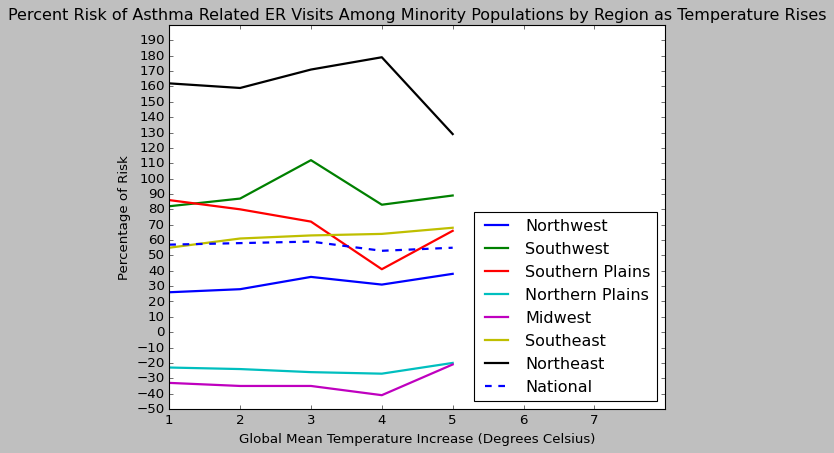

In [ ]:
# making the plot of all y's against the same x 
fig, ax = plt.subplots()

ax.plot(x, y1, linewidth = 2.0)
ax.plot(x, y2, linewidth = 2.0)
ax.plot(x, y3, linewidth = 2.0)
ax.plot(x, y4, linewidth = 2.0)
ax.plot(x, y5, linewidth = 2.0)
ax.plot(x, y6, linewidth = 2.0)
ax.plot(x, y7, linewidth = 2.0) 
ax.plot(x, y8, '--', linewidth = 2.0)

plt.title("Percent Risk of Asthma Related ER Visits Among Minority Populations by Region as Temperature Rises")
ax.legend(['Northwest', 'Southwest', 'Southern Plains', 'Northern Plains', 'Midwest', 'Southeast', 'Northeast', 'National'], loc = 'lower right')
plt.xlabel("Global Mean Temperature Increase (Degrees Celsius)")
plt.ylabel("Percentage of Risk")

ax.set(xlim=(1, 8), xticks=np.arange(1, 8),
       ylim=(-50, 200), yticks=np.arange(-50, 200, 10))

plt.show()

##### Asthma (A) - Vulnerable Populations Visualization

In [ ]:
aq_aar

,Region,Social Vulnerability,1 deg,2 deg,3 deg,4 deg,5 deg
0,Northwest,No High School Diploma,1%,-18%,-17%,-18%,-20%
1,Southwest,No High School Diploma,47%,57%,68%,55%,61%
2,Southern Plains,No High School Diploma,38%,36%,38%,26%,34%
3,Northern Plains,No High School Diploma,-16%,-14%,-16%,-16%,-15%
4,Midwest,No High School Diploma,1%,-1%,2%,1%,4%
5,Southeast,No High School Diploma,10%,7%,6%,6%,13%
6,Northeast,No High School Diploma,53%,47%,53%,54%,48%
7,NATIONAL,No High School Diploma,23%,26%,25%,24%,30%
8,Northwest,Minority,26%,28%,36%,31%,38%
9,Southwest,Minority,82%,87%,112%,83%,89%


In [ ]:
a1_low = aq_aar[aq_aar['Social Vulnerability'] == 'Lower income']
a1_low.columns = ['Region', 'SV', '1 deg', '2 deg', '3 deg', '4 deg', '5 deg']
a1_low = a1_low.drop('SV', axis = 1)

In [ ]:
income_y = a1_low[a1_low ['Region'] == 'NATIONAL']
income_y = income_y.values
income_y = income_y.tolist()
income_y = income_y[0][1:]

In [ ]:
a1_ed = aq_aar[aq_aar['Social Vulnerability'] == 'No High School Diploma']
a1_ed.columns = ['Region', 'SV', '1 deg', '2 deg', '3 deg', '4 deg', '5 deg']
a1_ed = a1_ed.drop('SV', axis = 1)

In [ ]:
ed_y = a1_ed[a1_ed ['Region'] == 'NATIONAL']
ed_y = ed_y.values
ed_y = ed_y.tolist()
ed_y = ed_y[0][1:]

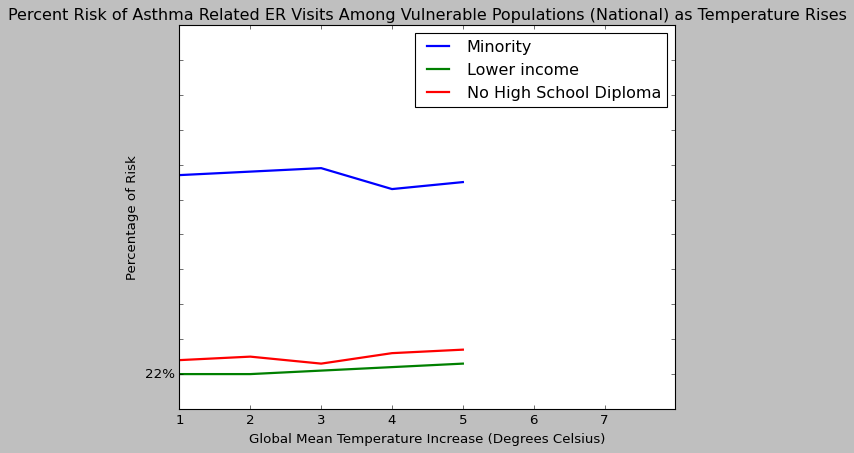

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, y8, linewidth = 2.0)
ax.plot(x, income_y, linewidth = 2.0)
ax.plot(x, ed_y, linewidth = 2.0)


plt.title("Percent Risk of Asthma Related ER Visits Among Vulnerable Populations (National) as Temperature Rises")
ax.legend(['Minority', 'Lower income', 'No High School Diploma'], loc = 'upper right')
plt.xlabel("Global Mean Temperature Increase (Degrees Celsius)")
plt.ylabel("Percentage of Risk")

ax.set(xlim=(1, 8), xticks=np.arange(1, 8),
       ylim=(-10, 100), yticks=np.arange(-10, 100, 10))

plt.show()

##### Asthma (T) - Minorities by Region Visualization

In [ ]:
a2_race = aq_atr[aq_atr['Social Vulnerability'] == 'Minority']
a2_race.columns = ['Region', 'SV', '1 deg', '2 deg', '3 deg', '4 deg', '5 deg']
a2_race = a2_race.drop('SV', axis = 1)

In [ ]:
a2_race['1 deg'] = a2_race['1 deg'].str.rstrip('%').astype('float') 
a2_race['2 deg'] = a2_race['2 deg'].str.rstrip('%').astype('float')
a2_race['3 deg'] = a2_race['3 deg'].str.rstrip('%').astype('float')  
a2_race['4 deg'] = a2_race['4 deg'].str.rstrip('%').astype('float') 
a2_race['5 deg'] = a2_race['5 deg'].str.rstrip('%').astype('float') 

In [ ]:
#Setting up y1, Northwest Region Data
a2_y1 = a2_race[a2_race ['Region'] == 'Northwest']
a2_y1 = a2_y1.values
a2_y1 = a2_y1.tolist()
a2_y1 = a2_y1[0][1:]

In [ ]:
#Setting up y2, Southwest Region Data
a2_y2 = a2_race[a2_race ['Region'] == 'Southwest']
a2_y2 = a2_y2.values
a2_y2 = a2_y2.tolist()
a2_y2 = a2_y2[0][1:]

In [ ]:
#Setting up y3, Southern Plains Region Data
a2_y3 = a2_race[a2_race['Region'] == 'Southern Plains']
a2_y3 = a2_y3.values
a2_y3 = a2_y3.tolist()
a2_y3 = a2_y3[0][1:]

In [ ]:
#Setting up y4, Northern Plains Region Data
a2_y4 = a2_race[a2_race ['Region'] == 'Northern Plains']
a2_y4 = a2_y4.values
a2_y4 = a2_y4.tolist()
a2_y4 = a2_y4[0][1:]

In [ ]:
#Setting up y5, Midwest Region Data
a2_y5 = a2_race[a2_race ['Region'] == 'Midwest']
a2_y5 = a2_y5.values
a2_y5 = a2_y5.tolist()
a2_y5 = a2_y5[0][1:]

In [ ]:
#Setting up y6, Southeast Region Data
a2_y6 = a2_race[a2_race ['Region'] == 'Southeast']
a2_y6 = a2_y6.values
a2_y6 = a2_y6.tolist()
a2_y6 = a2_y6[0][1:]

In [ ]:
#Setting up y7, Northeast Region Data
a2_y7 = a2_race[a2_race ['Region'] == 'Northeast']
a2_y7 = a2_y7.values
a2_y7 = a2_y7.tolist()
a2_y7 = a2_y7[0][1:]

In [ ]:
#Setting up y8, National Data
a2_y8 = a2_race[a2_race ['Region'] == 'NATIONAL']
a2_y8 = a2_y8.values
a2_y8 = a2_y8.tolist()
a2_y8 = a2_y8[0][1:]

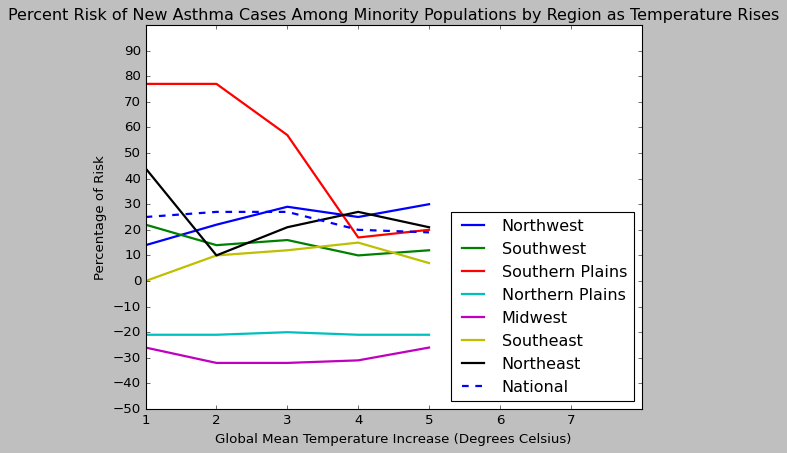

In [ ]:
# making the plot of all y's against the same x 
fig, ax = plt.subplots()

ax.plot(x, a2_y1, linewidth = 2.0)
ax.plot(x, a2_y2, linewidth = 2.0)
ax.plot(x, a2_y3, linewidth = 2.0)
ax.plot(x, a2_y4, linewidth = 2.0)
ax.plot(x, a2_y5, linewidth = 2.0)
ax.plot(x, a2_y6, linewidth = 2.0)
ax.plot(x, a2_y7, linewidth = 2.0) 
ax.plot(x, a2_y8, '--', linewidth = 2.0)

plt.title("Percent Risk of New Asthma Cases Among Minority Populations by Region as Temperature Rises")
ax.legend(['Northwest', 'Southwest', 'Southern Plains', 'Northern Plains', 'Midwest', 'Southeast', 'Northeast', 'National'], loc = 'lower right')
plt.xlabel("Global Mean Temperature Increase (Degrees Celsius)")
plt.ylabel("Percentage of Risk")

ax.set(xlim=(1, 8), xticks=np.arange(1, 8),
       ylim=(-50, 100), yticks=np.arange(-50, 100, 10))

plt.show()

##### Asthma (T) - Vulnerable Populations Visualization

In [ ]:
aq_atr['1 deg'] = aq_atr['1 deg'].str.rstrip('%').astype('float') 
aq_atr['2 deg'] = aq_atr['2 deg'].str.rstrip('%').astype('float')
aq_atr['3 deg'] = aq_atr['3 deg'].str.rstrip('%').astype('float')  
aq_atr['4 deg'] = aq_atr['4 deg'].str.rstrip('%').astype('float') 
aq_atr['5 deg'] = aq_atr['5 deg'].str.rstrip('%').astype('float') 

In [ ]:
a2_low = aq_atr[aq_atr['Social Vulnerability'] == 'Lower income']
a2_low.columns = ['Region', 'SV', '1 deg', '2 deg', '3 deg', '4 deg', '5 deg']
a2_low = a2_low.drop('SV', axis = 1)

In [ ]:
income2_y = a2_low[a2_low ['Region'] == 'NATIONAL']
income2_y = income2_y.values
income2_y = income2_y.tolist()
income2_y = income2_y[0][1:]

In [ ]:
a2_ed = aq_atr[aq_atr['Social Vulnerability'] == 'No High School Diploma']
a2_ed.columns = ['Region', 'SV', '1 deg', '2 deg', '3 deg', '4 deg', '5 deg']
a2_ed = a2_ed.drop('SV', axis = 1)

In [ ]:
ed2_y = a2_ed[a2_ed ['Region'] == 'NATIONAL']
ed2_y = ed2_y.values
ed2_y = ed2_y.tolist()
ed2_y = ed2_y[0][1:]

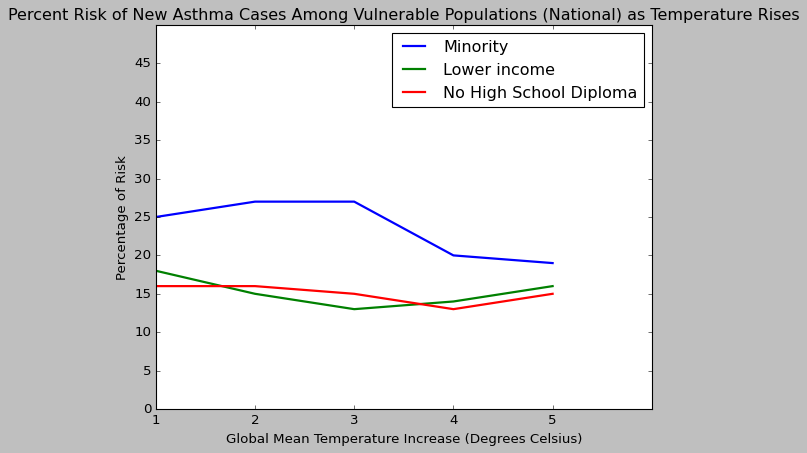

In [ ]:
fig, ax = plt.subplots()
 
ax.plot(x, a2_y8, linewidth = 2.0)
ax.plot(x, income2_y, linewidth = 2.0)
ax.plot(x, ed2_y, linewidth = 2.0)

plt.title("Percent Risk of New Asthma Cases Among Vulnerable Populations (National) as Temperature Rises")
ax.legend(['Minority', 'Lower income', 'No High School Diploma'], loc = 'upper right')
plt.xlabel("Global Mean Temperature Increase (Degrees Celsius)")
plt.ylabel("Percentage of Risk")

ax.set(xlim=(1, 6), xticks=np.arange(1, 6),
       ylim=(0, 50), yticks=np.arange(0, 50, 5))
 
plt.show()

##### Mortality (Di) - Minorities by Region Visualization

In [ ]:
m1_race = aq_mpr[aq_mpr['Social Vulnerability'] == 'Minority']
m1_race.columns = ['Region', 'SV', '1 deg', '2 deg', '3 deg', '4 deg', '5 deg']
m1_race = m1_race.drop('SV', axis = 1)

In [ ]:
m1_race

,Region,1 deg,2 deg,3 deg,4 deg,5 deg
8,Northwest,41%,43%,43%,43%,43%
9,Southwest,-24%,-24%,-13%,-28%,-23%
10,Southern Plains,-56%,-61%,-55%,-63%,-62%
11,Northern Plains,15%,18%,15%,14%,14%
12,Midwest,67%,47%,73%,61%,57%
13,Southeast,-38%,-27%,-27%,-28%,-29%
14,Northeast,-7%,-16%,-14%,-14%,-11%
15,NATIONAL,-45%,-33%,-27%,-30%,-29%


In [ ]:
m1_race['1 deg'] = m1_race['1 deg'].str.rstrip('%').astype('float') 
m1_race['2 deg'] = m1_race['2 deg'].str.rstrip('%').astype('float')
m1_race['3 deg'] = m1_race['3 deg'].str.rstrip('%').astype('float')  
m1_race['4 deg'] = m1_race['4 deg'].str.rstrip('%').astype('float') 
m1_race['5 deg'] = m1_race['5 deg'].str.rstrip('%').astype('float') 

In [ ]:
#Setting up y1, Northwest Region Data
m1_y1 = m1_race[m1_race ['Region'] == 'Northwest']
m1_y1 = m1_y1.values
m1_y1 = m1_y1.tolist()
m1_y1 = m1_y1[0][1:]

In [ ]:
#Setting up y2, Southwest Region Data
m1_y2 = m1_race[m1_race ['Region'] == 'Southwest']
m1_y2 = m1_y2.values
m1_y2 = m1_y2.tolist()
m1_y2 = m1_y2[0][1:]

In [ ]:
#Setting up y3, Southern Plains Region Data
m1_y3 = m1_race[m1_race ['Region'] == 'Southern Plains']
m1_y3 = m1_y3.values
m1_y3 = m1_y3.tolist()
m1_y3 = m1_y3[0][1:]

In [ ]:
#Setting up y4, Northern Plains Region Data
m1_y4 = m1_race[m1_race ['Region'] == 'Northern Plains']
m1_y4 = m1_y4.values
m1_y4 = m1_y4.tolist()
m1_y4 = m1_y4[0][1:]

In [ ]:
#Setting up y5, Midwest Region Data
m1_y5 = m1_race[m1_race ['Region'] == 'Midwest']
m1_y5 = m1_y5.values
m1_y5 = m1_y5.tolist()
m1_y5 = m1_y5[0][1:]

In [ ]:
#Setting up y6, Southeast Region Data
m1_y6 = m1_race[m1_race ['Region'] == 'Southeast']
m1_y6 = m1_y6.values
m1_y6 = m1_y6.tolist()
m1_y6 = m1_y6[0][1:]

In [ ]:
#Setting up y7, Northeast Region Data
m1_y7 = m1_race[m1_race ['Region'] == 'Northeast']
m1_y7 = m1_y7.values
m1_y7 = m1_y7.tolist()
m1_y7 = m1_y7[0][1:]

In [ ]:
#Setting up y8, National Data
m1_y8 = m1_race[m1_race ['Region'] == 'NATIONAL']
m1_y8 = m1_y8.values
m1_y8 = m1_y8.tolist()
m1_y8 = m1_y8[0][1:]

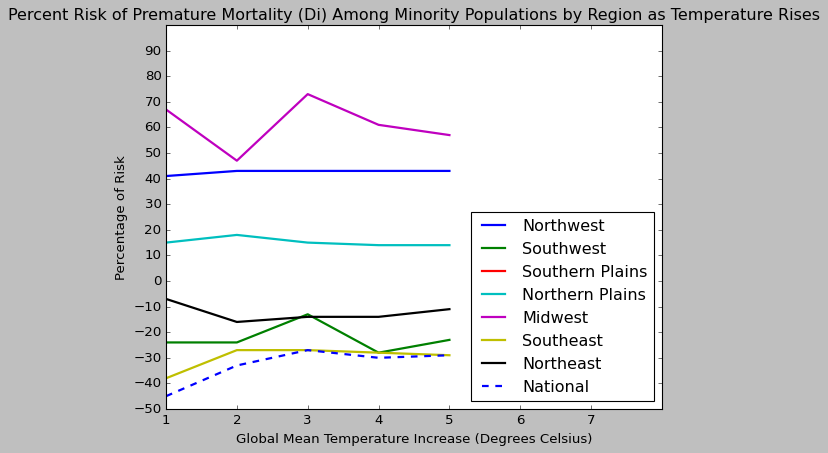

In [ ]:
# making the plot of all y's against the same x 
fig, ax = plt.subplots()

ax.plot(x, m1_y1, linewidth = 2.0)
ax.plot(x, m1_y2, linewidth = 2.0)
ax.plot(x, m1_y3, linewidth = 2.0)
ax.plot(x, m1_y4, linewidth = 2.0)
ax.plot(x, m1_y5, linewidth = 2.0)
ax.plot(x, m1_y6, linewidth = 2.0)
ax.plot(x, m1_y7, linewidth = 2.0) 
ax.plot(x, m1_y8, '--', linewidth = 2.0)

plt.title("Percent Risk of Premature Mortality (Di) Among Minority Populations by Region as Temperature Rises")
ax.legend(['Northwest', 'Southwest', 'Southern Plains', 'Northern Plains', 'Midwest', 'Southeast', 'Northeast', 'National'], loc = 'lower right')
plt.xlabel("Global Mean Temperature Increase (Degrees Celsius)")
plt.ylabel("Percentage of Risk")

ax.set(xlim=(1, 8), xticks=np.arange(1, 8),
       ylim=(-50, 100), yticks=np.arange(-50, 100, 10))

plt.show()

##### Mortality (Di) - Vulnerable Populations Visualization

In [ ]:
aq_mpr['1 deg'] = aq_mpr['1 deg'].str.rstrip('%').astype('float') 
aq_mpr['2 deg'] = aq_mpr['2 deg'].str.rstrip('%').astype('float')
aq_mpr['3 deg'] = aq_mpr['3 deg'].str.rstrip('%').astype('float')  
aq_mpr['4 deg'] = aq_mpr['4 deg'].str.rstrip('%').astype('float') 
aq_mpr['5 deg'] = aq_mpr['5 deg'].str.rstrip('%').astype('float') 

In [ ]:
m1_low = aq_mpr[aq_mpr['Social Vulnerability'] == 'Lower income']
m1_low.columns = ['Region', 'SV', '1 deg', '2 deg', '3 deg', '4 deg', '5 deg']
m1_low = m1_low.drop('SV', axis = 1)

In [ ]:
m1_low

,Region,1 deg,2 deg,3 deg,4 deg,5 deg
16,Northwest,-22.0,-35.0,-35.0,-35.0,-35.0
17,Southwest,-7.0,-7.0,-4.0,-9.0,-6.0
18,Southern Plains,-9.0,-5.0,-10.0,-6.0,-6.0
19,Northern Plains,-2.0,-2.0,-3.0,-4.0,-5.0
20,Midwest,12.0,9.0,18.0,11.0,6.0
21,Southeast,0.0,-12.0,-13.0,-12.0,-13.0
22,Northeast,6.0,3.0,4.0,5.0,2.0
23,NATIONAL,-6.0,-11.0,-12.0,-11.0,-11.0


In [ ]:
m1_inc_y = m1_low[m1_low ['Region'] == 'NATIONAL']
m1_inc_y = m1_inc_y.values
m1_inc_y = m1_inc_y.tolist()
m1_inc_y = m1_inc_y[0][1:]

In [ ]:
m1_inc_y

[-6.0, -11.0, -12.0, -11.0, -11.0]

In [ ]:
m1_ed = aq_mpr[aq_mpr['Social Vulnerability'] == 'No High School Diploma']
m1_ed.columns = ['Region', 'SV', '1 deg', '2 deg', '3 deg', '4 deg', '5 deg']
m1_ed = m1_ed.drop('SV', axis = 1)

In [ ]:
m1_ed

,Region,1 deg,2 deg,3 deg,4 deg,5 deg
0,Northwest,-8.0,-26.0,-27.0,-27.0,-27.0
1,Southwest,-14.0,-13.0,-6.0,-17.0,-13.0
2,Southern Plains,-32.0,-36.0,-33.0,-36.0,-35.0
3,Northern Plains,18.0,20.0,18.0,7.0,8.0
4,Midwest,13.0,13.0,20.0,16.0,13.0
5,Southeast,1.0,-5.0,-6.0,-5.0,-6.0
6,Northeast,-9.0,-11.0,-10.0,-11.0,-13.0
7,NATIONAL,-21.0,-18.0,-17.0,-18.0,-17.0


In [ ]:
m1_ed_y = m1_ed[m1_ed ['Region'] == 'NATIONAL']
m1_ed_y = m1_ed_y.values
m1_ed_y = m1_ed_y.tolist()
m1_ed_y = m1_ed_y[0][1:]

In [ ]:
x = [1, 2, 3, 4, 5]

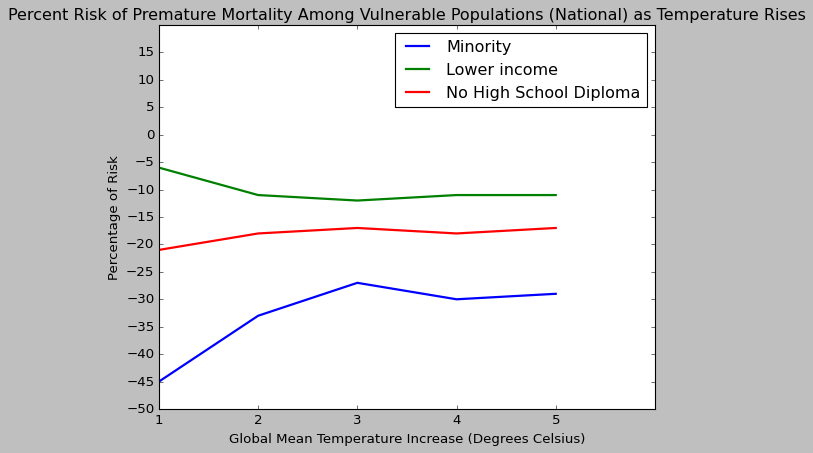

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, m1_y8, linewidth = 2.0)
ax.plot(x, m1_inc_y, linewidth = 2.0)
ax.plot(x, m1_ed_y, linewidth = 2.0)

plt.title("Percent Risk of Premature Mortality Among Vulnerable Populations (National) as Temperature Rises")
ax.legend(['Minority', 'Lower income', 'No High School Diploma'], loc = 'upper right')
plt.xlabel("Global Mean Temperature Increase (Degrees Celsius)")
plt.ylabel("Percentage of Risk")
 
ax.set(xlim=(1, 6), xticks=np.arange(1, 6),
       ylim=(-50, 20), yticks=np.arange(-50, 20, 5))
 
plt.show()

##### Mortality (Z) - Minorities by Region Vizualization

In [ ]:
m2_race = aq_mzr[aq_mzr['Social Vulnerability'] == 'Minority']
m2_race.columns = ['Region', 'SV', '1 deg', '2 deg', '3 deg', '4 deg', '5 deg']
m2_race = m2_race.drop('SV', axis = 1)

In [ ]:
m2_race['1 deg'] = m2_race['1 deg'].str.rstrip('%').astype('float') 
m2_race['2 deg'] = m2_race['2 deg'].str.rstrip('%').astype('float')
m2_race['3 deg'] = m2_race['3 deg'].str.rstrip('%').astype('float')  
m2_race['4 deg'] = m2_race['4 deg'].str.rstrip('%').astype('float') 
m2_race['5 deg'] = m2_race['5 deg'].str.rstrip('%').astype('float') 

In [ ]:
#Setting up y1, Northwest Region Data
m2_y1 = m2_race[m2_race ['Region'] == 'Northwest']
m2_y1 = m2_y1.values
m2_y1 = m2_y1.tolist()
m2_y1 = m2_y1[0][1:]

#Setting up y2, Southwest Region Data
m2_y2 = m2_race[m2_race ['Region'] == 'Southwest']
m2_y2 = m2_y2.values
m2_y2 = m2_y2.tolist()
m2_y2 = m2_y2[0][1:]

#Setting up y3, Southern Plains Region Data
m2_y3 = m2_race[m2_race ['Region'] == 'Southern Plains']
m2_y3 = m2_y3.values
m2_y3 = m2_y3.tolist()
m2_y3 = m2_y3[0][1:]

#Setting up y4, Northern Plains Region Data
m2_y4 = m2_race[m2_race ['Region'] == 'Northern Plains']
m2_y4 = m2_y4.values
m2_y4 = m2_y4.tolist()
m2_y4 = m2_y4[0][1:]

#Setting up y5, Midwest Region Data
m2_y5 = m2_race[m2_race ['Region'] == 'Midwest']
m2_y5 = m2_y5.values
m2_y5 = m2_y5.tolist()
m2_y5 = m2_y5[0][1:]

#Setting up y6, Southeast Region Data
m2_y6 = m2_race[m2_race ['Region'] == 'Southeast']
m2_y6 = m2_y6.values
m2_y6 = m2_y6.tolist()
m2_y6 = m2_y6[0][1:]

#Setting up y7, Northeast Region Data
m2_y7 = m2_race[m2_race ['Region'] == 'Northeast']
m2_y7 = m2_y7.values
m2_y7 = m2_y7.tolist()
m2_y7 = m2_y7[0][1:]

#Setting up y8, National Data
m2_y8 = m2_race[m2_race ['Region'] == 'NATIONAL']
m2_y8 = m2_y8.values
m2_y8 = m2_y8.tolist()
m2_y8 = m2_y8[0][1:]

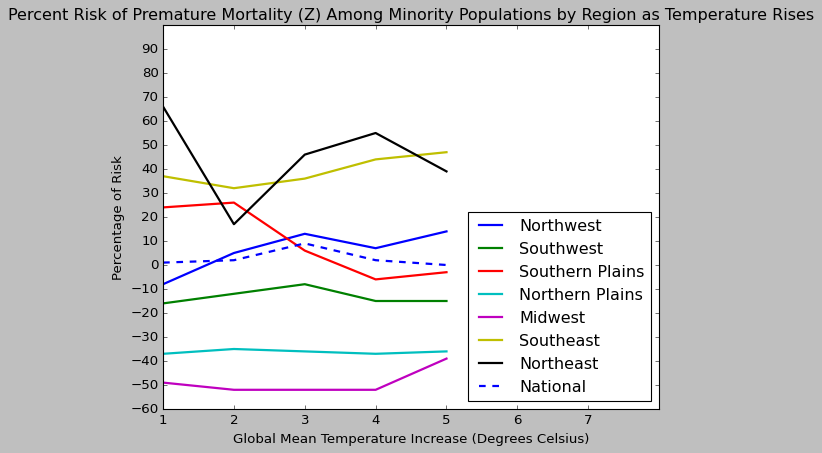

In [ ]:
# making the plot of all y's against the same x 
fig, ax = plt.subplots()

ax.plot(x, m2_y1, linewidth = 2.0)
ax.plot(x, m2_y2, linewidth = 2.0)
ax.plot(x, m2_y3, linewidth = 2.0)
ax.plot(x, m2_y4, linewidth = 2.0)
ax.plot(x, m2_y5, linewidth = 2.0)
ax.plot(x, m2_y6, linewidth = 2.0)
ax.plot(x, m2_y7, linewidth = 2.0) 
ax.plot(x, m2_y8, '--', linewidth = 2.0)

plt.title("Percent Risk of Premature Mortality (Z) Among Minority Populations by Region as Temperature Rises")
ax.legend(['Northwest', 'Southwest', 'Southern Plains', 'Northern Plains', 'Midwest', 'Southeast', 'Northeast', 'National'], loc = 'lower right')
plt.xlabel("Global Mean Temperature Increase (Degrees Celsius)")
plt.ylabel("Percentage of Risk")

ax.set(xlim=(1, 8), xticks=np.arange(1, 8),
       ylim=(-60, 100), yticks=np.arange(-60, 100, 10))

plt.show()

##### Mortality - Vulnerable Populations Viz

In [ ]:
m2_low = aq_mzr[aq_mzr['Social Vulnerability'] == 'Lower income']
m2_low.columns = ['Region', 'SV', '1 deg', '2 deg', '3 deg', '4 deg', '5 deg']
m2_low = m2_low.drop('SV', axis = 1)

In [ ]:
m2_inc_y = m2_low[m2_low ['Region'] == 'NATIONAL']
m2_inc_y = m2_inc_y.values
m2_inc_y = m2_inc_y.tolist()
m2_inc_y = m2_inc_y[0][1:]

In [ ]:
m2_ed = aq_mzr[aq_mzr['Social Vulnerability'] == 'No High School Diploma']
m2_ed.columns = ['Region', 'SV', '1 deg', '2 deg', '3 deg', '4 deg', '5 deg']
m2_ed = m2_ed.drop('SV', axis = 1)

In [ ]:
m2_ed_y = m2_ed[m2_ed ['Region'] == 'NATIONAL']
m2_ed_y = m2_ed_y.values
m2_ed_y = m2_ed_y.tolist()
m2_ed_y = m2_ed_y[0][1:]

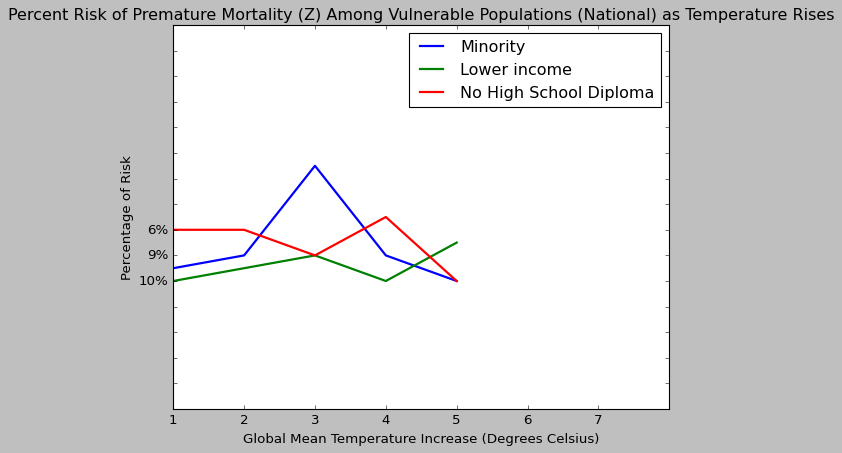

In [ ]:
fig, ax = plt.subplots()
 
ax.plot(x, m2_y8, linewidth = 2.0)
ax.plot(x, m2_inc_y, linewidth = 2.0)
ax.plot(x, m2_ed_y, linewidth = 2.0)
 
 
plt.title("Percent Risk of Premature Mortality (Z) Among Vulnerable Populations (National) as Temperature Rises")
ax.legend(['Minority', 'Lower income', 'No High School Diploma'], loc = 'upper right')
plt.xlabel("Global Mean Temperature Increase (Degrees Celsius)")
plt.ylabel("Percentage of Risk")
 
ax.set(xlim=(1, 8), xticks=np.arange(1, 8),
       ylim=(-10, 20), yticks=np.arange(-10, 20, 2))
 
plt.show()

##### Temperature Mortality - Vulnerable Populations Viz

In [ ]:
tmr

,Region,Social Vulnerability,1 deg,2 deg,3 deg,4 deg,5 deg
0,NATIONAL,65 and Older,-1%,1%,1%,1%,11%
1,NATIONAL,No High School Diploma,-11%,-3%,0%,0%,-8%
2,NATIONAL,Minority,-12%,8%,14%,14%,-5%
3,NATIONAL,Low Income,5%,11%,16%,16%,15%


In [ ]:
m3_race = tmr[tmr['Social Vulnerability'] == 'Minority']
m3_race.columns = ['Region', 'SV', '1 deg', '2 deg', '3 deg', '4 deg', '5 deg']
m3_race = m3_race.drop('SV', axis = 1)

In [ ]:
m3_race['1 deg'] = m3_race['1 deg'].str.rstrip('%').astype('float') 
m3_race['2 deg'] = m3_race['2 deg'].str.rstrip('%').astype('float')
m3_race['3 deg'] = m3_race['3 deg'].str.rstrip('%').astype('float')  
m3_race['4 deg'] = m3_race['4 deg'].str.rstrip('%').astype('float') 
m3_race['5 deg'] = m3_race['5 deg'].str.rstrip('%').astype('float') 

In [ ]:
#Setting up y1, National data only
m3_y1 = m3_race[m3_race ['Region'] == 'NATIONAL']
m3_y1 = m3_y1.values
m3_y1 = m3_y1.tolist()
m3_y1 = m3_y1[0][1:]

In [ ]:
m3_inc = tmr[tmr['Social Vulnerability'] == 'Low Income']
m3_inc.columns = ['Region', 'SV', '1 deg', '2 deg', '3 deg', '4 deg', '5 deg']
m3_inc = m3_inc.drop('SV', axis = 1)

In [ ]:
m3_inc_y1 = m3_inc[m3_inc ['Region'] == 'NATIONAL']
m3_inc_y1 = m3_inc_y1.values
m3_inc_y1 = m3_inc_y1.tolist()
m3_inc_y1 = m3_inc_y1[0][1:]

In [ ]:
m3_ed = tmr[tmr['Social Vulnerability'] == 'No High School Diploma']
m3_ed.columns = ['Region', 'SV', '1 deg', '2 deg', '3 deg', '4 deg', '5 deg']
m3_ed = m3_ed.drop('SV', axis = 1)

In [ ]:
m3_ed_y1 = m3_ed[m3_ed ['Region'] == 'NATIONAL']
m3_ed_y1 = m3_ed_y1.values
m3_ed_y1 = m3_ed_y1.tolist()
m3_ed_y1 = m3_ed_y1[0][1:]

In [ ]:
m3_age = tmr[tmr['Social Vulnerability'] == '65 and Older']
m3_age.columns = ['Region', 'SV', '1 deg', '2 deg', '3 deg', '4 deg', '5 deg']
m3_age = m3_age.drop('SV', axis = 1)

In [ ]:
m3_age_y1 = m3_age[m3_age ['Region'] == 'NATIONAL']
m3_age_y1 = m3_age_y1.values
m3_age_y1 = m3_age_y1.tolist()
m3_age_y1 = m3_age_y1[0][1:]

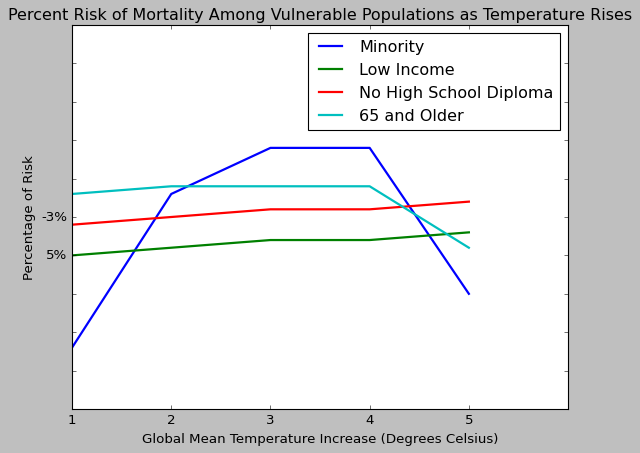

In [ ]:
# making the plot of all y's against the same x 
fig, ax = plt.subplots()

ax.plot(x, m3_y1, linewidth = 2.0)
ax.plot(x, m3_inc_y1, linewidth = 2.0)
ax.plot(x, m3_ed_y1, linewidth = 2.0)
ax.plot(x, m3_age_y1, linewidth = 2.0)

plt.title("Percent Risk of Mortality Among Vulnerable Populations as Temperature Rises")
plt.legend(['Minority', 'Low Income', 'No High School Diploma', '65 and Older'])
plt.xlabel("Global Mean Temperature Increase (Degrees Celsius)")
plt.ylabel("Percentage of Risk")

ax.set(xlim=(1, 6), xticks=np.arange(1, 6),
       ylim=(-20, 30), yticks=np.arange(-20, 30, 5))

plt.show()

##### Weather Delays - Minorities by Region

In [ ]:
w1_race = wnd_wdr[wnd_wdr['Social Vulnerability'] == 'Minority']
w1_race.columns = ['Region', 'SV', '1 deg', '2 deg', '3 deg', '4 deg', '5 deg']
w1_race = w1_race.drop('SV', axis = 1)

w1_race['1 deg'] = w1_race['1 deg'].str.rstrip('%').astype('float') 
w1_race['2 deg'] = w1_race['2 deg'].str.rstrip('%').astype('float')
w1_race['3 deg'] = w1_race['3 deg'].str.rstrip('%').astype('float')  
w1_race['4 deg'] = w1_race['4 deg'].str.rstrip('%').astype('float') 
w1_race['5 deg'] = w1_race['5 deg'].str.rstrip('%').astype('float') 

In [ ]:
#Setting up y1, Northwest Region Data
w1_y1 = w1_race[w1_race ['Region'] == 'Northwest']
w1_y1 = w1_y1.values
w1_y1 = w1_y1.tolist()
w1_y1 = w1_y1[0][1:]

#Setting up y2, Southwest Region Data
w1_y2 = w1_race[w1_race ['Region'] == 'Southwest']
w1_y2 = w1_y2.values
w1_y2 = w1_y2.tolist()
w1_y2 = w1_y2[0][1:]

#Setting up y3, Southern Plains Region Data
w1_y3 = w1_race[w1_race ['Region'] == 'Southern Plains']
w1_y3 = w1_y3.values
w1_y3 = w1_y3.tolist()
w1_y3 = w1_y3[0][1:]

#Setting up y4, Northern Plains Region Data
w1_y4 = w1_race[w1_race ['Region'] == 'Northern Plains']
w1_y4 = w1_y4.values
w1_y4 = w1_y4.tolist()
w1_y4 = w1_y4[0][1:]

#Setting up y5, Midwest Region Data
w1_y5 = w1_race[w1_race ['Region'] == 'Midwest']
w1_y5 = w1_y5.values
w1_y5 = w1_y5.tolist()
w1_y5 = w1_y5[0][1:]

#Setting up y6, Southeast Region Data
w1_y6 = w1_race[w1_race ['Region'] == 'Southeast']
w1_y6 = w1_y6.values
w1_y6 = w1_y6.tolist()
w1_y6 = w1_y6[0][1:]

#Setting up y7, Northeast Region Data
w1_y7 = w1_race[w1_race ['Region'] == 'Northeast']
w1_y7 = w1_y7.values
w1_y7 = w1_y7.tolist()
w1_y7 = w1_y7[0][1:]

#Setting up y8, National Data
w1_y8 = w1_race[w1_race ['Region'] == 'NATIONAL']
w1_y8 = w1_y8.values
w1_y8 = w1_y8.tolist()
w1_y8 = w1_y8[0][1:]

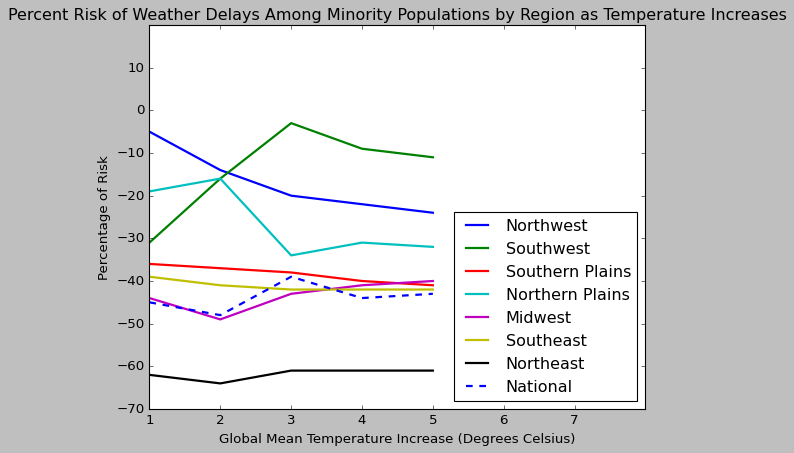

In [ ]:
# making the plot of all y's against the same x 
fig, ax = plt.subplots()

ax.plot(x, w1_y1, linewidth = 2.0)
ax.plot(x, w1_y2, linewidth = 2.0)
ax.plot(x, w1_y3, linewidth = 2.0)
ax.plot(x, w1_y4, linewidth = 2.0)
ax.plot(x, w1_y5, linewidth = 2.0)
ax.plot(x, w1_y6, linewidth = 2.0)
ax.plot(x, w1_y7, linewidth = 2.0) 
ax.plot(x, w1_y8, '--', linewidth = 2.0)

plt.title("Percent Risk of Weather Delays Among Minority Populations by Region as Temperature Increases")
ax.legend(['Northwest', 'Southwest', 'Southern Plains', 'Northern Plains', 'Midwest', 'Southeast', 'Northeast', 'National'], loc = 'lower right')
plt.xlabel("Global Mean Temperature Increase (Degrees Celsius)")
plt.ylabel("Percentage of Risk")

ax.set(xlim=(1, 8), xticks=np.arange(1, 8),
       ylim=(-70, 20), yticks=np.arange(-70, 20, 10))

plt.show()

##### Weather Delays - Vulnerable Populations Viz

In [ ]:
w1_low = wnd_wdr[wnd_wdr['Social Vulnerability'] == 'Low Income']
w1_low.columns = ['Region', 'SV', '1 deg', '2 deg', '3 deg', '4 deg', '5 deg']
 
w1_low = w1_low.drop('SV', axis = 1)
w1_inc_y = w1_low[w1_low ['Region'] == 'NATIONAL']
w1_inc_y = w1_inc_y.values
w1_inc_y = w1_inc_y.tolist()
w1_inc_y = w1_inc_y[0][1:]
 
w1_ed = wnd_wdr[wnd_wdr['Social Vulnerability'] == 'No High School Diploma']
w1_ed.columns = ['Region', 'SV', '1 deg', '2 deg', '3 deg', '4 deg', '5 deg']
w1_ed = w1_ed.drop('SV', axis = 1)
 
w1_ed_y = w1_ed[w1_ed ['Region'] == 'NATIONAL']
w1_ed_y = w1_ed_y.values
w1_ed_y = w1_ed_y.tolist()
w1_ed_y = w1_ed_y[0][1:]

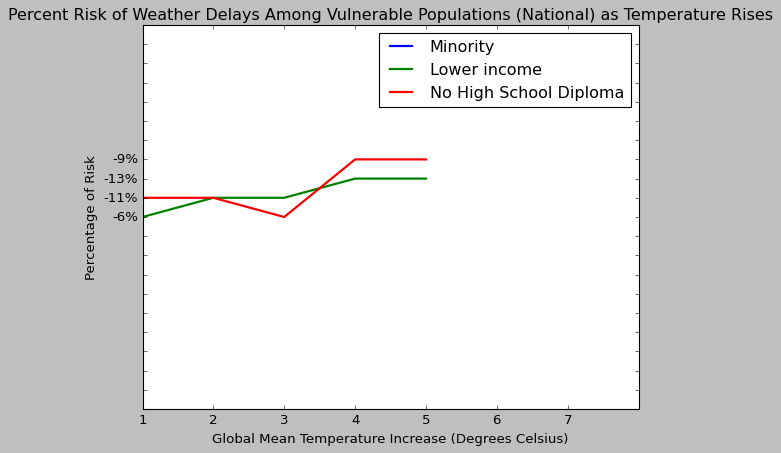

In [ ]:
fig, ax = plt.subplots()
 
ax.plot(x, w1_y8, linewidth = 2.0)
ax.plot(x, w1_inc_y, linewidth = 2.0)
ax.plot(x, w1_ed_y, linewidth = 2.0)
 
 
plt.title("Percent Risk of Weather Delays Among Vulnerable Populations (National) as Temperature Rises")
ax.legend(['Minority', 'Lower income', 'No High School Diploma'], loc = 'upper right')
plt.xlabel("Global Mean Temperature Increase (Degrees Celsius)")
plt.ylabel("Percentage of Risk")
 
ax.set(xlim=(1, 8), xticks=np.arange(1, 8),
       ylim=(-10, 10), yticks=np.arange(-10, 10, 1))
 
plt.show()


##### Weather Delays - Minorities by Region Viz

In [ ]:
wnd_htr

,Region,Social Vulnerability,25 cm,50 cm,75 cm,100 cm,125 cm,150 cm
0,Southwest,Low Income,-20%,-24%,-24%,-23%,-23%,-24%
1,Northwest,Low Income,27%,24%,21%,20%,20%,21%
2,Southern Plains,Low Income,11%,13%,13%,13%,13%,13%
3,Southeast - Gulf,Low Income,2%,5%,0%,-2%,-3%,-3%
4,Southeast - Atlantic,Low Income,6%,9%,10%,9%,10%,10%
5,Northeast,Low Income,33%,35%,36%,36%,32%,32%
6,NATIONAL,Low Income,10%,14%,12%,11%,9%,9%
7,Southwest,Minority,-28%,-23%,-20%,-18%,-18%,-17%
8,Northwest,Minority,13%,17%,22%,21%,21%,22%
9,Southern Plains,Minority,3%,2%,4%,4%,4%,4%


In [ ]:
w2_race = wnd_htr[wnd_htr['Social Vulnerability'] == 'Minority']
w2_race.columns = ['Region', 'SV', '25 cm', '50 cm', '75 cm', '100 cm', '125 cm', '150 cm']
w2_race = w2_race.drop('SV', axis = 1)

w2_race['25 cm'] = w2_race['25 cm'].str.rstrip('%').astype('float') 
w2_race['50 cm'] = w2_race['50 cm'].str.rstrip('%').astype('float')
w2_race['75 cm'] = w2_race['75 cm'].str.rstrip('%').astype('float')  
w2_race['100 cm'] = w2_race['100 cm'].str.rstrip('%').astype('float') 
w2_race['125 cm'] = w2_race['125 cm'].str.rstrip('%').astype('float') 
w2_race['150 cm'] = w2_race['150 cm'].str.rstrip('%').astype('float') 

In [ ]:
# new x in cm
x2 = [25, 50, 75, 100, 125, 150]

In [ ]:
#Setting up y1, Southwest Region Data
w2_y1 = w2_race[w2_race ['Region'] == 'Southwest']
w2_y1 = w2_y1.values
w2_y1 = w2_y1.tolist()
w2_y1 = w2_y1[0][1:]
 
#Setting up y2, Northwest Region Data
w2_y2 = w2_race[w2_race ['Region'] == 'Northwest']
w2_y2 = w2_y2.values
w2_y2 = w2_y2.tolist()
w2_y2 = w2_y2[0][1:]
 
#Setting up y3, Southern Plains Region Data
w2_y3 = w2_race[w2_race ['Region'] == 'Southern Plains']
w2_y3 = w2_y3.values
w2_y3 = w2_y3.tolist()
w2_y3 = w2_y3[0][1:]
 
#Setting up y4, Southeast - Gulf Region Data
w2_y4 = w2_race[w2_race ['Region'] == 'Southeast - Gulf']
w2_y4 = w2_y4.values
w2_y4 = w2_y4.tolist()
w2_y4 = w2_y4[0][1:]
 
#Setting up y5, Southeast - Atlantic Region Data
w2_y5 = w2_race[w2_race ['Region'] == 'Southeast - Atlantic']
w2_y5 = w2_y5.values
w2_y5 = w2_y5.tolist()
w2_y5 = w2_y5[0][1:]
 
#Setting up y6, Northeast Region Data
w2_y6 = w2_race[w2_race ['Region'] == 'Northeast']
w2_y6 = w2_y6.values
w2_y6 = w2_y6.tolist()
w2_y6 = w2_y6[0][1:]
 
#Setting up y7, National Data
w2_y7 = w2_race[w2_race ['Region'] == 'NATIONAL']
w2_y7 = w2_y7.values
w2_y7 = w2_y7.tolist()
w2_y7 = w2_y7[0][1:]

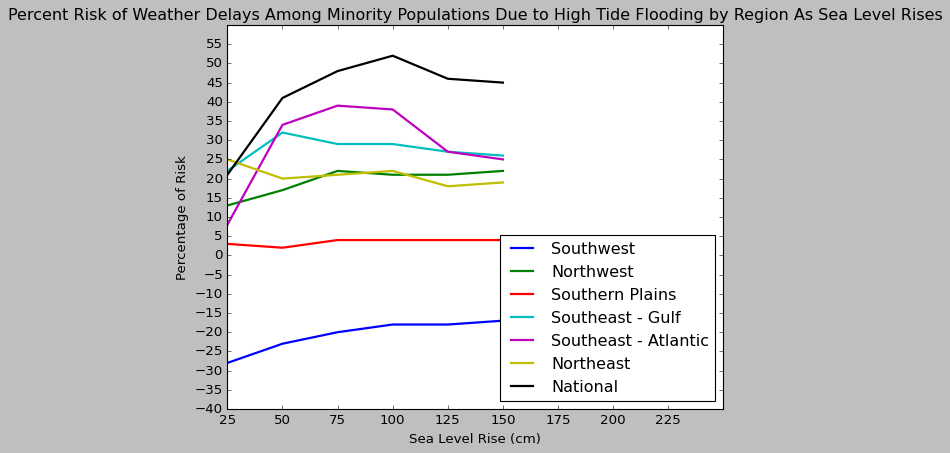

In [ ]:
# making the plot of all y's against the same x 
fig, ax = plt.subplots()

ax.plot(x2, w2_y1, linewidth = 2.0)
ax.plot(x2, w2_y2, linewidth = 2.0)
ax.plot(x2, w2_y3, linewidth = 2.0)
ax.plot(x2, w2_y4, linewidth = 2.0)
ax.plot(x2, w2_y5, linewidth = 2.0)
ax.plot(x2, w2_y6, linewidth = 2.0)
ax.plot(x2, w2_y7, linewidth = 2.0) 

plt.title("Percent Risk of Weather Delays Among Minority Populations Due to High Tide Flooding by Region As Sea Level Rises")
ax.legend(['Southwest', 'Northwest', 'Southern Plains', 'Southeast - Gulf', 'Southeast - Atlantic', 'Northeast', 'National'], loc = 'lower right')
plt.xlabel("Sea Level Rise (cm)")
plt.ylabel("Percentage of Risk")

ax.set(xlim=(25, 250), xticks=np.arange(25, 250, 25),
       ylim=(-40, 60), yticks=np.arange(-40, 60, 5))

plt.show()

##### Weather Delays - Vulnerable Populations Viz

In [ ]:
 
wnd_htr['25 cm'] = wnd_htr['25 cm'].str.rstrip('%').astype('float') 
wnd_htr['50 cm'] = wnd_htr['50 cm'].str.rstrip('%').astype('float')
wnd_htr['75 cm'] = wnd_htr['75 cm'].str.rstrip('%').astype('float')  
wnd_htr['100 cm'] = wnd_htr['100 cm'].str.rstrip('%').astype('float') 
wnd_htr['125 cm'] = wnd_htr['125 cm'].str.rstrip('%').astype('float') 
wnd_htr['150 cm'] = wnd_htr['150 cm'].str.rstrip('%').astype('float') 

In [ ]:
w2_low = wnd_htr[wnd_htr['Social Vulnerability'] == 'Low Income']
w2_low.columns = ['Region', 'SV', '25 cm', '50 cm', '75 cm', '100 cm', '125 cm', '150 cm']
 
w2_low = w2_low.drop('SV', axis = 1)
w2_inc_y = w2_low[w2_low ['Region'] == 'NATIONAL']
w2_inc_y = w2_inc_y.values
w2_inc_y = w2_inc_y.tolist()
w2_inc_y = w2_inc_y[0][1:]

In [ ]:
w2_ed = wnd_htr[wnd_htr['Social Vulnerability'] == 'No High School Diploma']
w2_ed.columns = ['Region', 'SV', '25 cm', '50 cm', '75 cm', '100 cm', '125 cm', '150 cm']
w2_ed = w2_ed.drop('SV', axis = 1)
 
w2_ed_y = w2_ed[w2_ed ['Region'] == 'NATIONAL']
w2_ed_y = w2_ed_y.values
w2_ed_y = w2_ed_y.tolist()
w2_ed_y = w2_ed_y[0][1:]

In [ ]:
w2_age = wnd_htr[wnd_htr['Social Vulnerability'] == '65 and Older']
w2_age.columns = ['Region', 'SV', '25 cm', '50 cm', '75 cm', '100 cm', '125 cm', '150 cm']
w2_age = w2_age.drop('SV', axis = 1)
 
w2_age_y = w2_age[w2_age ['Region'] == 'NATIONAL']
w2_age_y = w2_age_y.values
w2_age_y = w2_age_y.tolist()
w2_age_y = w2_age_y[0][1:]

In [ ]:
x2 = [25, 50, 75, 100, 125, 150]

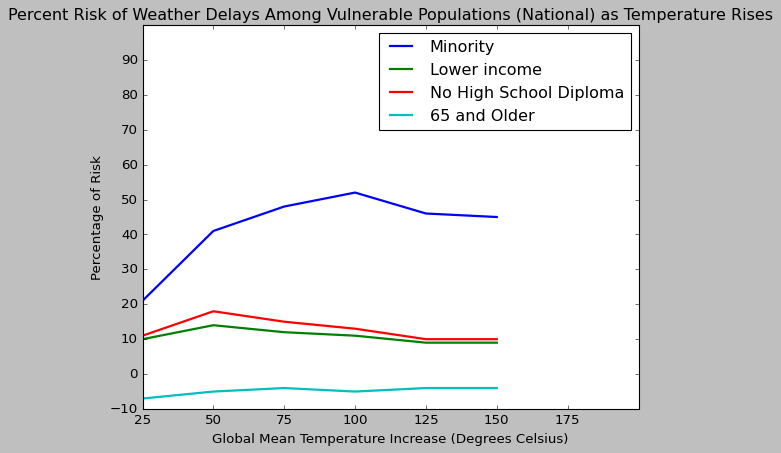

In [ ]:
fig, ax = plt.subplots()
 
ax.plot(x2, w2_y7, linewidth = 2.0)
ax.plot(x2, w2_inc_y, linewidth = 2.0)
ax.plot(x2, w2_ed_y, linewidth = 2.0)
ax.plot(x2, w2_age_y, linewidth = 2.0)
 
 
plt.title("Percent Risk of Weather Delays Among Vulnerable Populations (National) as Temperature Rises")
ax.legend(['Minority', 'Lower income', 'No High School Diploma', '65 and Older'], loc = 'upper right')
plt.xlabel("Global Mean Temperature Increase (Degrees Celsius)")
plt.ylabel("Percentage of Risk")
 
ax.set(xlim=(25, 200), xticks=np.arange(25, 200, 25),
       ylim=(-10, 100), yticks=np.arange(-10, 100, 10))
 
plt.show()


##### Labor Hours by Race Visualization

In [ ]:
# national by minority classification 

#y1, general minority 
l1 = lhr[lhr['Social Vulnerability'] == 'Minority']
l1.columns = ['Region', 'SV', '1 deg', '2 deg', '3 deg', '4 deg', '5 deg']
l1 = l1.drop('SV', axis = 1)

l1['1 deg'] = l1['1 deg'].str.rstrip('%').astype('float') 
l1['2 deg'] = l1['2 deg'].str.rstrip('%').astype('float')
l1['3 deg'] = l1['3 deg'].str.rstrip('%').astype('float')  
l1['4 deg'] = l1['4 deg'].str.rstrip('%').astype('float') 
l1['5 deg'] = l1['5 deg'].str.rstrip('%').astype('float') 

l1_y1 = l1[l1 ['Region'] == 'NATIONAL'] 
l1_y1 = l1_y1.values
l1_y1 = l1_y1.tolist()
l1_y1 = l1_y1[0][1:]

l1_y1

[38.0, 35.0, 32.0, 22.0, 36.0]

In [ ]:
#y2, White, non-Hispanic

l2 = lhr[lhr['Social Vulnerability'] == 'White, non-Hispanic']
l2.columns = ['Region', 'SV', '1 deg', '2 deg', '3 deg', '4 deg', '5 deg']
l2 = l2.drop('SV', axis = 1)

l2['1 deg'] = l2['1 deg'].str.rstrip('%').astype('float') 
l2['2 deg'] = l2['2 deg'].str.rstrip('%').astype('float')
l2['3 deg'] = l2['3 deg'].str.rstrip('%').astype('float')  
l2['4 deg'] = l2['4 deg'].str.rstrip('%').astype('float') 
l2['5 deg'] = l2['5 deg'].str.rstrip('%').astype('float') 

l2_y2 = l2[l2 ['Region'] == 'NATIONAL'] 
l2_y2 = l2_y2.values
l2_y2 = l2_y2.tolist()
l2_y2 = l2_y2[0][1:]

l2_y2

[-28.0, -26.0, -24.0, -18.0, -26.0]

In [ ]:
#y3, Hispanic or Latino

l3 = lhr[lhr['Social Vulnerability'] == 'Hispanic or Latino']
l3.columns = ['Region', 'SV', '1 deg', '2 deg', '3 deg', '4 deg', '5 deg']
l3 = l3.drop('SV', axis = 1)

l3['1 deg'] = l3['1 deg'].str.rstrip('%').astype('float') 
l3['2 deg'] = l3['2 deg'].str.rstrip('%').astype('float')
l3['3 deg'] = l3['3 deg'].str.rstrip('%').astype('float')  
l3['4 deg'] = l3['4 deg'].str.rstrip('%').astype('float') 
l3['5 deg'] = l3['5 deg'].str.rstrip('%').astype('float') 

l3_y3 = l3[l3 ['Region'] == 'NATIONAL'] 
l3_y3 = l3_y3.values
l3_y3 = l3_y3.tolist()
l3_y3 = l3_y3[0][1:]

l3_y3

[48.0, 43.0, 36.0, 25.0, 41.0]

In [ ]:
#y4, Other Race

l4 = lhr[lhr['Social Vulnerability'] == 'Other Race']
l4.columns = ['Region', 'SV', '1 deg', '2 deg', '3 deg', '4 deg', '5 deg']
l4 = l4.drop('SV', axis = 1)

l4['1 deg'] = l4['1 deg'].str.rstrip('%').astype('float') 
l4['2 deg'] = l4['2 deg'].str.rstrip('%').astype('float')
l4['3 deg'] = l4['3 deg'].str.rstrip('%').astype('float')  
l4['4 deg'] = l4['4 deg'].str.rstrip('%').astype('float') 
l4['5 deg'] = l4['5 deg'].str.rstrip('%').astype('float') 

l4_y4 = l4[l4 ['Region'] == 'NATIONAL'] 
l4_y4 = l4_y4.values
l4_y4 = l4_y4.tolist()
l4_y4 = l4_y4[0][1:]

l4_y4

[16.0, 12.0, 7.0, 1.0, 10.0]

In [ ]:
#y5, Two or More Races

l5 = lhr[lhr['Social Vulnerability'] == 'Two or More Races']
l5.columns = ['Region', 'SV', '1 deg', '2 deg', '3 deg', '4 deg', '5 deg']
l5 = l5.drop('SV', axis = 1)

l5['1 deg'] = l5['1 deg'].str.rstrip('%').astype('float') 
l5['2 deg'] = l5['2 deg'].str.rstrip('%').astype('float')
l5['3 deg'] = l5['3 deg'].str.rstrip('%').astype('float')  
l5['4 deg'] = l5['4 deg'].str.rstrip('%').astype('float') 
l5['5 deg'] = l5['5 deg'].str.rstrip('%').astype('float') 
 
l5_y5 = l5[l5 ['Region'] == 'NATIONAL'] 
l5_y5 = l5_y5.values
l5_y5 = l5_y5.tolist()
l5_y5 = l5_y5[0][1:]
 
l5_y5


[1.0, 0.0, -3.0, -2.0, -2.0]

In [ ]:
#y6, Pacific Islander
l6 = lhr[lhr['Social Vulnerability'] == 'Pacific Islander']
l6.columns = ['Region', 'SV', '1 deg', '2 deg', '3 deg', '4 deg', '5 deg']
l6 = l6.drop('SV', axis = 1)
 
l6['1 deg'] = l6['1 deg'].str.rstrip('%').astype('float') 
l6['2 deg'] = l6['2 deg'].str.rstrip('%').astype('float')
l6['3 deg'] = l6['3 deg'].str.rstrip('%').astype('float')  
l6['4 deg'] = l6['4 deg'].str.rstrip('%').astype('float') 
l6['5 deg'] = l6['5 deg'].str.rstrip('%').astype('float') 
 
l6_y6 = l6[l6 ['Region'] == 'NATIONAL'] 
l6_y6 = l6_y6.values
l6_y6 = l6_y6.tolist()
l6_y6 = l6_y6[0][1:]
 
l6_y6


[11.0, 3.0, -7.0, -13.0, -5.0]

In [ ]:
#y7, Black or African American
l7 = lhr[lhr['Social Vulnerability'] == 'Black or African American']
l7.columns = ['Region', 'SV', '1 deg', '2 deg', '3 deg', '4 deg', '5 deg']
l7 = l7.drop('SV', axis = 1)
 
l7['1 deg'] = l7['1 deg'].str.rstrip('%').astype('float') 
l7['2 deg'] = l7['2 deg'].str.rstrip('%').astype('float')
l7['3 deg'] = l7['3 deg'].str.rstrip('%').astype('float')  
l7['4 deg'] = l7['4 deg'].str.rstrip('%').astype('float') 
l7['5 deg'] = l7['5 deg'].str.rstrip('%').astype('float') 
 
l7_y7 = l7[l7 ['Region'] == 'NATIONAL'] 
l7_y7 = l7_y7.values
l7_y7 = l7_y7.tolist()
l7_y7 = l7_y7[0][1:]
 
l7_y7

[20.0, 23.0, 29.0, 24.0, 28.0]

In [ ]:
#y8, Asian
l8 = lhr[lhr['Social Vulnerability'] == 'Asian']
l8.columns = ['Region', 'SV', '1 deg', '2 deg', '3 deg', '4 deg', '5 deg']
l8 = l8.drop('SV', axis = 1)
 
l8['1 deg'] = l8['1 deg'].str.rstrip('%').astype('float') 
l8['2 deg'] = l8['2 deg'].str.rstrip('%').astype('float')
l8['3 deg'] = l8['3 deg'].str.rstrip('%').astype('float')  
l8['4 deg'] = l8['4 deg'].str.rstrip('%').astype('float') 
l8['5 deg'] = l8['5 deg'].str.rstrip('%').astype('float') 
 
l8_y8 = l8[l8 ['Region'] == 'NATIONAL'] 
l8_y8 = l8_y8.values
l8_y8 = l8_y8.tolist()
l8_y8 = l8_y8[0][1:]
 
l8_y8


[-26.0, -30.0, -36.0, -40.0, -33.0]

In [ ]:
#y9, American Indian or Alaska Native
l9 = lhr[lhr['Social Vulnerability'] == 'American Indian or Alaska Native']
l9.columns = ['Region', 'SV', '1 deg', '2 deg', '3 deg', '4 deg', '5 deg']
l9 = l9.drop('SV', axis = 1)
 
l9['1 deg'] = l9['1 deg'].str.rstrip('%').astype('float') 
l9['2 deg'] = l9['2 deg'].str.rstrip('%').astype('float')
l9['3 deg'] = l9['3 deg'].str.rstrip('%').astype('float')  
l9['4 deg'] = l9['4 deg'].str.rstrip('%').astype('float') 
l9['5 deg'] = l9['5 deg'].str.rstrip('%').astype('float') 
 
l9_y9 = l9[l9 ['Region'] == 'NATIONAL'] 
l9_y9 = l9_y9.values
l9_y9 = l9_y9.tolist()
l9_y9 = l9_y9[0][1:]
 
l9_y9


[40.0, 37.0, 32.0, 31.0, 30.0]

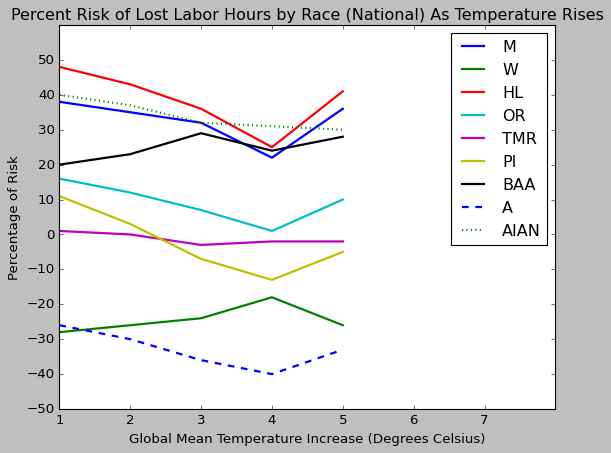

In [ ]:
# making the plot of all y's against the same x 
fig, ax = plt.subplots()

ax.plot(x, l1_y1, linewidth = 2.0)
ax.plot(x, l2_y2, linewidth = 2.0)
ax.plot(x, l3_y3, linewidth = 2.0)
ax.plot(x, l4_y4, linewidth = 2.0)
ax.plot(x, l5_y5, linewidth = 2.0)
ax.plot(x, l6_y6, linewidth = 2.0)
ax.plot(x, l7_y7, linewidth = 2.0) 
ax.plot(x, l8_y8, '--', linewidth = 2.0)
ax.plot(x, l9_y9, ':', linewidth = 2.0)


plt.title("Percent Risk of Lost Labor Hours by Race (National) As Temperature Rises")

# legend abbreviated for space, 
# M = Minority, W = White non-Hispanic, HL = Hispanic or Latino, OR = Other Race, TMR = Two or more races, PI = Pacific Islander, 
# BAA = Black or African American, A = Asian, AIAN = Americam Indian or Alaska Native

ax.legend(['M', 'W', 'HL', 'OR','TMR','PI','BAA','A','AIAN'], loc = 'upper right')
plt.xlabel("Global Mean Temperature Increase (Degrees Celsius)")
plt.ylabel("Percentage of Risk")

ax.set(xlim=(1, 8), xticks=np.arange(1, 8),
       ylim=(-50, 60), yticks=np.arange(-50, 60, 10))

plt.show()

##### Labor Hours - Vulnerable Populations Visualization

In [ ]:
lhr

,Region,Social Vulnerability,1 deg,2 deg,3 deg,4 deg,5 deg
0,Northwest,65 and Older,-2%,-1%,0%,3%,2%
1,Southwest,65 and Older,0%,1%,2%,3%,2%
2,Southern Plains,65 and Older,2%,2%,2%,3%,3%
3,Northern Plains,65 and Older,2%,-4%,-5%,-2%,-2%
4,Midwest,65 and Older,-1%,-1%,-1%,-1%,-1%
...,...,...,...,...,...,...,...
91,Northern Plains,American Indian or Alaska Native,-21%,-43%,-47%,-21%,-2%
92,Midwest,American Indian or Alaska Native,-35%,-36%,-37%,-40%,-40%
93,Southeast,American Indian or Alaska Native,-2%,-8%,-8%,-6%,-11%
94,Northeast,American Indian or Alaska Native,-26%,-34%,-34%,-37%,-32%


In [ ]:
lhr['1 deg'] = lhr['1 deg'].str.rstrip('%').astype('float') 
lhr['2 deg'] = lhr['2 deg'].str.rstrip('%').astype('float')
lhr['3 deg'] = lhr['3 deg'].str.rstrip('%').astype('float')  
lhr['4 deg'] = lhr['4 deg'].str.rstrip('%').astype('float') 
lhr['5 deg'] = lhr['5 deg'].str.rstrip('%').astype('float') 



In [ ]:
l1_low = lhr[lhr['Social Vulnerability'] == 'Low Income']
l1_low.columns = ['Region', 'SV', '1 deg', '2 deg', '3 deg', '4 deg', '5 deg']
l1_low = l1_low.drop('SV', axis = 1)

In [ ]:
l1_inc_y = l1_low[l1_low ['Region'] == 'NATIONAL']
l1_inc_y = l1_inc_y.values
l1_inc_y = l1_inc_y.tolist()
l1_inc_y = l1_inc_y[0][1:]

In [ ]:
l1_ed = lhr[lhr['Social Vulnerability'] == 'No High School Diploma']
l1_ed.columns = ['Region', 'SV', '1 deg', '2 deg', '3 deg', '4 deg', '5 deg']
l1_ed = l1_ed.drop('SV', axis = 1)

In [ ]:
l1_ed_y = l1_ed[l1_ed ['Region'] == 'NATIONAL']
l1_ed_y = l1_ed_y.values
l1_ed_y = l1_ed_y.tolist()
l1_ed_y = l1_ed_y[0][1:]

In [ ]:
l1_age = lhr[lhr['Social Vulnerability'] == '65 and Older']
l1_age.columns = ['Region', 'SV', '1 deg', '2 deg', '3 deg', '4 deg', '5 deg']
l1_age = l1_age.drop('SV', axis = 1)

In [ ]:
l1_age_y = l1_age[l1_age ['Region'] == 'NATIONAL']
l1_age_y = l1_age_y.values
l1_age_y = l1_age_y.tolist()
l1_age_y = l1_age_y[0][1:]

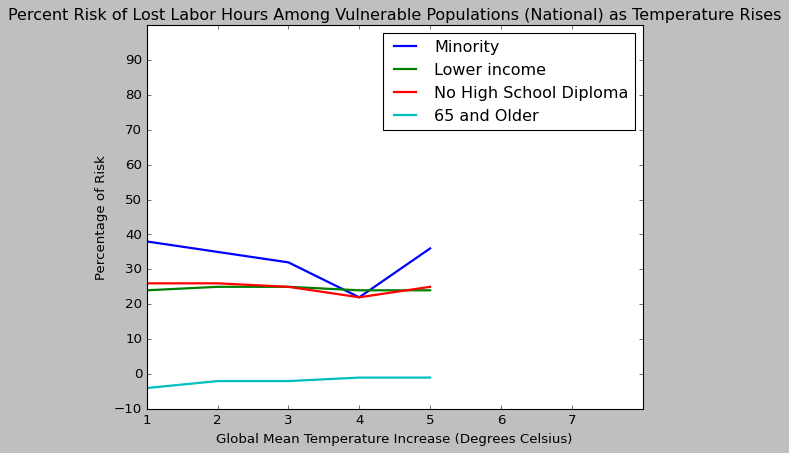

In [ ]:
fig, ax = plt.subplots()
 
ax.plot(x, l1_y1, linewidth = 2.0)
ax.plot(x, l1_inc_y, linewidth = 2.0)
ax.plot(x, l1_ed_y, linewidth = 2.0)
ax.plot(x, l1_age_y, linewidth = 2.0)
 
plt.title("Percent Risk of Lost Labor Hours Among Vulnerable Populations (National) as Temperature Rises")
ax.legend(['Minority', 'Lower income', 'No High School Diploma', '65 and Older'], loc = 'upper right')
plt.xlabel("Global Mean Temperature Increase (Degrees Celsius)")
plt.ylabel("Percentage of Risk")
 
ax.set(xlim=(1, 8), xticks=np.arange(1, 8),
       ylim=(-10, 100), yticks=np.arange(-10, 100, 10))
 
plt.show()

##### Property Damage - Minorities by Region

In [ ]:
p1_race = pnf_pir[pnf_pir['Social Vulnerability'] == 'Minority']
p1_race.columns = ['Region', 'SV', '25 cm', '50 cm', '75 cm', '100 cm', '125 cm', '150 cm']
p1_race = p1_race.drop('SV', axis = 1)
 
p1_race['25 cm'] = p1_race['25 cm'].str.rstrip('%').astype('float') 
p1_race['50 cm'] = p1_race['50 cm'].str.rstrip('%').astype('float')
p1_race['75 cm'] = p1_race['75 cm'].str.rstrip('%').astype('float')  
p1_race['100 cm'] = p1_race['100 cm'].str.rstrip('%').astype('float') 
p1_race['125 cm'] = p1_race['125 cm'].str.rstrip('%').astype('float') 
p1_race['150 cm'] = p1_race['150 cm'].str.rstrip('%').astype('float') 

In [ ]:
 
#Setting up y1, Southwest Region Data
p1_y1 = p1_race[p1_race ['Region'] == 'Southwest']
p1_y1 = p1_y1.values
p1_y1 = p1_y1.tolist()
p1_y1 = p1_y1[0][1:]
 
#Setting up y2, Northwest Region Data
p1_y2 = p1_race[p1_race ['Region'] == 'Northwest']
p1_y2 = p1_y2.values
p1_y2 = p1_y2.tolist()
p1_y2 = p1_y2[0][1:]
 
#Setting up y3, Southern Plains Region Data
p1_y3 = p1_race[p1_race ['Region'] == 'Southern Great Plains']
p1_y3 = p1_y3.values
p1_y3 = p1_y3.tolist()
p1_y3 = p1_y3[0][1:]
 
#Setting up y4, Southeast - Gulf Region Data
 
p1_y4 = p1_race[p1_race ['Region'] == 'Southeast - Gulf']
p1_y4 = p1_y4.values
p1_y4 = p1_y4.tolist()
p1_y4 = p1_y4[0][1:]
 
#Setting up y5, Southeast - Atlantic Region Data
p1_y5 = p1_race[p1_race ['Region'] == 'Southeast - Atlantic']
p1_y5 = p1_y5.values
p1_y5 = p1_y5.tolist()
p1_y5 = p1_y5[0][1:]
 
#Setting up y6, Northeast Region Data
p1_y6 = p1_race[p1_race ['Region'] == 'Northeast']
p1_y6 = p1_y6.values
p1_y6 = p1_y6.tolist()
p1_y6 = p1_y6[0][1:]
 
#Setting up y7, National Data
p1_y7 = p1_race[p1_race ['Region'] == 'NATIONAL']
p1_y7 = p1_y7.values
p1_y7 = p1_y7.tolist()
p1_y7 = p1_y7[0][1:]

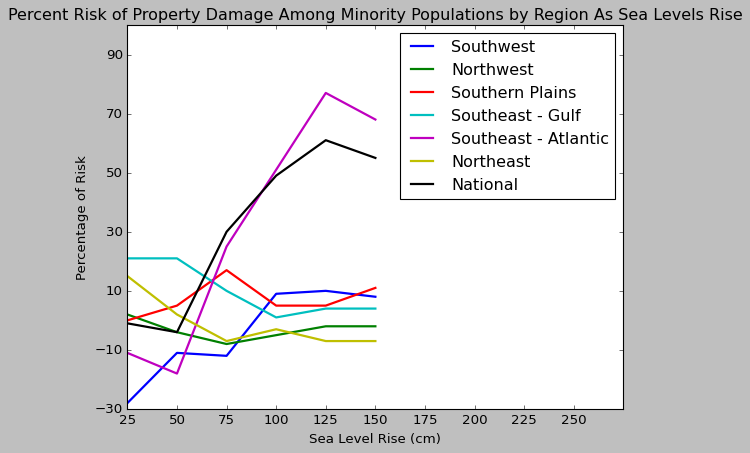

In [ ]:
# making the plot of all y's against the same x 
fig, ax = plt.subplots()
 
ax.plot(x2, p1_y1, linewidth = 2.0)
ax.plot(x2, p1_y2, linewidth = 2.0)
ax.plot(x2, p1_y3, linewidth = 2.0)
ax.plot(x2, p1_y4, linewidth = 2.0)
ax.plot(x2, p1_y5, linewidth = 2.0)
ax.plot(x2, p1_y6, linewidth = 2.0)
ax.plot(x2, p1_y7, linewidth = 2.0) 

plt.title("Percent Risk of Property Damage Among Minority Populations by Region As Sea Levels Rise")
ax.legend(['Southwest', 'Northwest', 'Southern Plains', 'Southeast - Gulf', 'Southeast - Atlantic', 'Northeast', 'National'], loc = 'upper right')
plt.xlabel("Sea Level Rise (cm)")
plt.ylabel("Percentage of Risk")

ax.set(xlim=(25, 275), xticks=np.arange(25, 275, 25),
       ylim=(-30, 100), yticks=np.arange(-30, 100, 20))

plt.show()

##### Property Damage - Vulnerable Populations Visualization

In [ ]:
pnf_pir

,Region,Social Vulnerability,25 cm,50 cm,75 cm,100 cm,125 cm,150 cm
0,Southwest,Low Income,-3%,2%,-1%,2%,-2%,0%
1,Northwest,Low Income,12%,6%,7%,1%,-1%,5%
2,Southern Great Plains,Low Income,12%,13%,23%,14%,21%,24%
3,Southeast - Gulf,Low Income,16%,11%,7%,2%,4%,3%
4,Southeast - Atlantic,Low Income,17%,15%,0%,8%,8%,9%
5,Northeast,Low Income,7%,8%,-1%,6%,5%,3%
6,NATIONAL,Low Income,19%,16%,10%,15%,17%,17%
7,Southwest,Minority,-28%,-11%,-12%,9%,10%,8%
8,Northwest,Minority,2%,-4%,-8%,-5%,-2%,-2%
9,Southern Great Plains,Minority,0%,5%,17%,5%,5%,11%


In [ ]:
p1_low = pnf_pir[pnf_pir['Social Vulnerability'] == 'Low Income']
p1_low.columns = ['Region', 'SV', '25 cm', '50 cm', '75 cm', '100 cm', '125 cm', '150 cm']
p1_low = p1_low.drop('SV', axis = 1)

p1_inc_y = p1_low[p1_low ['Region'] == 'NATIONAL']
p1_inc_y = p1_inc_y.values
p1_inc_y = p1_inc_y.tolist()
p1_inc_y = p1_inc_y[0][1:]
 
p1_ed = pnf_pir[pnf_pir['Social Vulnerability'] == 'No High School Diploma']
p1_ed.columns = ['Region','SV','25 cm', '50 cm', '75 cm', '100 cm', '125 cm', '150 cm']
p1_ed = p1_ed.drop('SV', axis = 1)
 
p1_ed_y = p1_ed[p1_ed ['Region'] == 'NATIONAL']
p1_ed_y = p1_ed_y.values
p1_ed_y = p1_ed_y.tolist()
p1_ed_y = p1_ed_y[0][1:]
 
p1_age =  pnf_pir[pnf_pir['Social Vulnerability'] == '65 and Older']
p1_age.columns = ['Region', 'SV', '25 cm', '50 cm', '75 cm', '100 cm', '125 cm', '150 cm']
p1_age = p1_age.drop('SV', axis = 1)

p1_age_y = p1_age[p1_age ['Region'] == 'NATIONAL']
p1_age_y = p1_age_y.values
p1_age_y = p1_age_y.tolist()
p1_age_y = p1_age_y[0][1:]

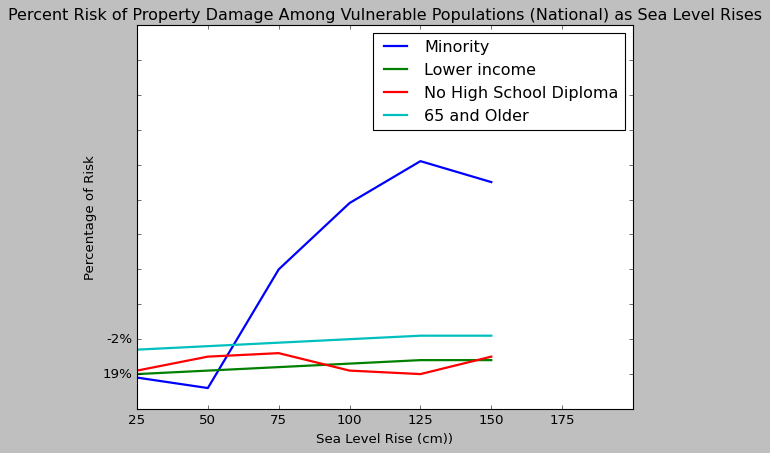

In [ ]:
fig, ax = plt.subplots()
 
ax.plot(x2, p1_y7, linewidth = 2.0)
ax.plot(x2, p1_inc_y, linewidth = 2.0)
ax.plot(x2, p1_ed_y, linewidth = 2.0)
ax.plot(x2, p1_age_y, linewidth = 2.0)
 
 
plt.title("Percent Risk of Property Damage Among Vulnerable Populations (National) as Sea Level Rises")
ax.legend(['Minority', 'Lower income', 'No High School Diploma', '65 and Older'], loc = 'upper right')
plt.xlabel("Sea Level Rise (cm))")
plt.ylabel("Percentage of Risk")
 
ax.set(xlim=(25, 200), xticks=np.arange(25, 200, 25),
       ylim=(-10, 100), yticks=np.arange(-10, 100, 10))
 
plt.show()


### 5.2 Low Income Status and Climate Risk

##### Asthma (A) - Low Income by Region Visualization

In [ ]:
a1_income = aq_aar[aq_aar['Social Vulnerability'] == 'Lower income']
a1_income.columns = ['Region', 'SV', '1 deg', '2 deg', '3 deg', '4 deg', '5 deg']
a1_income = a1_income.drop('SV', axis = 1)

#a1_income['1 deg'] = a1_income['1 deg'].str.rstrip('%').astype('float') 
#a1_income['2 deg'] = a1_income['2 deg'].str.rstrip('%').astype('float')
#a1_income['3 deg'] = a1_income['3 deg'].str.rstrip('%').astype('float')  
#a1_income['4 deg'] = a1_income['4 deg'].str.rstrip('%').astype('float') 
#a1_income['5 deg'] = a1_income['5 deg'].str.rstrip('%').astype('float') 


In [ ]:
#Setting up y1, Northwest Region Data
a1i_y1 = a1_income[a1_income ['Region'] == 'Northwest']
a1i_y1 = a1i_y1.values
a1i_y1 = a1i_y1.tolist()
a1i_y1 = a1i_y1[0][1:]

In [ ]:
#Setting up y2, Southwest Region Data
a1i_y2 = a1_income[a1_income ['Region'] == 'Southwest']
a1i_y2 = a1i_y2.values
a1i_y2 = a1i_y2.tolist()
a1i_y2 = a1i_y2[0][1:]

In [ ]:
#Setting up y3, Southern Plains Region Data
a1i_y3 = a1_income[a1_income ['Region'] == 'Southern Plains']
a1i_y3 = a1i_y3.values
a1i_y3 = a1i_y3.tolist()
a1i_y3 = a1i_y3[0][1:]

In [ ]:
#Setting up y4, Northern Plains Region Data
a1i_y4 = a1_income[a1_income ['Region'] == 'Northern Plains']
a1i_y4 = a1i_y4.values
a1i_y4 = a1i_y4.tolist()
a1i_y4 = a1i_y4[0][1:]

In [ ]:
#Setting up y5, Midwest Region Data
a1i_y5 = a1_income[a1_income ['Region'] == 'Midwest']
a1i_y5 = a1i_y5.values
a1i_y5 = a1i_y5.tolist()
a1i_y5 = a1i_y5[0][1:]

In [ ]:
#Setting up y6, Southeast Region Data
a1i_y6 = a1_income[a1_income ['Region'] == 'Southeast']
a1i_y6 = a1i_y6.values
a1i_y6 = a1i_y6.tolist()
a1i_y6 = a1i_y6[0][1:]

In [ ]:
#Setting up y7, Northeast Region Data
a1i_y7 = a1_income[a1_income ['Region'] == 'Northeast']
a1i_y7 = a1i_y7.values
a1i_y7 = a1i_y7.tolist()
a1i_y7 = a1i_y7[0][1:]


In [ ]:
#Setting up y8, NATIONAL Data
a1i_y8 = a1_income[a1_income ['Region'] == 'NATIONAL']
a1i_y8 = a1i_y8.values
a1i_y8 = a1i_y8.tolist()
a1i_y8 = a1i_y8[0][1:]

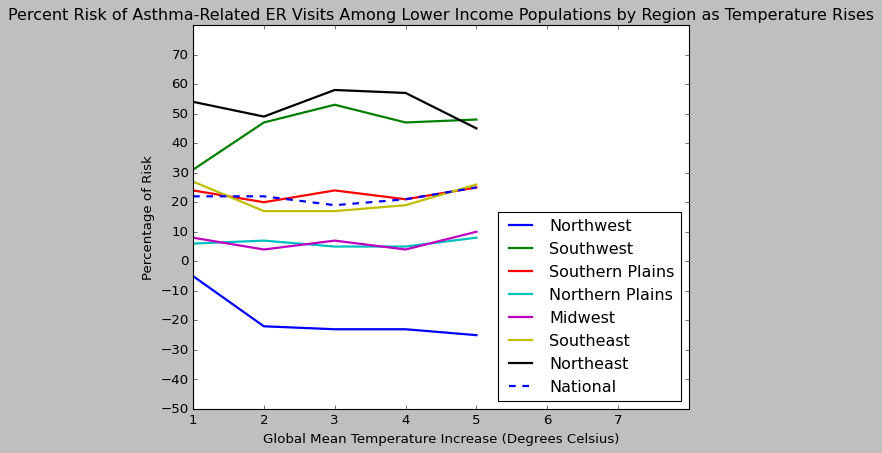

In [ ]:
# making the plot of all y's against the same x 
fig, ax = plt.subplots()

ax.plot(x, a1i_y1, linewidth = 2.0)
ax.plot(x, a1i_y2, linewidth = 2.0)
ax.plot(x, a1i_y3, linewidth = 2.0)
ax.plot(x, a1i_y4, linewidth = 2.0)
ax.plot(x, a1i_y5, linewidth = 2.0)
ax.plot(x, a1i_y6, linewidth = 2.0)
ax.plot(x, a1i_y7, linewidth = 2.0) 
ax.plot(x, a1i_y8, '--', linewidth = 2.0)

plt.title("Percent Risk of Asthma-Related ER Visits Among Lower Income Populations by Region as Temperature Rises")
ax.legend(['Northwest', 'Southwest', 'Southern Plains', 'Northern Plains', 'Midwest', 'Southeast', 'Northeast', 'National'], loc = 'lower right')
plt.xlabel("Global Mean Temperature Increase (Degrees Celsius)")
plt.ylabel("Percentage of Risk")

ax.set(xlim=(1, 8), xticks=np.arange(1, 8),
       ylim=(-50, 80), yticks=np.arange(-50, 80, 10))

plt.show()

##### Asthma (T) - Low Income by Region Visualization

In [ ]:
a2_income = aq_atr[aq_atr['Social Vulnerability'] == 'Lower income']
a2_income.columns = ['Region', 'SV', '1 deg', '2 deg', '3 deg', '4 deg', '5 deg']
a2_income = a2_income.drop('SV', axis = 1)

In [ ]:
#Setting up y1, Northwest Region Data
a2i_y1 = a2_income[a2_income ['Region'] == 'Northwest']
a2i_y1 = a2i_y1.values
a2i_y1 = a2i_y1.tolist()
a2i_y1 = a2i_y1[0][1:]

In [ ]:
#Setting up y2, Southwest Region Data
a2i_y2 = a2_income[a2_income ['Region'] == 'Southwest']
a2i_y2 = a2i_y2.values
a2i_y2 = a2i_y2.tolist()
a2i_y2 = a2i_y2[0][1:]

In [ ]:
#Setting up y3, Southern Plains Region Data
a2i_y3 = a2_income[a2_income['Region'] == 'Southern Plains']
a2i_y3 = a2i_y3.values
a2i_y3 = a2i_y3.tolist()
a2i_y3 = a2i_y3[0][1:]

In [ ]:
#Setting up y4, Northern Plains Region Data
a2i_y4 = a2_income[a2_income ['Region'] == 'Northern Plains']
a2i_y4 = a2i_y4.values
a2i_y4 = a2i_y4.tolist()
a2i_y4 = a2i_y4[0][1:]

In [ ]:
#Setting up y5, Midwest Region Data
a2i_y5 = a2_income[a2_income ['Region'] == 'Midwest']
a2i_y5 = a2i_y5.values
a2i_y5 = a2i_y5.tolist()
a2i_y5 = a2i_y5[0][1:]

In [ ]:
#Setting up y6, Southeast Region Data
a2i_y6 = a2_income[a2_income ['Region'] == 'Southeast']
a2i_y6 = a2i_y6.values
a2i_y6 = a2i_y6.tolist()
a2i_y6 = a2i_y6[0][1:]

In [ ]:
#Setting up y7, Northeast Region Data
a2i_y7 = a2_income[a2_income ['Region'] == 'Northeast']
a2i_y7 = a2i_y7.values
a2i_y7 = a2i_y7.tolist()
a2i_y7 = a2i_y7[0][1:]

In [ ]:
#Setting up y8, National Data
a2i_y8 = a2_income[a2_income ['Region'] == 'NATIONAL']
a2i_y8 = a2i_y8.values
a2i_y8 = a2i_y8.tolist()
a2i_y8 = a2i_y8[0][1:]

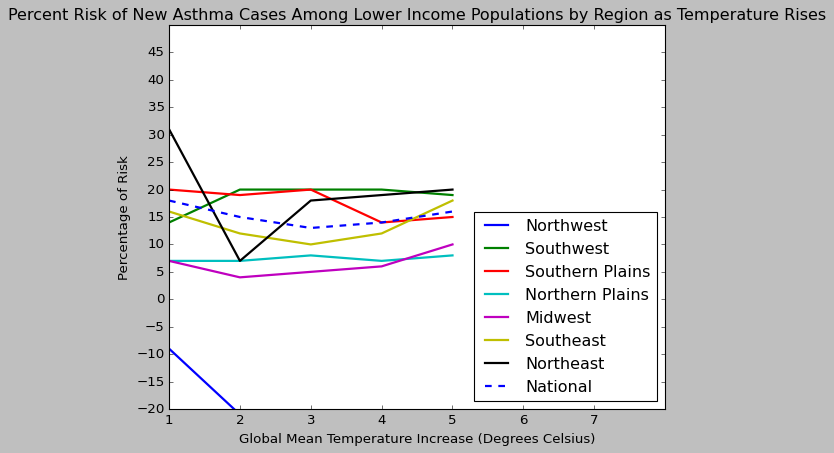

In [ ]:
# making the plot of all y's against the same x 
fig, ax = plt.subplots()

ax.plot(x, a2i_y1, linewidth = 2.0)
ax.plot(x, a2i_y2, linewidth = 2.0)
ax.plot(x, a2i_y3, linewidth = 2.0)
ax.plot(x, a2i_y4, linewidth = 2.0)
ax.plot(x, a2i_y5, linewidth = 2.0)
ax.plot(x, a2i_y6, linewidth = 2.0)
ax.plot(x, a2i_y7, linewidth = 2.0) 
ax.plot(x, a2i_y8, '--', linewidth = 2.0)

plt.title("Percent Risk of New Asthma Cases Among Lower Income Populations by Region as Temperature Rises")
ax.legend(['Northwest', 'Southwest', 'Southern Plains', 'Northern Plains', 'Midwest', 'Southeast', 'Northeast', 'National'], loc = 'lower right')
plt.xlabel("Global Mean Temperature Increase (Degrees Celsius)")
plt.ylabel("Percentage of Risk")

ax.set(xlim=(1, 8), xticks=np.arange(1, 8),
       ylim=(-20, 50), yticks=np.arange(-20, 50, 5))

plt.show()

##### Mortality (Di) - Low Income by Region Visualization

In [ ]:
m1_inc = aq_mpr[aq_mpr['Social Vulnerability'] == 'Lower income']
m1_inc.columns = ['Region', 'SV', '1 deg', '2 deg', '3 deg', '4 deg', '5 deg']
m1_inc = m1_inc.drop('SV', axis = 1)

In [ ]:
m1_inc['1 deg'] = m1_inc['1 deg'].str.rstrip('%').astype('float') 
m1_inc['2 deg'] = m1_inc['2 deg'].str.rstrip('%').astype('float')
m1_inc['3 deg'] = m1_inc['3 deg'].str.rstrip('%').astype('float')  
m1_inc['4 deg'] = m1_inc['4 deg'].str.rstrip('%').astype('float') 
m1_inc['5 deg'] = m1_inc['5 deg'].str.rstrip('%').astype('float') 

AttributeError: ignored

In [ ]:
#Setting up y1, Northwest Region Data
m1i_y1 = m1_inc[m1_inc ['Region'] == 'Northwest']
m1i_y1 = m1i_y1.values
m1i_y1 = m1i_y1.tolist()
m1i_y1 = m1i_y1[0][1:]

In [ ]:
#Setting up y2, Southwest Region Data
m1i_y2 = m1_inc[m1_inc ['Region'] == 'Southwest']
m1i_y2 = m1i_y2.values
m1i_y2 = m1i_y2.tolist()
m1i_y2 = m1i_y2[0][1:]

In [ ]:
#Setting up y3, Southern Plains Region Data
m1i_y3 = m1_inc[m1_inc ['Region'] == 'Southern Plains']
m1i_y3 = m1i_y3.values
m1i_y3 = m1i_y3.tolist()
m1i_y3 = m1i_y3[0][1:]

In [ ]:
#Setting up y4, Northern Plains Region Data
m1i_y4 = m1_inc[m1_inc ['Region'] == 'Northern Plains']
m1i_y4 = m1i_y4.values
m1i_y4 = m1i_y4.tolist()
m1i_y4 = m1i_y4[0][1:]

In [ ]:
#Setting up y5, Midwest Region Data
m1i_y5 = m1_inc[m1_inc ['Region'] == 'Midwest']
m1i_y5 = m1i_y5.values
m1i_y5 = m1i_y5.tolist()
m1i_y5 = m1i_y5[0][1:]

In [ ]:
#Setting up y6, Southeast Region Data
m1i_y6 = m1_inc[m1_inc ['Region'] == 'Southeast']
m1i_y6 = m1i_y6.values
m1i_y6 = m1i_y6.tolist()
m1i_y6 = m1i_y6[0][1:]

In [ ]:
#Setting up y7, Northeast Region Data
m1i_y7 = m1_inc[m1_inc ['Region'] == 'Northeast']
m1i_y7 = m1i_y7.values
m1i_y7 = m1i_y7.tolist()
m1i_y7 = m1i_y7[0][1:]

In [ ]:
#Setting up y8, National Data
m1i_y8 = m1_inc[m1_inc ['Region'] == 'NATIONAL']
m1i_y8 = m1i_y8.values
m1i_y8 = m1i_y8.tolist()
m1i_y8 = m1i_y8[0][1:]

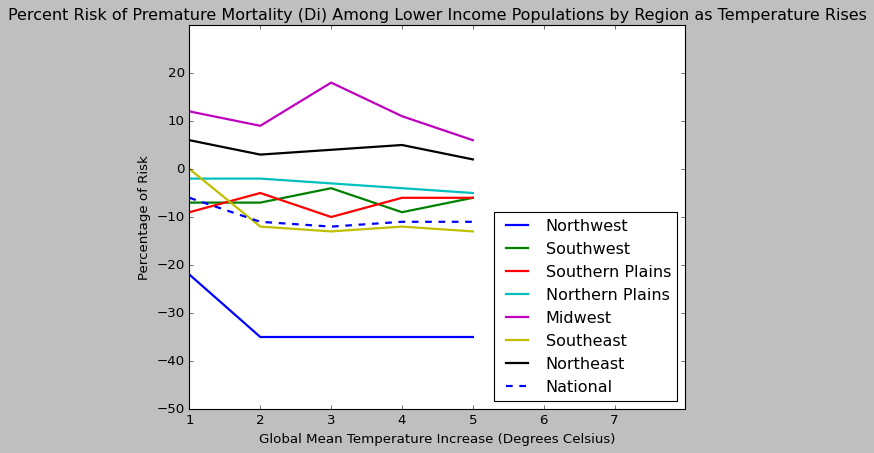

In [ ]:
# making the plot of all y's against the same x 
fig, ax = plt.subplots()

ax.plot(x, m1i_y1, linewidth = 2.0)
ax.plot(x, m1i_y2, linewidth = 2.0)
ax.plot(x, m1i_y3, linewidth = 2.0)
ax.plot(x, m1i_y4, linewidth = 2.0)
ax.plot(x, m1i_y5, linewidth = 2.0)
ax.plot(x, m1i_y6, linewidth = 2.0)
ax.plot(x, m1i_y7, linewidth = 2.0) 
ax.plot(x, m1i_y8, '--', linewidth = 2.0)

plt.title("Percent Risk of Premature Mortality (Di) Among Lower Income Populations by Region as Temperature Rises")
ax.legend(['Northwest', 'Southwest', 'Southern Plains', 'Northern Plains', 'Midwest', 'Southeast', 'Northeast', 'National'], loc = 'lower right')
plt.xlabel("Global Mean Temperature Increase (Degrees Celsius)")
plt.ylabel("Percentage of Risk")

ax.set(xlim=(1, 8), xticks=np.arange(1, 8),
       ylim=(-50, 30), yticks=np.arange(-50, 30, 10))

plt.show()

##### Mortality (Z) - Low Income by Region Visualization

In [ ]:
m2_inc = aq_mzr[aq_mzr['Social Vulnerability'] == 'Lower income']
m2_inc.columns = ['Region', 'SV', '1 deg', '2 deg', '3 deg', '4 deg', '5 deg']
m2_inc = m2_inc.drop('SV', axis = 1)

In [ ]:
m2_inc['1 deg'] = m2_inc['1 deg'].str.rstrip('%').astype('float') 
m2_inc['2 deg'] = m2_inc['2 deg'].str.rstrip('%').astype('float')
m2_inc['3 deg'] = m2_inc['3 deg'].str.rstrip('%').astype('float')  
m2_inc['4 deg'] = m2_inc['4 deg'].str.rstrip('%').astype('float') 
m2_inc['5 deg'] = m2_inc['5 deg'].str.rstrip('%').astype('float') 

In [ ]:
#Setting up y1, Northwest Region Data
m2i_y1 = m2_inc[m2_inc ['Region'] == 'Northwest']
m2i_y1 = m2i_y1.values
m2i_y1 = m2i_y1.tolist()
m2i_y1 = m2i_y1[0][1:]
 
#Setting up y2, Southwest Region Data
m2i_y2 = m2_inc[m2_inc ['Region'] == 'Southwest']
m2i_y2 = m2i_y2.values
m2i_y2 = m2i_y2.tolist()
m2i_y2 = m2i_y2[0][1:]
 
#Setting up y3, Southern Plains Region Data
m2i_y3 = m2_inc[m2_inc ['Region'] == 'Southern Plains']
m2i_y3 = m2i_y3.values
m2i_y3 = m2i_y3.tolist()
m2i_y3 = m2i_y3[0][1:]
 
#Setting up y4, Northern Plains Region Data
m2i_y4 = m2_inc[m2_inc ['Region'] == 'Northern Plains']
m2i_y4 = m2i_y4.values
m2i_y4 = m2i_y4.tolist()
m2i_y4 = m2i_y4[0][1:]
 
#Setting up y5, Midwest Region Data
m2i_y5 = m2_inc[m2_inc ['Region'] == 'Midwest']
m2i_y5 = m2i_y5.values
m2i_y5 = m2i_y5.tolist()
m2i_y5 = m2i_y5[0][1:]
 
#Setting up y6, Southeast Region Data
m2i_y6 = m2_inc[m2_inc ['Region'] == 'Southeast']
m2i_y6 = m2i_y6.values
m2i_y6 = m2i_y6.tolist()
m2i_y6 = m2i_y6[0][1:]
 
#Setting up y7, Northeast Region Data
m2i_y7 = m2_inc[m2_inc ['Region'] == 'Northeast']
m2i_y7 = m2i_y7.values
m2i_y7 = m2i_y7.tolist()
m2i_y7 = m2i_y7[0][1:]
 
#Setting up y8, National Data
m2i_y8 = m2_inc[m2_inc ['Region'] == 'NATIONAL']
m2i_y8 = m2i_y8.values
m2i_y8 = m2i_y8.tolist()
m2i_y8 = m2i_y8[0][1:]

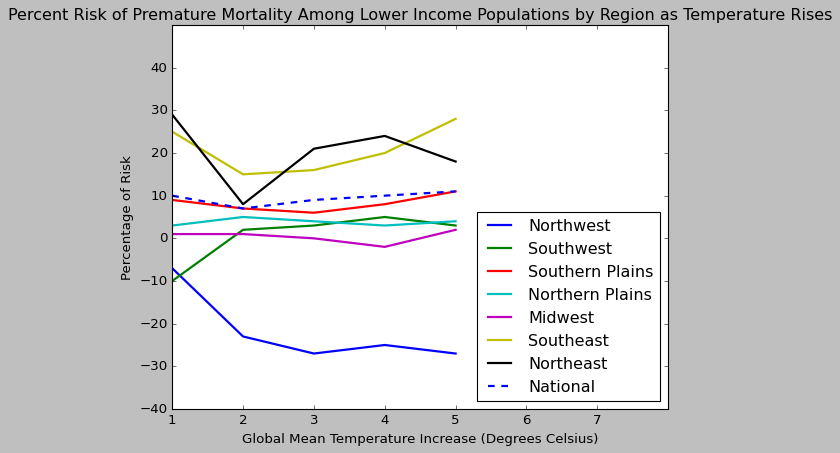

In [ ]:
# making the plot of all y's against the same x 
fig, ax = plt.subplots()

ax.plot(x, m2i_y1, linewidth = 2.0)
ax.plot(x, m2i_y2, linewidth = 2.0)
ax.plot(x, m2i_y3, linewidth = 2.0)
ax.plot(x, m2i_y4, linewidth = 2.0)
ax.plot(x, m2i_y5, linewidth = 2.0)
ax.plot(x, m2i_y6, linewidth = 2.0)
ax.plot(x, m2i_y7, linewidth = 2.0) 
ax.plot(x, m2i_y8, '--', linewidth = 2.0)

plt.title("Percent Risk of Premature Mortality Among Lower Income Populations by Region as Temperature Rises")
ax.legend(['Northwest', 'Southwest', 'Southern Plains', 'Northern Plains', 'Midwest', 'Southeast', 'Northeast', 'National'], loc = 'lower right')
plt.xlabel("Global Mean Temperature Increase (Degrees Celsius)")
plt.ylabel("Percentage of Risk")

ax.set(xlim=(1, 8), xticks=np.arange(1, 8),
       ylim=(-40, 50), yticks=np.arange(-40, 50, 10))

plt.show()

##### Weather Delays (Temp & Prec) - Low Income by Region Visualization

In [ ]:
w1_inc = wnd_wdr[wnd_wdr['Social Vulnerability'] == 'Low Income']
w1_inc.columns = ['Region', 'SV', '1 deg', '2 deg', '3 deg', '4 deg', '5 deg']
w1_inc = w1_inc.drop('SV', axis = 1)
 
w1_inc['1 deg'] = w1_inc['1 deg'].str.rstrip('%').astype('float') 
w1_inc['2 deg'] = w1_inc['2 deg'].str.rstrip('%').astype('float')
w1_inc['3 deg'] = w1_inc['3 deg'].str.rstrip('%').astype('float')  
w1_inc['4 deg'] = w1_inc['4 deg'].str.rstrip('%').astype('float') 
w1_inc['5 deg'] = w1_inc['5 deg'].str.rstrip('%').astype('float') 

In [ ]:
w1_inc

,Region,1 deg,2 deg,3 deg,4 deg,5 deg
24,Northwest,-1.0,0.0,1.0,2.0,4.0
25,Southwest,0.0,-9.0,-17.0,-19.0,-21.0
26,Southern Plains,-6.0,-3.0,-4.0,-4.0,-4.0
27,Northern Plains,-11.0,-5.0,-6.0,-6.0,-6.0
28,Midwest,-9.0,-17.0,-17.0,-16.0,-16.0
29,Southeast,-1.0,0.0,0.0,1.0,1.0
30,Northeast,-15.0,-23.0,-24.0,-26.0,-27.0
31,NATIONAL,-6.0,-11.0,-11.0,-13.0,-13.0


In [ ]:
#Setting up y1, Northwest Region Data
w1i_y1 = w1_inc[w1_inc ['Region'] == 'Northwest']
w1i_y1 = w1i_y1.values
w1i_y1 = w1i_y1.tolist()
w1i_y1 = w1i_y1[0][1:]
 
#Setting up y2, Southwest Region Data
w1i_y2 = w1_inc[w1_inc ['Region'] == 'Southwest']
w1i_y2 = w1i_y2.values
w1i_y2 = w1i_y2.tolist()
w1i_y2 = w1i_y2[0][1:]
 
#Setting up y3, Southern Plains Region Data
w1i_y3 = w1_inc[w1_inc ['Region'] == 'Southern Plains']
w1i_y3 = w1i_y3.values
w1i_y3 = w1i_y3.tolist()
w1i_y3 = w1i_y3[0][1:]
 
#Setting up y4, Northern Plains Region Data
w1i_y4 = w1_inc[w1_inc ['Region'] == 'Northern Plains']
w1i_y4 = w1i_y4.values
w1i_y4 = w1i_y4.tolist()
w1i_y4 = w1i_y4[0][1:]
 
#Setting up y5, Midwest Region Data
w1i_y5 = w1_inc[w1_inc ['Region'] == 'Midwest']
w1i_y5 = w1i_y5.values
w1i_y5 = w1i_y5.tolist()
w1i_y5 = w1i_y5[0][1:]
 
#Setting up y6, Southeast Region Data
w1i_y6 = w1_inc[w1_inc ['Region'] == 'Southeast']
w1i_y6 = w1i_y6.values
w1i_y6 = w1i_y6.tolist()
w1i_y6 = w1i_y6[0][1:]
 
#Setting up y7, Northeast Region Data
w1i_y7 = w1_inc[w1_inc ['Region'] == 'Northeast']
w1i_y7 = w1i_y7.values
w1i_y7 = w1i_y7.tolist()
w1i_y7 = w1i_y7[0][1:]
 
#Setting up y8, National Data
w1i_y8 = w1_inc[w1_inc ['Region'] == 'NATIONAL']
w1i_y8 = w1i_y8.values
w1i_y8 = w1i_y8.tolist()
w1i_y8 = w1i_y8[0][1:]


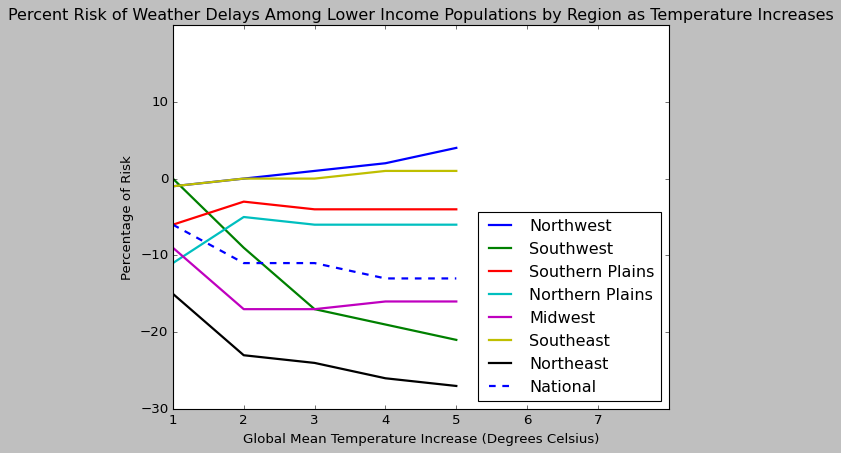

In [ ]:
# making the plot of all y's against the same x 
fig, ax = plt.subplots()

ax.plot(x, w1i_y1, linewidth = 2.0)
ax.plot(x, w1i_y2, linewidth = 2.0)
ax.plot(x, w1i_y3, linewidth = 2.0)
ax.plot(x, w1i_y4, linewidth = 2.0)
ax.plot(x, w1i_y5, linewidth = 2.0)
ax.plot(x, w1i_y6, linewidth = 2.0)
ax.plot(x, w1i_y7, linewidth = 2.0) 
ax.plot(x, w1i_y8, '--', linewidth = 2.0)

plt.title("Percent Risk of Weather Delays Among Lower Income Populations by Region as Temperature Increases")
ax.legend(['Northwest', 'Southwest', 'Southern Plains', 'Northern Plains', 'Midwest', 'Southeast', 'Northeast', 'National'], loc = 'lower right')
plt.xlabel("Global Mean Temperature Increase (Degrees Celsius)")
plt.ylabel("Percentage of Risk")

ax.set(xlim=(1, 8), xticks=np.arange(1, 8),
       ylim=(-30, 20), yticks=np.arange(-30, 20, 10))

plt.show()

##### Weather Delays (HTF) - Lower Income by Region Visualization

In [ ]:
w2_inc = wnd_htr[wnd_htr['Social Vulnerability'] == 'Low Income']
w2_inc.columns = ['Region', 'SV', '25 cm', '50 cm', '75 cm', '100 cm', '125 cm', '150 cm']
w2_inc = w2_inc.drop('SV', axis = 1)
 
w2_inc['25 cm'] = w2_inc['25 cm'].str.rstrip('%').astype('float') 
w2_inc['50 cm'] = w2_inc['50 cm'].str.rstrip('%').astype('float')
w2_inc['75 cm'] = w2_inc['75 cm'].str.rstrip('%').astype('float')  
w2_inc['100 cm'] = w2_inc['100 cm'].str.rstrip('%').astype('float') 
w2_inc['125 cm'] = w2_inc['125 cm'].str.rstrip('%').astype('float') 
w2_inc['150 cm'] = w2_inc['150 cm'].str.rstrip('%').astype('float')

AttributeError: ignored

In [ ]:
# new x in cm
x2 = [25, 50, 75, 100, 125, 150]

In [ ]:
#Setting up y1, Southwest Region Data
w2i_y1 = w2_inc[w2_inc ['Region'] == 'Southwest']
w2i_y1 = w2i_y1.values
w2i_y1 = w2i_y1.tolist()
w2i_y1 = w2i_y1[0][1:]
 
#Setting up y2, Northwest Region Data
w2i_y2 = w2_inc[w2_inc ['Region'] == 'Northwest']
w2i_y2 = w2i_y2.values
w2i_y2 = w2i_y2.tolist()
w2i_y2 = w2i_y2[0][1:]
 
#Setting up y3, Southern Plains Region Data
w2i_y3 = w2_inc[w2_inc ['Region'] == 'Southern Plains']
w2i_y3 = w2i_y3.values
w2i_y3 = w2i_y3.tolist()
w2i_y3 = w2i_y3[0][1:]
 
#Setting up y4, Southeast - Gulf Region Data
w2i_y4 = w2_inc[w2_inc ['Region'] == 'Southeast - Gulf']
w2i_y4 = w2i_y4.values
w2i_y4 = w2i_y4.tolist()
w2i_y4 = w2i_y4[0][1:]
 
#Setting up y5, Southeast - Atlantic Region Data
w2i_y5 = w2_inc[w2_inc ['Region'] == 'Southeast - Atlantic']
w2i_y5 = w2i_y5.values
w2i_y5 = w2i_y5.tolist()
w2i_y5 = w2i_y5[0][1:]
 
#Setting up y6, Northeast Region Data
w2i_y6 = w2_inc[w2_inc ['Region'] == 'Northeast']
w2i_y6 = w2i_y6.values
w2i_y6 = w2i_y6.tolist()
w2i_y6 = w2i_y6[0][1:]
 
#Setting up y7, National Data
w2i_y7 = w2_inc[w2_inc ['Region'] == 'NATIONAL']
w2i_y7 = w2i_y7.values
w2i_y7 = w2i_y7.tolist()
w2i_y7 = w2i_y7[0][1:]

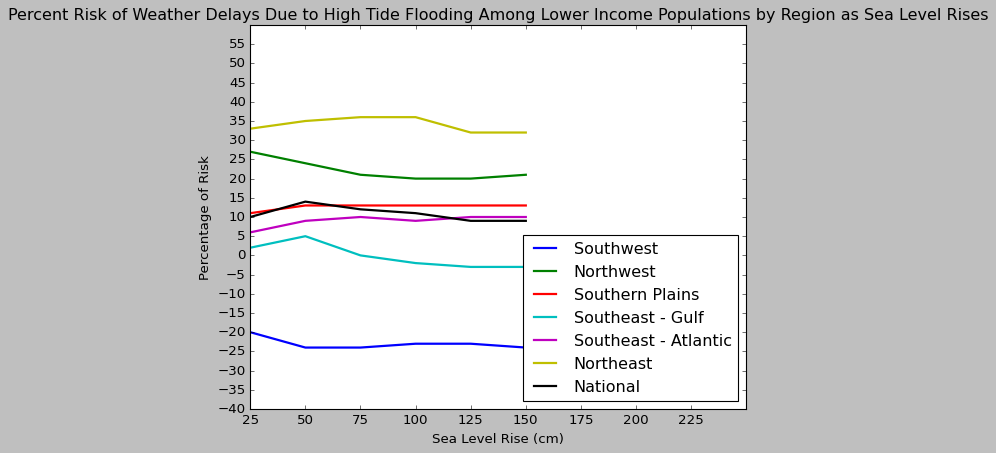

In [ ]:
# making the plot of all y's against the same x 
fig, ax = plt.subplots()

ax.plot(x2, w2i_y1, linewidth = 2.0)
ax.plot(x2, w2i_y2, linewidth = 2.0)
ax.plot(x2, w2i_y3, linewidth = 2.0)
ax.plot(x2, w2i_y4, linewidth = 2.0)
ax.plot(x2, w2i_y5, linewidth = 2.0)
ax.plot(x2, w2i_y6, linewidth = 2.0)
ax.plot(x2, w2i_y7, linewidth = 2.0) 

plt.title("Percent Risk of Weather Delays Due to High Tide Flooding Among Lower Income Populations by Region as Sea Level Rises")
ax.legend(['Southwest', 'Northwest', 'Southern Plains', 'Southeast - Gulf', 'Southeast - Atlantic', 'Northeast', 'National'], loc = 'lower right')
plt.xlabel("Sea Level Rise (cm)")
plt.ylabel("Percentage of Risk")

ax.set(xlim=(25, 250), xticks=np.arange(25, 250, 25),
       ylim=(-40, 60), yticks=np.arange(-40, 60, 5))

plt.show()

##### Labor Hours - Low Income by Region Visualization

In [ ]:
l1i = lhr[lhr['Social Vulnerability'] == 'Low Income']
l1i.columns = ['Region', 'SV', '1 deg', '2 deg', '3 deg', '4 deg', '5 deg']
l1i = l1i.drop('SV', axis = 1)

l1i['1 deg'] = l1i['1 deg'].str.rstrip('%').astype('float') 
l1i['2 deg'] = l1i['2 deg'].str.rstrip('%').astype('float')
l1i['3 deg'] = l1i['3 deg'].str.rstrip('%').astype('float')  
l1i['4 deg'] = l1i['4 deg'].str.rstrip('%').astype('float') 
l1i['5 deg'] = l1i['5 deg'].str.rstrip('%').astype('float') 


AttributeError: ignored

In [ ]:
#Setting up y1, Northwest Region Data
l1i_y1 = l1i[l1i ['Region'] == 'Northwest']
l1i_y1 = l1i_y1.values
l1i_y1 = l1i_y1.tolist()
l1i_y1 = l1i_y1[0][1:]
 
#Setting up y2, Southwest Region Data
l1i_y2 = l1i[l1i ['Region'] == 'Southwest']
l1i_y2 = l1i_y2.values
l1i_y2 = l1i_y2.tolist()
l1i_y2 = l1i_y2[0][1:]
 
#Setting up y3, Southern Plains Region Data
l1i_y3 = l1i[l1i ['Region'] == 'Southern Plains']
l1i_y3 = l1i_y3.values
l1i_y3 = l1i_y3.tolist()
l1i_y3 = l1i_y3[0][1:]
 
#Setting up y4, Northern Plains Region Data
l1i_y4 = l1i[l1i ['Region'] == 'Northern Plains']
l1i_y4 = l1i_y4.values
l1i_y4 = l1i_y4.tolist()
l1i_y4 = l1i_y4[0][1:]
 
#Setting up y5, Midwest Region Data
l1i_y5 = l1i[l1i ['Region'] == 'Midwest']
l1i_y5 = l1i_y5.values
l1i_y5 = l1i_y5.tolist()
l1i_y5 = l1i_y5[0][1:]
 
#Setting up y6, Southeast Region Data
l1i_y6 = l1i[l1i ['Region'] == 'Southeast']
l1i_y6 = l1i_y6.values
l1i_y6 = l1i_y6.tolist()
l1i_y6 = l1i_y6[0][1:]
 
#Setting up y7, Northeast Region Data
l1i_y7 = l1i[l1i ['Region'] == 'Northeast']
l1i_y7 = l1i_y7.values
l1i_y7 = l1i_y7.tolist()
l1i_y7 = l1i_y7[0][1:]
 
#Setting up y8, National Data
l1i_y8 = l1i[l1i ['Region'] == 'NATIONAL']
l1i_y8 = l1i_y8.values
l1i_y8 = l1i_y8.tolist()
l1i_y8 = l1i_y8[0][1:]

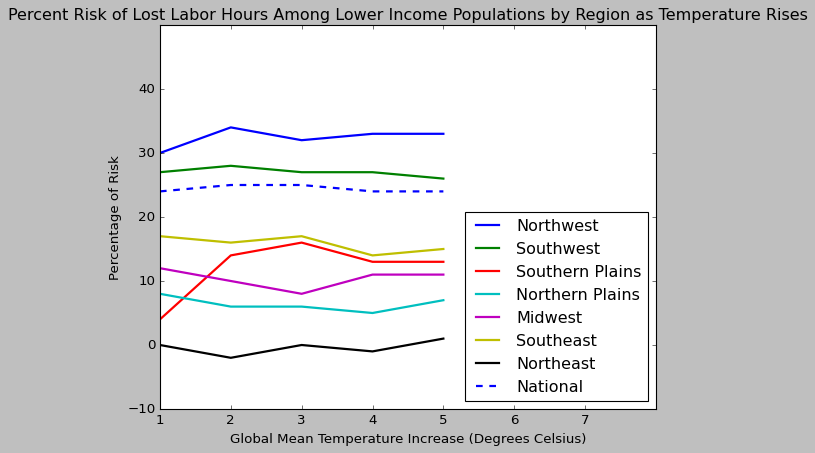

In [ ]:
# making the plot of all y's against the same x 
fig, ax = plt.subplots()

ax.plot(x, l1i_y1, linewidth = 2.0)
ax.plot(x, l1i_y2, linewidth = 2.0)
ax.plot(x, l1i_y3, linewidth = 2.0)
ax.plot(x, l1i_y4, linewidth = 2.0)
ax.plot(x, l1i_y5, linewidth = 2.0)
ax.plot(x, l1i_y6, linewidth = 2.0)
ax.plot(x, l1i_y7, linewidth = 2.0) 
ax.plot(x, l1i_y8, '--', linewidth = 2.0)


plt.title("Percent Risk of Lost Labor Hours Among Lower Income Populations by Region as Temperature Rises")
ax.legend(['Northwest', 'Southwest', 'Southern Plains', 'Northern Plains', 'Midwest', 'Southeast', 'Northeast', 'National'], loc = 'lower right')
plt.xlabel("Global Mean Temperature Increase (Degrees Celsius)")
plt.ylabel("Percentage of Risk")

ax.set(xlim=(1, 8), xticks=np.arange(1, 8),
       ylim=(-10, 50), yticks=np.arange(-10, 50, 10))

plt.show()

##### Property Damage - Low Income by Region Visualization

In [ ]:
p1_inc = pnf_pir[pnf_pir['Social Vulnerability'] == 'Low Income']
p1_inc.columns = ['Region', 'SV', '25 cm', '50 cm', '75 cm', '100 cm', '125 cm', '150 cm']
p1_inc = p1_inc.drop('SV', axis = 1)
 
p1_inc['25 cm'] = p1_inc['25 cm'].str.rstrip('%').astype('float') 
p1_inc['50 cm'] = p1_inc['50 cm'].str.rstrip('%').astype('float')
p1_inc['75 cm'] = p1_inc['75 cm'].str.rstrip('%').astype('float')  
p1_inc['100 cm'] = p1_inc['100 cm'].str.rstrip('%').astype('float') 
p1_inc['125 cm'] = p1_inc['125 cm'].str.rstrip('%').astype('float') 
p1_inc['150 cm'] = p1_inc['150 cm'].str.rstrip('%').astype('float') 

In [ ]:
#Setting up y1, Southwest Region Data
p1i_y1 = p1_inc[p1_inc ['Region'] == 'Southwest']
p1i_y1 = p1i_y1.values
p1i_y1 = p1i_y1.tolist()
p1i_y1 = p1i_y1[0][1:]
 
#Setting up y2, Northwest Region Data
p1i_y2 = p1_inc[p1_inc ['Region'] == 'Northwest']
p1i_y2 = p1i_y2.values
p1i_y2 = p1i_y2.tolist()
p1i_y2 = p1i_y2[0][1:]
 
#Setting up y3, Southern Plains Region Data
p1i_y3 = p1_inc[p1_inc ['Region'] == 'Southern Great Plains']
p1i_y3 = p1i_y3.values
p1i_y3 = p1i_y3.tolist()
p1i_y3 = p1i_y3[0][1:]
 
#Setting up y4, Southeast - Gulf Region Data
 
p1i_y4 = p1_inc[p1_inc ['Region'] == 'Southeast - Gulf']
p1i_y4 = p1i_y4.values
p1i_y4 = p1i_y4.tolist()
p1i_y4 = p1i_y4[0][1:]
 
#Setting up y5, Southeast - Atlantic Region Data
p1i_y5 = p1_inc[p1_inc ['Region'] == 'Southeast - Atlantic']
p1i_y5 = p1i_y5.values
p1i_y5 = p1i_y5.tolist()
p1i_y5 = p1i_y5[0][1:]
 
#Setting up y6, Northeast Region Data
p1i_y6 = p1_inc[p1_inc ['Region'] == 'Northeast']
p1i_y6 = p1i_y6.values
p1i_y6 = p1i_y6.tolist()
p1i_y6 = p1i_y6[0][1:]
 
#Setting up y7, National Data
p1i_y7 = p1_inc[p1_inc ['Region'] == 'NATIONAL']
p1i_y7 = p1i_y7.values
p1i_y7 = p1i_y7.tolist()
p1i_y7 = p1i_y7[0][1:]


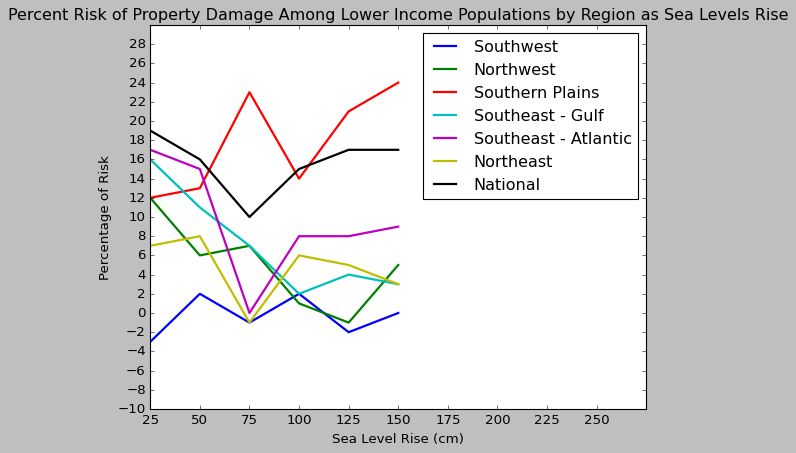

In [ ]:
# making the plot of all y's against the same x 
fig, ax = plt.subplots()
 
ax.plot(x2, p1i_y1, linewidth = 2.0)
ax.plot(x2, p1i_y2, linewidth = 2.0)
ax.plot(x2, p1i_y3, linewidth = 2.0)
ax.plot(x2, p1i_y4, linewidth = 2.0)
ax.plot(x2, p1i_y5, linewidth = 2.0)
ax.plot(x2, p1i_y6, linewidth = 2.0)
ax.plot(x2, p1i_y7, linewidth = 2.0) 
 
plt.title("Percent Risk of Property Damage Among Lower Income Populations by Region as Sea Levels Rise")
ax.legend(['Southwest', 'Northwest', 'Southern Plains', 'Southeast - Gulf', 'Southeast - Atlantic', 'Northeast', 'National'], loc = 'upper right')
plt.xlabel("Sea Level Rise (cm)")
plt.ylabel("Percentage of Risk")
 
ax.set(xlim=(25, 275), xticks=np.arange(25, 275, 25),
       ylim=(-10, 30), yticks=np.arange(-10, 30, 2))
 
plt.show()

## 6. Statistical Analysis

#### Minority Populations

* Null Hypothesis: There is no correlation between race and climate change affects. 
* Alternate Hypothesis: There is a correlation between race and climate change affects. 

##### Asthma (A) - Minorities Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
aar_lr = aq_aar[aq_aar['Region'] == 'NATIONAL']

In [ ]:
aar_lr['Social Vulnerability'] = aar_lr['Social Vulnerability'].replace('Minority', 1)
aar_lr['Social Vulnerability'] = aar_lr['Social Vulnerability'].replace('Lower income', 0)
aar_lr['Social Vulnerability'] = aar_lr['Social Vulnerability'].replace('No High School Diploma', 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
aar_lr['1 deg'] = aar_lr['1 deg'].str.rstrip('%').astype('float') 
aar_lr['2 deg'] = aar_lr['2 deg'].str.rstrip('%').astype('float')
aar_lr['3 deg'] =  aar_lr['3 deg'].str.rstrip('%').astype('float')  
aar_lr['4 deg'] = aar_lr['4 deg'].str.rstrip('%').astype('float') 
aar_lr['5 deg'] = aar_lr['5 deg'].str.rstrip('%').astype('float') 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
aar_lr

,Region,Social Vulnerability,1 deg,2 deg,3 deg,4 deg,5 deg
7,NATIONAL,0,23.0,26.0,25.0,24.0,30.0
15,NATIONAL,1,57.0,58.0,59.0,53.0,55.0
23,NATIONAL,0,22.0,22.0,19.0,21.0,25.0


In [ ]:
lrX = aar_lr[['1 deg', '2 deg', '3 deg', '4 deg', '5 deg']]
lrY = aar_lr['Social Vulnerability']

In [ ]:
aar_lr_model = LogisticRegression().fit(lrX.values, lrY.values)

In [ ]:
aar_lr_model.coef_

array([[0.08493193, 0.08134857, 0.08724063, 0.07343361, 0.06442006]])

In [ ]:
aar_lr_model.intercept_

array([-16.14636721])

In [ ]:
aq_aar['1 deg'] = aq_aar['1 deg'].str.rstrip('%').astype('float') 
aq_aar['2 deg'] = aq_aar['2 deg'].str.rstrip('%').astype('float')
aq_aar['3 deg'] = aq_aar['3 deg'].str.rstrip('%').astype('float')  
aq_aar['4 deg'] = aq_aar['4 deg'].str.rstrip('%').astype('float') 
aq_aar['5 deg'] = aq_aar['5 deg'].str.rstrip('%').astype('float') 

In [ ]:
from numpy import correlate, corrcoef
aq_aar_nat = aq_aar[aq_aar['Region'] == 'NATIONAL']
data1 = aq_aar_nat[aq_aar_nat['Social Vulnerability'] == 'Minority'][["1 deg", "2 deg", "3 deg", "4 deg",	"5 deg"]].values[0]
data2 = aq_aar_nat[aq_aar_nat['Social Vulnerability'] == 'No High School Diploma'][["1 deg", "2 deg", "3 deg", "4 deg",	"5 deg"]].values[0]
#print(data1)
#print(data2)
correlate(data1, data2)

array([7216.])

In [ ]:
ols_model = sm.OLS(data1, data2).fit()
print(ols_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              354.6
Date:                Mon, 28 Nov 2022   Prob (F-statistic):                    4.68e-05
Time:                        19:50:21   Log-Likelihood:                         -16.021
No. Observations:                   5   AIC:                                      34.04
Df Residuals:                       4   BIC:                                      33.65
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


##### Asthma (T) - Minorities Logistic Regression

In [ ]:
atr_lr = aq_atr[aq_atr['Region'] == 'NATIONAL']

In [ ]:
atr_lr['Social Vulnerability'] = atr_lr['Social Vulnerability'].replace('Minority', 1)
atr_lr['Social Vulnerability'] = atr_lr['Social Vulnerability'].replace('Lower income', 0)
atr_lr['Social Vulnerability'] = atr_lr['Social Vulnerability'].replace('No High School Diploma', 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
lrX = atr_lr[['1 deg', '2 deg', '3 deg', '4 deg', '5 deg']]
lrY = atr_lr['Social Vulnerability']

In [ ]:
atr_lr_model = LogisticRegression().fit(lrX.values, lrY.values)

In [ ]:
atr_lr_model.coef_

array([[0.16389334, 0.23135038, 0.26057325, 0.13247873, 0.07184227]])

In [ ]:
atr_lr_model.intercept_

array([-17.51278586])

##### Mortality (Di) - Minorities Logistic Regression

In [ ]:
mpr_lr = aq_mpr[aq_mpr['Region'] == 'NATIONAL']

In [ ]:
mpr_lr['Social Vulnerability'] = mpr_lr['Social Vulnerability'].replace('Minority', 1)
mpr_lr['Social Vulnerability'] = mpr_lr['Social Vulnerability'].replace('Lower income', 0)
mpr_lr['Social Vulnerability'] = mpr_lr['Social Vulnerability'].replace('No High School Diploma', 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
mpr_lrX = mpr_lr[['1 deg', '2 deg', '3 deg', '4 deg', '5 deg']]
mpr_lrY = mpr_lr['Social Vulnerability']
mpr_lr_model = LogisticRegression().fit(lrX.values, lrY.values)
print(mpr_lr_model.coef_)
print(mpr_lr_model.intercept_)

[[0.16389334 0.23135038 0.26057325 0.13247873 0.07184227]]
[-17.51278586]


##### Mortality (Z) - Minorities Logistic Regression

In [ ]:
mzr_lr = aq_mzr[aq_mzr['Region'] == 'NATIONAL']
 
mzr_lr['Social Vulnerability'] = mzr_lr['Social Vulnerability'].replace('Minority', 1)
mzr_lr['Social Vulnerability'] = mzr_lr['Social Vulnerability'].replace('Lower income', 0)
mzr_lr['Social Vulnerability'] = mzr_lr['Social Vulnerability'].replace('No High School Diploma', 0)
 
mzr_lr['1 deg'] = mzr_lr['1 deg'].str.rstrip('%').astype('float') 
mzr_lr['2 deg'] = mzr_lr['2 deg'].str.rstrip('%').astype('float')
mzr_lr['3 deg'] = mzr_lr['3 deg'].str.rstrip('%').astype('float')  
mzr_lr['4 deg'] = mzr_lr['4 deg'].str.rstrip('%').astype('float') 
mzr_lr['5 deg'] = mzr_lr['5 deg'].str.rstrip('%').astype('float') 
 
mzr_lrX = mzr_lr[['1 deg', '2 deg', '3 deg', '4 deg', '5 deg']]
mzr_lrY = mzr_lr['Social Vulnerability']
mzr_lr_model = LogisticRegression().fit(mzr_lrX.values, mzr_lrY.values)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
mzr_lr_model.coef_

array([[-2.03849298e-01, -1.51383447e-01,  1.99738582e-05,
        -2.29734964e-01, -3.70496990e-01]])

In [ ]:
mzr_lr_model.intercept_

array([4.2386078])

##### Mortality(Z) - OLS Regression Analysis

In [ ]:
aq_mzr['1 deg'] = aq_mzr['1 deg'].str.rstrip('%').astype('float') 
aq_mzr['2 deg'] = aq_mzr['2 deg'].str.rstrip('%').astype('float')
aq_mzr['3 deg'] = aq_mzr['3 deg'].str.rstrip('%').astype('float')  
aq_mzr['4 deg'] = aq_mzr['4 deg'].str.rstrip('%').astype('float') 
aq_mzr['5 deg'] = aq_mzr['5 deg'].str.rstrip('%').astype('float') 
 

In [ ]:
aq_mzr_nat = aq_mzr[aq_mzr['Region'] == 'NATIONAL']
 
data1 = aq_mzr_nat[aq_mzr_nat['Social Vulnerability'] == 'Minority'][["1 deg", "2 deg", "3 deg", "4 deg", "5 deg"]].values[0]
data2 = aq_mzr_nat[aq_mzr_nat['Social Vulnerability'] == 'No High School Diploma'][["1 deg", "2 deg", "3 deg", "4 deg", "5 deg"]].values[0]

In [ ]:
ols_model = sm.OLS(data1, data2).fit()
print(ols_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.464
Model:                            OLS   Adj. R-squared (uncentered):              0.329
Method:                 Least Squares   F-statistic:                              3.456
Date:                Mon, 28 Nov 2022   Prob (F-statistic):                       0.137
Time:                        20:03:38   Log-Likelihood:                         -12.764
No. Observations:                   5   AIC:                                      27.53
Df Residuals:                       4   BIC:                                      27.14
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


##### Temperature Mortality - Minorities Logistic Regression

In [ ]:
tmr_lr = tmr

In [ ]:
tmr_lr['Social Vulnerability'] = tmr_lr['Social Vulnerability'].replace('Minority', 1)
tmr_lr['Social Vulnerability'] = tmr_lr['Social Vulnerability'].replace('Low Income', 0)
tmr_lr['Social Vulnerability'] = tmr_lr['Social Vulnerability'].replace('No High School Diploma', 0)
tmr_lr['Social Vulnerability'] = tmr_lr['Social Vulnerability'].replace('65 and Older', 0)

In [ ]:
tmr_lr['1 deg'] = tmr_lr['1 deg'].str.rstrip('%').astype('float') 
tmr_lr['2 deg'] = tmr_lr['2 deg'].str.rstrip('%').astype('float')
tmr_lr['3 deg'] = tmr_lr['3 deg'].str.rstrip('%').astype('float')  
tmr_lr['4 deg'] = tmr_lr['4 deg'].str.rstrip('%').astype('float') 
tmr_lr['5 deg'] = tmr_lr['5 deg'].str.rstrip('%').astype('float') 

In [ ]:
lhr_lrX = tmr_lr[['1 deg', '2 deg', '3 deg', '4 deg', '5 deg']]
lhr_lrY = tmr_lr['Social Vulnerability']
tmr_lr_model = LogisticRegression().fit(lhr_lrX.values, lhr_lrY.values)

In [ ]:
tmr_lr_model.coef_

array([[-0.25849893,  0.15296608,  0.22058927,  0.22058927, -0.23021294]])

In [ ]:
tmr_lr_model.intercept_

array([-8.24093423])

##### Weather Delays - Minorities - Logistic Regression

In [ ]:
wdr_lr = wnd_wdr[wnd_wdr['Region'] == 'NATIONAL']
 
wdr_lr['Social Vulnerability'] = wdr_lr['Social Vulnerability'].replace('Minority', 1)
wdr_lr['Social Vulnerability'] = wdr_lr['Social Vulnerability'].replace('Low Income', 0)
wdr_lr['Social Vulnerability'] = wdr_lr['Social Vulnerability'].replace('No High School Diploma', 0)
wdr_lr['Social Vulnerability'] = wdr_lr['Social Vulnerability'].replace('65 and Older', 0)
 
wdr_lr['1 deg'] = wdr_lr['1 deg'].str.rstrip('%').astype('float') 
wdr_lr['2 deg'] = wdr_lr['2 deg'].str.rstrip('%').astype('float')
wdr_lr['3 deg'] = wdr_lr['3 deg'].str.rstrip('%').astype('float')  
wdr_lr['4 deg'] = wdr_lr['4 deg'].str.rstrip('%').astype('float') 
wdr_lr['5 deg'] = wdr_lr['5 deg'].str.rstrip('%').astype('float') 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
wdr_lr

,Region,Social Vulnerability,1 deg,2 deg,3 deg,4 deg,5 deg
7,NATIONAL,0,11.0,15.0,14.0,16.0,16.0
15,NATIONAL,0,-11.0,-11.0,-6.0,-9.0,-9.0
23,NATIONAL,1,-45.0,-48.0,-39.0,-44.0,-43.0
31,NATIONAL,0,-6.0,-11.0,-11.0,-13.0,-13.0


In [ ]:
wdr_lrX = wdr_lr[['1 deg', '2 deg', '3 deg', '4 deg', '5 deg']]
wdr_lrY = wdr_lr['Social Vulnerability']
wdr_lr_model = LogisticRegression().fit(wdr_lrX.values, wdr_lrY.values)

In [ ]:
wdr_lr_model.coef_

array([[-0.08382521, -0.08354912, -0.06743396, -0.07338748, -0.07113752]])

In [ ]:
wdr_lr_model.intercept_

array([-10.60900635])

##### Weather Delays(HTF) - Minorities Logistic Regression

In [ ]:
htr_lr = wnd_htr[wnd_htr['Region'] == 'NATIONAL']
 
htr_lr['Social Vulnerability'] = htr_lr['Social Vulnerability'].replace('Minority', 1)
htr_lr['Social Vulnerability'] = htr_lr['Social Vulnerability'].replace('Low Income', 0)
htr_lr['Social Vulnerability'] = htr_lr['Social Vulnerability'].replace('No High School Diploma', 0)
htr_lr['Social Vulnerability'] = htr_lr['Social Vulnerability'].replace('65 and Older', 0)
 
 
htr_lrX = htr_lr[['25 cm', '50 cm', '75 cm', '100 cm', '125 cm', '150 cm']]
htr_lrY = htr_lr['Social Vulnerability']
htr_lr_model = LogisticRegression().fit(htr_lrX.values, htr_lrY.values)
 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
htr_lr_model.coef_

array([[0.02224971, 0.052328  , 0.07318905, 0.08545348, 0.07827299,
        0.07611594]])

In [ ]:
htr_lr_model.intercept_

array([-11.45696742])

##### Property Damage - Minority Logistic Regression

In [ ]:
pnf_pir_lr = pnf_pir[pnf_pir['Region'] == 'NATIONAL']

In [ ]:
pnf_pir_lr

,Region,Social Vulnerability,25 cm,50 cm,75 cm,100 cm,125 cm,150 cm
6,NATIONAL,Low Income,19%,16%,10%,15%,17%,17%
13,NATIONAL,Minority,-1%,-4%,30%,49%,61%,55%
20,NATIONAL,No High School Diploma,16%,18%,12%,16%,19%,18%
27,NATIONAL,65 and Older,-3%,-5%,-4%,-2%,-1%,-1%


In [ ]:
pnf_pir_lr['25 cm'] = pnf_pir_lr['25 cm'].str.rstrip('%').astype('float') 
pnf_pir_lr['50 cm'] = pnf_pir_lr['50 cm'].str.rstrip('%').astype('float')
pnf_pir_lr['75 cm'] = pnf_pir_lr['75 cm'].str.rstrip('%').astype('float')  
pnf_pir_lr['100 cm'] = pnf_pir_lr['100 cm'].str.rstrip('%').astype('float') 
pnf_pir_lr['125 cm'] = pnf_pir_lr['125 cm'].str.rstrip('%').astype('float') 
pnf_pir_lr['150 cm'] = pnf_pir_lr['150 cm'].str.rstrip('%').astype('float') 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
pnf_pir_lr['Social Vulnerability'] = pnf_pir_lr['Social Vulnerability'].replace('Minority', 1)
pnf_pir_lr['Social Vulnerability'] = pnf_pir_lr['Social Vulnerability'].replace('Low Income', 0)
pnf_pir_lr['Social Vulnerability'] = pnf_pir_lr['Social Vulnerability'].replace('No High School Diploma', 0)
pnf_pir_lr['Social Vulnerability'] = pnf_pir_lr['Social Vulnerability'].replace('65 and Older', 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
pnf_pir_lr

,Region,Social Vulnerability,25 cm,50 cm,75 cm,100 cm,125 cm,150 cm
6,NATIONAL,0,19.0,16.0,10.0,15.0,17.0,17.0
13,NATIONAL,1,-1.0,-4.0,30.0,49.0,61.0,55.0
20,NATIONAL,0,16.0,18.0,12.0,16.0,19.0,18.0
27,NATIONAL,0,-3.0,-5.0,-4.0,-2.0,-1.0,-1.0


In [ ]:
pnf_pir_lrX = pnf_pir_lr[['25 cm', '50 cm', '75 cm', '100 cm', '125 cm', '150 cm']]
pnf_pir_lrY = pnf_pir_lr['Social Vulnerability']
pnf_pir_lr_model = LogisticRegression().fit(pnf_pir_lrX.values, pnf_pir_lrY.values)

In [ ]:
pnf_pir_lr_model.coef_

array([[-0.04169032, -0.04876143,  0.04422473,  0.07831076,  0.10020702,
         0.0876424 ]])

In [ ]:
pnf_pir_lr_model.intercept_

array([-10.27450666])

##### Labor Hours - Minorities - Logistic Regression

In [ ]:
lhr_lr = lhr[lhr['Region'] == 'NATIONAL']

In [ ]:
# all SV values relating to race = 1
lhr_lr['Social Vulnerability'] = lhr_lr['Social Vulnerability'].replace('Minority', 1)
lhr_lr['Social Vulnerability'] = lhr_lr['Social Vulnerability'].replace('White, non-Hispanic', 1)
lhr_lr['Social Vulnerability'] = lhr_lr['Social Vulnerability'].replace('Hispanic or Latino', 1)
lhr_lr['Social Vulnerability'] = lhr_lr['Social Vulnerability'].replace('Other Race', 1)
lhr_lr['Social Vulnerability'] = lhr_lr['Social Vulnerability'].replace('Two or More Races', 1)
lhr_lr['Social Vulnerability'] = lhr_lr['Social Vulnerability'].replace('Pacific Islander', 1)
lhr_lr['Social Vulnerability'] = lhr_lr['Social Vulnerability'].replace('Black or African American', 1)
lhr_lr['Social Vulnerability'] = lhr_lr['Social Vulnerability'].replace('Asian', 1)
lhr_lr['Social Vulnerability'] = lhr_lr['Social Vulnerability'].replace('American Indian or Alaska Native', 1)
lhr_lr['Social Vulnerability'] = lhr_lr['Social Vulnerability'].replace('Low Income', 0)
lhr_lr['Social Vulnerability'] = lhr_lr['Social Vulnerability'].replace('No High School Diploma', 0)
lhr_lr['Social Vulnerability'] = lhr_lr['Social Vulnerability'].replace('65 and Older', 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
lhr_lr

,Region,Social Vulnerability,1 deg,2 deg,3 deg,4 deg,5 deg
7,NATIONAL,0,-4.0,-2.0,-2.0,-1.0,-1.0
15,NATIONAL,0,26.0,26.0,25.0,22.0,25.0
23,NATIONAL,1,38.0,35.0,32.0,22.0,36.0
31,NATIONAL,0,24.0,25.0,25.0,24.0,24.0
39,NATIONAL,1,-28.0,-26.0,-24.0,-18.0,-26.0
47,NATIONAL,1,48.0,43.0,36.0,25.0,41.0
55,NATIONAL,1,16.0,12.0,7.0,1.0,10.0
63,NATIONAL,1,1.0,0.0,-3.0,-2.0,-2.0
71,NATIONAL,1,11.0,3.0,-7.0,-13.0,-5.0
79,NATIONAL,1,20.0,23.0,29.0,24.0,28.0


In [ ]:
lhr_lrX = lhr_lr[['1 deg', '2 deg', '3 deg', '4 deg', '5 deg']]
lhr_lrY = lhr_lr['Social Vulnerability']
lhr_lr_model = LogisticRegression().fit(lhr_lrX.values, lhr_lrY.values)

In [ ]:
lhr_lr_model.coef_

array([[ 0.49797008, -0.5615056 ,  0.66305588, -0.38439231, -0.3063657 ]])

In [ ]:
lhr_lr_model.intercept_

array([1.49107857])

#### Low Income Populations


*   Null hypothesis: There is no correlation between low income status and climate change affects.
*   Alternate hypothesis: There is a correlation between low income status and climate change affects. 



##### Asthma (A) - Low Income Logistic Regression

In [ ]:
aar_lr = aq_aar[aq_aar['Region'] == 'NATIONAL']

aar_lr['Social Vulnerability'] = aar_lr['Social Vulnerability'].replace('Minority', 0)
aar_lr['Social Vulnerability'] = aar_lr['Social Vulnerability'].replace('Lower income', 1)
aar_lr['Social Vulnerability'] = aar_lr['Social Vulnerability'].replace('No High School Diploma', 0)

lrX = aar_lr[['1 deg', '2 deg', '3 deg', '4 deg', '5 deg']]
lrY = aar_lr['Social Vulnerability']

aar_lr_model = LogisticRegression().fit(lrX.values, lrY.values)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
aar_lr_model.coef_

array([[-0.06232178, -0.24929328, -0.37394077, -0.18696966, -0.31161747]])

In [ ]:
aar_lr_model.intercept_

array([28.38826789])

##### Asthma (T) - Low Income Logistic Regression

In [ ]:
atr_lr = aq_atr[aq_atr['Region'] == 'NATIONAL']

In [ ]:
atr_lr['Social Vulnerability'] = atr_lr['Social Vulnerability'].replace('Minority', 0)
atr_lr['Social Vulnerability'] = atr_lr['Social Vulnerability'].replace('Lower income', 1)
atr_lr['Social Vulnerability'] = atr_lr['Social Vulnerability'].replace('No High School Diploma', 0)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
lrX = atr_lr[['1 deg', '2 deg', '3 deg', '4 deg', '5 deg']]
lrY = atr_lr['Social Vulnerability']
atr_lr_model = LogisticRegression().fit(lrX.values, lrY.values)

In [ ]:
atr_lr_model.coef_

array([[ 0.39541559, -0.29130241, -0.52222118,  0.18261188,  0.2007269 ]])

In [ ]:
atr_lr_model.intercept_

array([-0.48979745])

##### Mortality (Di) - Low Income Logistic Regression

In [ ]:
mpr_lr = aq_mpr[aq_mpr['Region'] == 'NATIONAL']
 
mpr_lr['Social Vulnerability'] = mpr_lr['Social Vulnerability'].replace('Minority', 0)
mpr_lr['Social Vulnerability'] = mpr_lr['Social Vulnerability'].replace('Lower income', 1)
mpr_lr['Social Vulnerability'] = mpr_lr['Social Vulnerability'].replace('No High School Diploma', 0)
 
mpr_lrX = mpr_lr[['1 deg', '2 deg', '3 deg', '4 deg', '5 deg']]
mpr_lrY = mpr_lr['Social Vulnerability']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
mpr_lrX = mpr_lr[['1 deg', '2 deg', '3 deg', '4 deg', '5 deg']]
mpr_lrY = mpr_lr['Social Vulnerability']

In [ ]:
mpr_lr_model = LogisticRegression().fit(lrX.values, lrY.values)

In [ ]:
mpr_lr_model.coef_

array([[ 0.39541559, -0.29130241, -0.52222118,  0.18261188,  0.2007269 ]])

In [ ]:
mpr_lr_model.intercept_

array([-0.48979745])

##### Mortality (Z) - Low Income Logistic Regression

In [ ]:
mzr_lr = aq_mzr[aq_mzr['Region'] == 'NATIONAL']

In [ ]:
mzr_lr['1 deg'] = mzr_lr['1 deg'].str.rstrip('%').astype('float') 
mzr_lr['2 deg'] = mzr_lr['2 deg'].str.rstrip('%').astype('float')
mzr_lr['3 deg'] = mzr_lr['3 deg'].str.rstrip('%').astype('float')  
mzr_lr['4 deg'] = mzr_lr['4 deg'].str.rstrip('%').astype('float') 
mzr_lr['5 deg'] = mzr_lr['5 deg'].str.rstrip('%').astype('float') 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
mzr_lr

,Region,Social Vulnerability,1 deg,2 deg,3 deg,4 deg,5 deg
7,NATIONAL,No High School Diploma,6.0,6.0,9.0,8.0,10.0
15,NATIONAL,Minority,1.0,2.0,9.0,2.0,0.0
23,NATIONAL,Lower income,10.0,7.0,9.0,10.0,11.0


In [ ]:
mzr_lr['Social Vulnerability'] = mzr_lr['Social Vulnerability'].replace('Minority', 0)
mzr_lr['Social Vulnerability'] = mzr_lr['Social Vulnerability'].replace('Lower income', 1)
mzr_lr['Social Vulnerability'] = mzr_lr['Social Vulnerability'].replace('No High School Diploma', 0)
mzr_lrX = mzr_lr[['1 deg', '2 deg', '3 deg', '4 deg', '5 deg']]
mzr_lrY = mzr_lr['Social Vulnerability']
mzr_lr_model = LogisticRegression().fit(mzr_lrX.values, mzr_lrY.values)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
mzr_lr_model.coef_

array([[ 6.18186329e-01,  1.54951817e-01, -2.72070166e-06,
         3.09609138e-01,  1.55837724e-01]])

In [ ]:
mzr_lr_model.intercept_

array([-10.37599804])

##### Weather Delays (Temp & Precip.) - Lower Income Regression

In [ ]:
wdr_lr = wnd_wdr[wnd_wdr['Region'] == 'NATIONAL']
 
wdr_lr['Social Vulnerability'] = wdr_lr['Social Vulnerability'].replace('Minority', 0)
wdr_lr['Social Vulnerability'] = wdr_lr['Social Vulnerability'].replace('Low Income', 1)
wdr_lr['Social Vulnerability'] = wdr_lr['Social Vulnerability'].replace('No High School Diploma', 0)
wdr_lr['Social Vulnerability'] = wdr_lr['Social Vulnerability'].replace('65 and Older', 0)
 
wdr_lr['1 deg'] = wdr_lr['1 deg'].str.rstrip('%').astype('float') 
wdr_lr['2 deg'] = wdr_lr['2 deg'].str.rstrip('%').astype('float')
wdr_lr['3 deg'] = wdr_lr['3 deg'].str.rstrip('%').astype('float')  
wdr_lr['4 deg'] = wdr_lr['4 deg'].str.rstrip('%').astype('float') 
wdr_lr['5 deg'] = wdr_lr['5 deg'].str.rstrip('%').astype('float') 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
wdr_lrX = wdr_lr[['1 deg', '2 deg', '3 deg', '4 deg', '5 deg']]
wdr_lrY = wdr_lr['Social Vulnerability']
wdr_lr_model = LogisticRegression().fit(wdr_lrX.values, wdr_lrY.values)

In [ ]:
wdr_lr_model.coef_

array([[ 0.56274571,  0.1205192 , -0.21745681, -0.21988162, -0.24070144]])

In [ ]:
wdr_lr_model.intercept_

array([-1.24771153])

##### Weather Delays (HTF) - Low Income Logistic Regression 

In [ ]:
htr_lr = wnd_htr[wnd_htr['Region'] == 'NATIONAL']

In [ ]:
htr_lr['Social Vulnerability'] = htr_lr['Social Vulnerability'].replace('Minority', 0)
htr_lr['Social Vulnerability'] = htr_lr['Social Vulnerability'].replace('Low Income', 1)
htr_lr['Social Vulnerability'] = htr_lr['Social Vulnerability'].replace('No High School Diploma', 0)
htr_lr['Social Vulnerability'] = htr_lr['Social Vulnerability'].replace('65 and Older', 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
htr_lrX = htr_lr[['25 cm', '50 cm', '75 cm', '100 cm', '125 cm', '150 cm']]
htr_lrY = htr_lr['Social Vulnerability']
htr_lr_model = LogisticRegression().fit(htr_lrX.values, htr_lrY.values)

In [ ]:
htr_lr_model.coef_

array([[ 0.66954386, -0.30397885, -0.29586961, -0.04712258,  0.11069365,
         0.12220957]])

In [ ]:
htr_lr_model.intercept_

array([0.01094228])

##### Labor Hours - Low Income Logistic Regression

In [ ]:
lhr_lr = lhr[lhr['Region'] == 'NATIONAL']

# all SV values relating to race = 1
lhr_lr['Social Vulnerability'] = lhr_lr['Social Vulnerability'].replace('Minority', 0)
lhr_lr['Social Vulnerability'] = lhr_lr['Social Vulnerability'].replace('White, non-Hispanic', 0)
lhr_lr['Social Vulnerability'] = lhr_lr['Social Vulnerability'].replace('Hispanic or Latino', 0)
lhr_lr['Social Vulnerability'] = lhr_lr['Social Vulnerability'].replace('Other Race', 0)
lhr_lr['Social Vulnerability'] = lhr_lr['Social Vulnerability'].replace('Two or More Races', 0)
lhr_lr['Social Vulnerability'] = lhr_lr['Social Vulnerability'].replace('Pacific Islander', 0)
lhr_lr['Social Vulnerability'] = lhr_lr['Social Vulnerability'].replace('Black or African American', 0)
lhr_lr['Social Vulnerability'] = lhr_lr['Social Vulnerability'].replace('Asian', 0)
lhr_lr['Social Vulnerability'] = lhr_lr['Social Vulnerability'].replace('American Indian or Alaska Native', 0)
lhr_lr['Social Vulnerability'] = lhr_lr['Social Vulnerability'].replace('Low Income', 1)
lhr_lr['Social Vulnerability'] = lhr_lr['Social Vulnerability'].replace('No High School Diploma', 0)
lhr_lr['Social Vulnerability'] = lhr_lr['Social Vulnerability'].replace('65 and Older', 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [ ]:
lhr_lrX = lhr_lr[['1 deg', '2 deg', '3 deg', '4 deg', '5 deg']]
lhr_lrY = lhr_lr['Social Vulnerability']
lhr_lr_model = LogisticRegression().fit(lhr_lrX.values, lhr_lrY.values)

In [ ]:
lhr_lr_model.coef_

array([[-0.29610382,  0.14036897, -0.23689257,  0.67663271, -0.11470449]])

In [ ]:
lhr_lr_model.intercept_

array([-4.50918689])

##### Property Damage - Low Income Logistic Regression

In [ ]:
pnf_pir_lr = pnf_pir[pnf_pir['Region'] == 'NATIONAL']

In [ ]:
pnf_pir_lr['25 cm'] = pnf_pir_lr['25 cm'].str.rstrip('%').astype('float') 
pnf_pir_lr['50 cm'] = pnf_pir_lr['50 cm'].str.rstrip('%').astype('float')
pnf_pir_lr['75 cm'] = pnf_pir_lr['75 cm'].str.rstrip('%').astype('float')  
pnf_pir_lr['100 cm'] = pnf_pir_lr['100 cm'].str.rstrip('%').astype('float') 
pnf_pir_lr['125 cm'] = pnf_pir_lr['125 cm'].str.rstrip('%').astype('float') 
pnf_pir_lr['150 cm'] = pnf_pir_lr['150 cm'].str.rstrip('%').astype('float') 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
pnf_pir_lr['Social Vulnerability'] = pnf_pir_lr['Social Vulnerability'].replace('Minority', 0)
pnf_pir_lr['Social Vulnerability'] = pnf_pir_lr['Social Vulnerability'].replace('Low Income', 1)
pnf_pir_lr['Social Vulnerability'] = pnf_pir_lr['Social Vulnerability'].replace('No High School Diploma', 0)
pnf_pir_lr['Social Vulnerability'] = pnf_pir_lr['Social Vulnerability'].replace('65 and Older', 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
pnf_pir_lrX = pnf_pir_lr[['25 cm', '50 cm', '75 cm', '100 cm', '125 cm', '150 cm']]
pnf_pir_lrY = pnf_pir_lr['Social Vulnerability']
pnf_pir_lr_model = LogisticRegression().fit(pnf_pir_lrX.values, pnf_pir_lrY.values)

In [ ]:
pnf_pir_lr_model.coef_

array([[ 0.70069917, -0.1423357 , -0.20603825, -0.01193517, -0.16961768,
        -0.00283484]])

In [ ]:
pnf_pir_lr_model.intercept_

array([-4.32046756])

## 7. Machine Learning

##### Predicting Temperature Based on Past Values (No Additional Factors)

In [ ]:
amt

,Date,Average Monthly Temperature
0,1895-01-01,26.69
1,1895-02-01,26.60
2,1895-03-01,39.97
3,1895-04-01,52.90
4,1895-05-01,59.94
...,...,...
1520,2021-09-01,67.80
1521,2021-10-01,56.97
1522,2021-11-01,45.07
1523,2021-12-01,39.34


In [ ]:
amt = amt.set_index('Date')

In [ ]:
%matplotlib inline
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

In [ ]:
amt.index

DatetimeIndex(['1895-01-01', '1895-02-01', '1895-03-01', '1895-04-01',
               '1895-05-01', '1895-06-01', '1895-07-01', '1895-08-01',
               '1895-09-01', '1895-10-01',
               ...
               '2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01',
               '2021-08-01', '2021-09-01', '2021-10-01', '2021-11-01',
               '2021-12-01', '2022-01-01'],
              dtype='datetime64[ns]', name='Date', length=1525, freq=None)

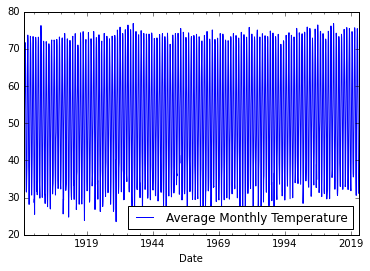

In [ ]:
amt.plot()

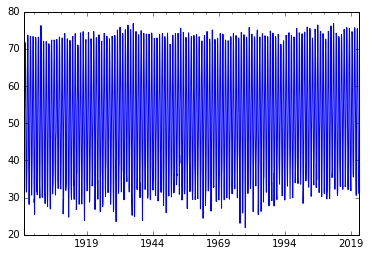

In [ ]:
temp = pd.Series(amt['Average Monthly Temperature'], index = pd.date_range(start = '1895-01-01', end = '2022-01-01', freq = 'MS'))
temp.plot()

Text(0, 0.5, 'Year')

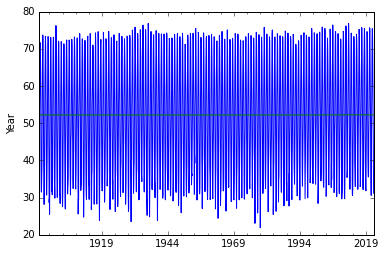

In [ ]:
model = ETSModel(temp)
fit = model.fit()
temp.plot(label='Temperature')
fit.fittedvalues.plot(label = 'fit')
plt.ylabel("Year") 

In [ ]:
print(fit.summary())

                                      ETS Results                                      
Dep. Variable:     Average Monthly Temperature   No. Observations:                 1525
Model:                                ETS(ANN)   Log Likelihood               -6329.332
Date:                         Mon, 28 Nov 2022   AIC                          12664.664
Time:                                 17:30:52   BIC                          12680.653
Sample:                             01-01-1895   HQIC                         12670.616
                                  - 01-01-2022   Scale                          235.777
Covariance Type:                        approx                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.0001        nan        nan        nan         nan         nan
initial_level      52.2359      0.420    124

In [ ]:
pred = fit.get_prediction(start = '2020', end = '2030')
pred_df = pred.summary_frame(alpha = 0.05)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [ ]:
pred_df['mean']

2020-01-01    52.236682
2020-02-01    52.235014
2020-03-01    52.233408
2020-04-01    52.232793
2020-05-01    52.232658
                ...    
2029-09-01    52.239858
2029-10-01    52.239858
2029-11-01    52.239858
2029-12-01    52.239858
2030-01-01    52.239858
Freq: MS, Name: mean, Length: 121, dtype: float64

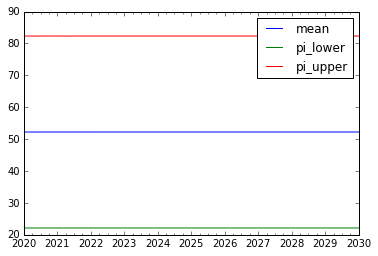

In [ ]:
pred_df.plot()

In [ ]:
pred_df['mean']['2020-01-01'] - pred_df['mean']['2030-01-01']

-0.00317607519460239

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


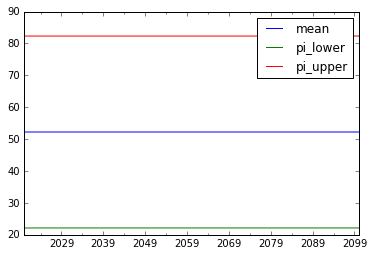

In [ ]:
pred2 = fit.get_prediction(start = '2020', end = '2100')
pred2_df = pred2.summary_frame(alpha = 0.05)
pred2_df.plot()

In [ ]:
pred2_df['mean']

2020-01-01    52.236682
2020-02-01    52.235014
2020-03-01    52.233408
2020-04-01    52.232793
2020-05-01    52.232658
                ...    
2099-09-01    52.239858
2099-10-01    52.239858
2099-11-01    52.239858
2099-12-01    52.239858
2100-01-01    52.239858
Freq: MS, Name: mean, Length: 961, dtype: float64

In [ ]:
pred2_df['mean']['2020-01-01'] - pred2_df['mean']['2100-01-01']

-0.00317607519460239

## 8. Findings and Conclusion

It is known that minority and low income populations are at more risk to the consequences of climate change. This report looks at how that risk increases with temperature and sea level increases. 

#### 8.1 Minority Status and Climate Risk

Asthma related ER visits: 
* About 8% of the variation in risk at a 1 degree, 2 degrees, and 3 degrees global mean temperature increase is explained by having a minority status 
* About 7% of the variation in risk at a 4 degree global mean temperature increase is explained by having a minority status. 
* About 6% of the variation in risk at a 5 degree global mean temperature increase is explained by having a minority status.
* Average variation: 7.4%, reject the alternate hypothesis and accept the null

Premature Mortality (Z): 
* About 20% of the variation in risk at a 1 degree and 4 degrees global mean temperature increase is explained by having a minority status. 
* About 15% of the variation in risk at 2 degrees global mean temperature increase is explained by having a minority status. 
* About 37% of the variation in risk at 5 degrees global mean temperature increase is explained by having a minority status. 
* Average variation: 18.4%, accept the alternate hypothesis

National Mortality: 
* About 26% of the variation in risk at 1 degree global mean temperature increase is explained by having a minority status
* About 15% of the variation in risk at 2 degrees global mean temperature increase is explained by having a minority status.
* About 22% of the variation in risk at 3 and 4 degrees global mean temperature increase is explained by having a minority status. 
* About 23% of the variation in risk at a 5 degree temperature is explained by having a minority status. 
* Average variation: 21.6%, accept the alternate hypothesis

Weather Delays: 
* About 8% of the variation in risk at 1 and 2 degree global mean temperature increase is explained by having a minority status. 
* About 7% of the variation in risk at 3, 4, and 5 degree global mean temperature increase is explained by having a minority status. 
* Average variation: 7.4%, accept the null hypothesis

High Tide Flooding Delays: 
* About 2% of the variation in risk at 25 cm sea level increase is explained by having a minority status. 
* About 5% of the variation in risk at 50 cm sea level increase is explained by having a minority status. 
* About 7% of the variation in risk at 75 cm sea level increase is explained by having a minority status.
* About 8% of the variation in risk at 100 cm, 125 cm, and 150 cm sea level increases are explained by having a minority status. 
* Average variation: 6.3%, accept the null hypothesis

Property Damage: 
* About 4% of the variation in risk at 25 cm, 50 cm, 75 cm sea level increase is explained by having a minority status.
* About 8% of the variation in risk at 100 cm and 150 cm sea level increase is explained by having a minority status. 
* About 10% of the variation in risk at 125 cm sea level increase is explained by having a minority status. 
* Average variation: 6.3%, accept the null hypothesis

Labor Hours: 
* About 50% of the variation in risk at 1 degrees mean global temperature increase is explained by having a minority status.
* About 56% of the variation in risk at 2 degrees mean global temperature increase is explained by having a minority status.
* About 66% of the variation in risk at 3 degrees mean global temperature increase is explained by having a minority status. 
* About 38% of the variation in risk at 4 degrees mean global temperature increase is explained by having a minority status. 
* About 30% of the variation in risk at 5 degrees mean global temperature increase is explained by having a minority status. 
* Average variation: 48%, accept the alternate hypothesis




High correlations between minority status and risk of climate consequences as temperature rises are seen in the loss of labor hours. 

#### 8.2 Income Status and Climate Risk

Asthma Related ER visits: 

*   About 6% of the variation in risk at a 1 degree global mean temperature increase is explained by having a low income status.
*   About 25% of the variation in risk at a 2 degree global mean temperature increase is explained by having a low income status
*   About 38% of the variation in risk at 3 degrees global mean temperature increase is explained by having a low income status.
*   About 19% of the variation in risk at 4 degrees global mean temperature increase is explained by having a low income status.
*   About 31% of the variation in risk at 5 degrees global mean temperature increase is explained by having a low income status. 
* Average variation: 23.8%, accept the alternate hypothesis








New Asthma Cases: 
* About 40% of the variation in risk at a 1 degree global mean temperature increase is explained by having a low income status. 
* About 30% of the variation in risk at a 2 degree global mean temperature increase is explained by having a low income status. 
* About 52% of the variation in risk at a 3 degree global mean temperature increase is explained by having a low income status.
* About 18% of the variation in risk at a 4 degree global mean temperature increase is explained by having a low income status. 
* About 20% of the variation in risk at a 5 degree global mean temperature increase is explained by having a low income status.
* Average variation: 32%, accept the alternate hypothesis

Premature Mortality (Di): 
* About 40% of the variation in risk at a 1 degree global mean temperature increase is explained by having a low income status. 
* About 29% of the variation in risk at a 2 degree global mean temperature increase is explained by having a low income status.
* About 52% of the variation in risk at a 3 degree global mean temperature increase is explained by having a low income status. 
* About 18% of the variation in risk at a 4 degree global mean temperature increase is explained by having a low income status. 
* About 20% of the variation in risk at a 5 degree global mean temperature increase is explained by having a low income status.
* Average variation: 31.8%, accept the alternate hypothesis

Premature Mortality (Z): 
* About 61% of the variation in risk at a 1 degree global mean temperature increase is explained by having a low income status.
* About 15% of the variation in risk at a 2 degree global mean temperature increase is explained by having a low income status.
* The coefficient of variation at a 3 degree global mean temperature increase is insignificant. 
* About 31% of the variation in risk at a 4 degree global mean temperature increase is explained by having a low income status.
* About 15% of the variation in risk at a 5 degree global mean temperature increase is explained by having a low income status.
* Average variation: 30.5 %, accept the alternate

Weather Delays (temp & precp):  
* About 56% of the variation in risk at a 1 degree global mean temperature increase is explained by having a low income status.
* About 12% of the variation in risk at a 2 degree global mean temperature increase is explained by having a low income status.
* About 22% of the variation in risk at a 3 degree and 4 degree global mean temperature increase is explained by having a low income status.
* About 24% of the variation in risk at a 5 degree global mean temperature increase is explained by having a low income status.
* Average variation: 27.2%, accept the alternate


Weather Delays (high tide flooding: 
* About 67% of the variation in risk at a 25 cm sea level increase is explained by having a low income status.
* About 30% of the variation in risk at a 50 cm and 75 cm sea level increase is explained by having a low income status.
* About 5% of the variation in risk at a 100 cm sea level increase is explained by having a low income status.
* About 11% of the variation in risk at a 125 cm sea level increase is explained by having a low income status.
* About 12% of the variation in risk at a 150 cm sea level increase is explained by having a low income status.
* Average variation: 28.3%, accept the alternate

Lost Labor Hours: 
* About 30% of the variation in risk at a 1 degree global mean temperature increase is explained by having a low income status.
* About 14% of the variation in risk at a 2 degree global mean temperature increase is explained by having a low income status.
* About 24% of the variation in risk at a 3 degree global mean temperature increase is explained by having a low income status.
* About 68% of the variation in risk at a 4 degree global mean temperature increase is explained by having a low income status.
* About 11% of the variation in risk at a 5 degree global mean temperature increase is explained by having a low income status.
* Average variation: 29.4%, accept the alternate

Property Damage: 
* About 70% of the variation in risk at a 25 cm sea level increase is explained by having a low income status.
* About 14% of the variation in risk at a 50 cm sea level increase is explained by having a low income status.
* About 20% of the variation in risk at a 75 cm sea level increase is explained by having a low income status.
* About 1% of the variation in risk at a 100 cm sea level increase is explained by having a low income status.
* About 17% of the variation in risk at a 125 cm sea level increase is explained by having a low income status.
* About 0.3% of the variation in risk at a 150 cm sea level increase is explained by having a low income status.
* Average variation: 20.4%, accept the alternate



Highest average correlations between low income status and new cases of asthma and premature mortality. 

#### 8.3 Prediction Model

Using an ETS or exponential smoothing model and historical data of monthly temperature averages from 1895 to 2022, a 10 year (2020 - 2030) and 80 year (2020 - 2100) predictions were generated. An ETS model was used because the data presents as a time series with monthly data points. ETS models account for error, trend, and seasonality in a series to create predictions based on historical data. Default parameters were used. Both models showed a change of -0.003 degrees between January 2020 and January 2030 and 2100 respectively. It is noted that this model does not take any additional factors into account. 